<a href="https://colab.research.google.com/github/Merijn68/rl-alm/blob/main/notebooks/Train%20SAC%20model%20Gausian%203000k.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Test SAC RL model

The SAC (Soft Actor-Critic) algorithm is an off-policy reinforcement learning method designed for continuous action spaces. It combines the benefits of both policy-based and value-based methods and is known for its sample efficiency and stability.  

The actor in SAC is responsible for selecting actions in the environment. It typically uses a neural network to learn a policy that maps observations to continuous actions.  
SAC uses a stochastic policy, which means it outputs a probability distribution over the available actions, often modeled as a Gaussian distribution.  
This stochasticity helps exploration during training.

Critic: SAC also includes two critics, referred to as Q-networks. These networks estimate the state-action value function, providing two independent value estimates.  
Having multiple critics helps stabilize the training process.

SAC collects data by interacting with the environment. The actor's stochastic policy is used to sample actions,  
and these actions are executed in the environment to collect state-action-reward transitions.
SAC uses an experience replay buffer to store and sample past experiences.  
This buffer allows the algorithm to learn from a diverse set of experiences and reduce sample correlations.

SAC employs a variant of the Bellman equation to update the critics. The key innovation in SAC is the use of a "soft" Bellman backup.   
This involves minimizing a loss that aims to make the critics agree with each other and be close to the minimum of the Bellman error.

The actor's policy is updated based on the soft Q-values from the critics. The objective is to maximize the expected reward, including an entropy term.  
The entropy term encourages exploration by discouraging overly deterministic policies.

SAC introduces a temperature parameter that scales the entropy term in the policy update. This temperature parameter can be learned or adjusted during training.  
It helps balance exploration and exploitation by controlling the level of stochasticity in the policy.

These steps are repeated iteratively, allowing the agent to improve its policy and value functions over time. The process continues until convergence or a specified number of iterations.

SAC's main advantages include:

It can handle continuous action spaces efficiently.
It provides a good balance between exploration and exploitation, thanks to the entropy term.
It benefits from experience replay, which reduces sample correlations and enhances learning stability.
It can be used in combination with target value networks for even more stability.

https://arxiv.org/pdf/1801.01290.pdf

In [1]:

%load_ext autoreload
%autoreload 2
%matplotlib inline
%load_ext tensorboard
import os
import sys
from pathlib import Path
import pandas as pd
from stable_baselines3 import SAC

# Find the root directory by traversing up the directory tree
def find_project_root(current_path):
    if os.path.exists(os.path.join(current_path, "README.md")):
        return current_path
    parent_path = os.path.dirname(current_path)
    if parent_path == current_path:
        raise ValueError("Project root not found.")
    return find_project_root(parent_path)


current_dir = os.getcwd()
print(f"Current dirt: {current_dir}")
project_root = find_project_root(current_dir)
sys.path.append(str(project_root))
sys.path.append(os.path.join(project_root, 'src'))
print(f"Project root: {project_root}")

# # flake8: noqa  # Disable Flake8 for the following block
import gymnasium as gym

from src.models.bank_env import BankEnv
from src.visualization import visualize
import src.models.train as train
from src.tests import test_bankmodel_a2c_train as tests
from src.data.definitions import MODEL_PATH, TENSORBOARD_LOGS, DATA_MODEL_PATH
from src.models.evaluate import evaluate_policy

Current dirt: f:\OneDrive\Documents\GitHub\rl-alm\notebooks
Project root: f:\OneDrive\Documents\GitHub\rl-alm


##### First test - just take a random walk in the environment.

Each episode consists of 60 months. Each timestep interest rates and swap rates are simulated and the bank enters into new mortgages.  
Each month the actor needs to decide on the funding strategy to fund the bank.

In [2]:
env_id = "bank-v3"
gym.register(id=env_id, entry_point=BankEnv, max_episode_steps=60)


Define the model. For the initial model we use the A2C model.

In [3]:
# from stable_baselines3.common.vec_env import DummyVecEnv

env = gym.make(env_id, render_mode="human")
# env = DummyVecEnv([lambda: env])

model_name = 'SAC_Gausian'
steps = 3000000

model = SAC.load(os.path.join(MODEL_PATH, f"{model_name}_{steps}"), env=env)

2023-11-22 14:15:28.453 | INFO     | src.data.dataset:read_data:46 - reading interest data from ESW.
2023-11-22 14:15:30.076 | INFO     | src.data.dataset:read_data:46 - reading zerocurve data from ESW.


Interest period:  (Timestamp('2010-06-01 00:00:00'), Timestamp('2023-09-01 00:00:00'))
Zerocurve period:  (Timestamp('2010-06-01 00:00:00'), Timestamp('2023-09-01 00:00:00'))


f:\OneDrive\Documents\GitHub\rl-alm\venv\lib\site-packages\stable_baselines3\common\save_util.py:166: UserWarning: Could not deserialize object tensorboard_log. Consider using `custom_objects` argument to replace this object.
Exception: cannot instantiate 'PosixPath' on your system
  warnings.warn(


Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


##### Train the model in the environment and save it

Showing the results of the trained model

In [4]:
print(model.policy)

MultiInputPolicy(
  (actor): Actor(
    (features_extractor): CombinedExtractor(
      (extractors): ModuleDict(
        (liquidity): Flatten(start_dim=1, end_dim=-1)
        (cashflows): Flatten(start_dim=1, end_dim=-1)
        (swap_rates): Flatten(start_dim=1, end_dim=-1)
        (bank_rates): Flatten(start_dim=1, end_dim=-1)
        (features): Flatten(start_dim=1, end_dim=-1)
      )
    )
    (latent_pi): Sequential(
      (0): Linear(in_features=52, out_features=256, bias=True)
      (1): ReLU()
      (2): Linear(in_features=256, out_features=256, bias=True)
      (3): ReLU()
    )
    (mu): Linear(in_features=256, out_features=4, bias=True)
    (log_std): Linear(in_features=256, out_features=4, bias=True)
  )
  (critic): ContinuousCritic(
    (features_extractor): CombinedExtractor(
      (extractors): ModuleDict(
        (liquidity): Flatten(start_dim=1, end_dim=-1)
        (cashflows): Flatten(start_dim=1, end_dim=-1)
        (swap_rates): Flatten(start_dim=1, end_dim=-1)
   

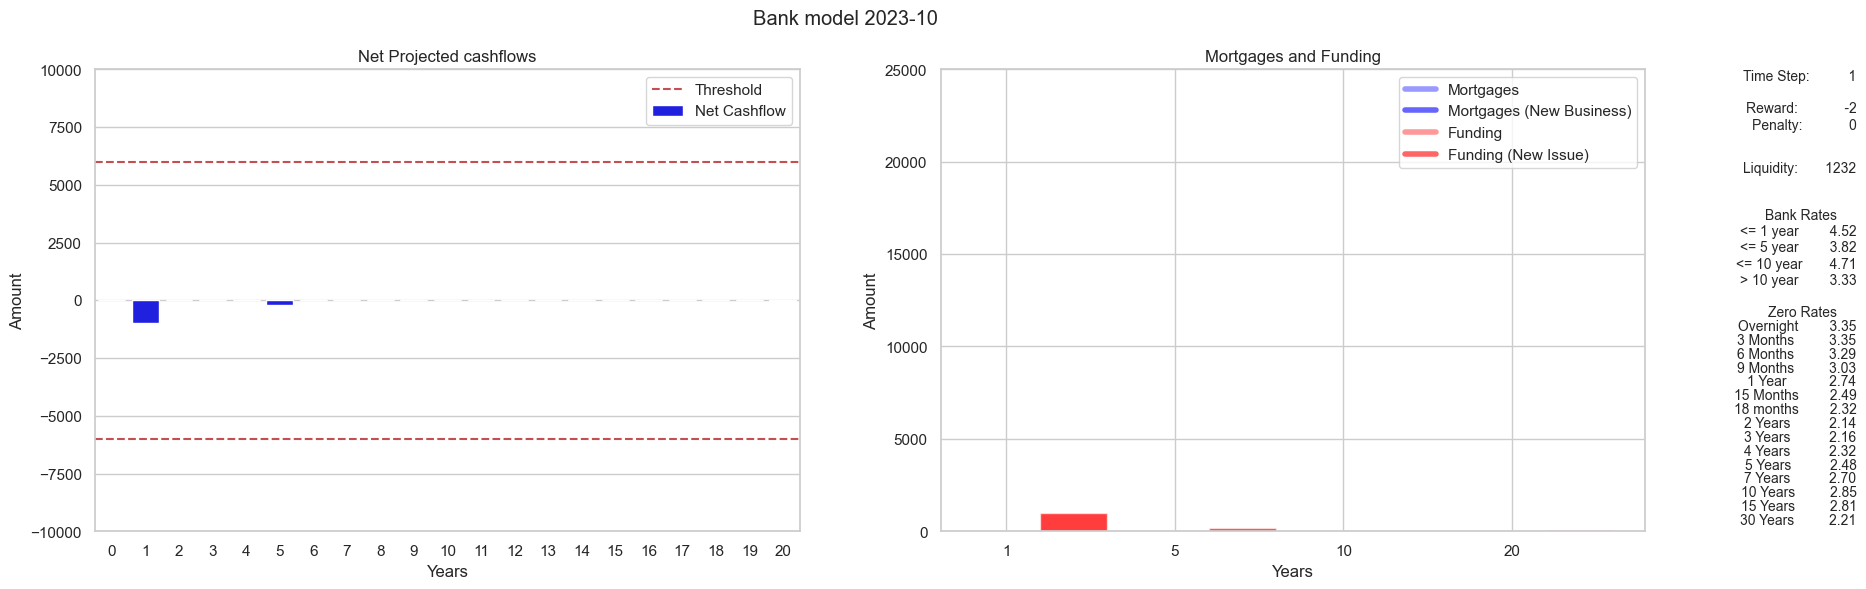

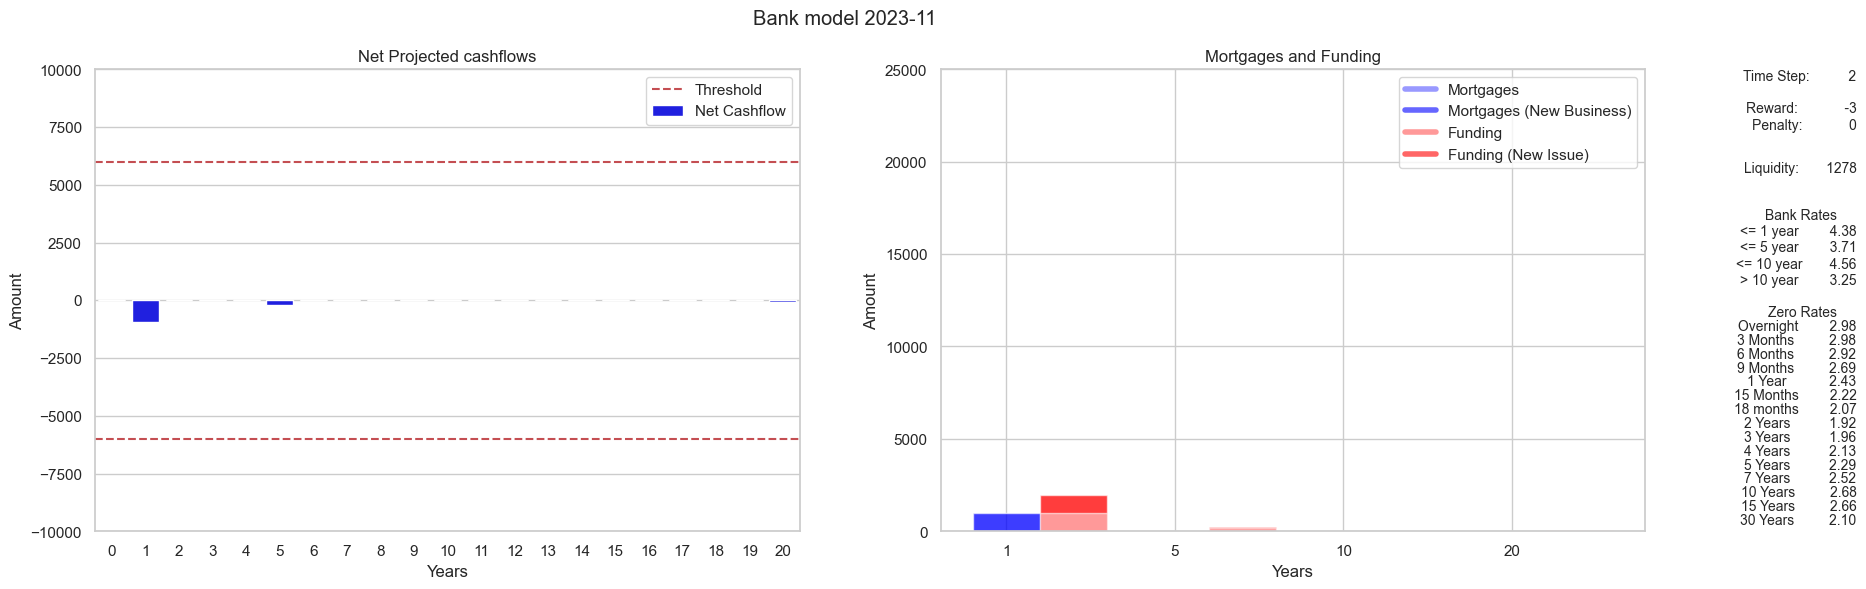

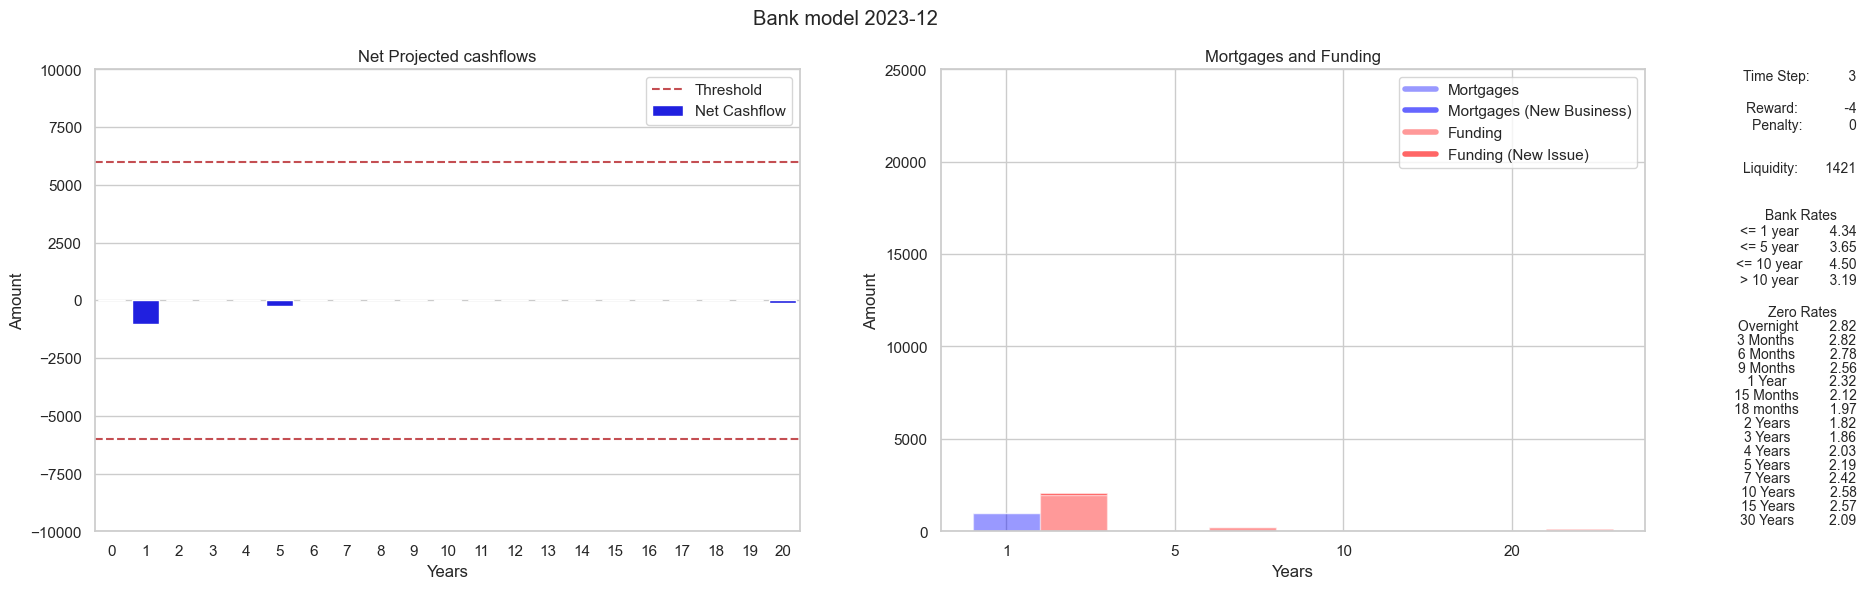

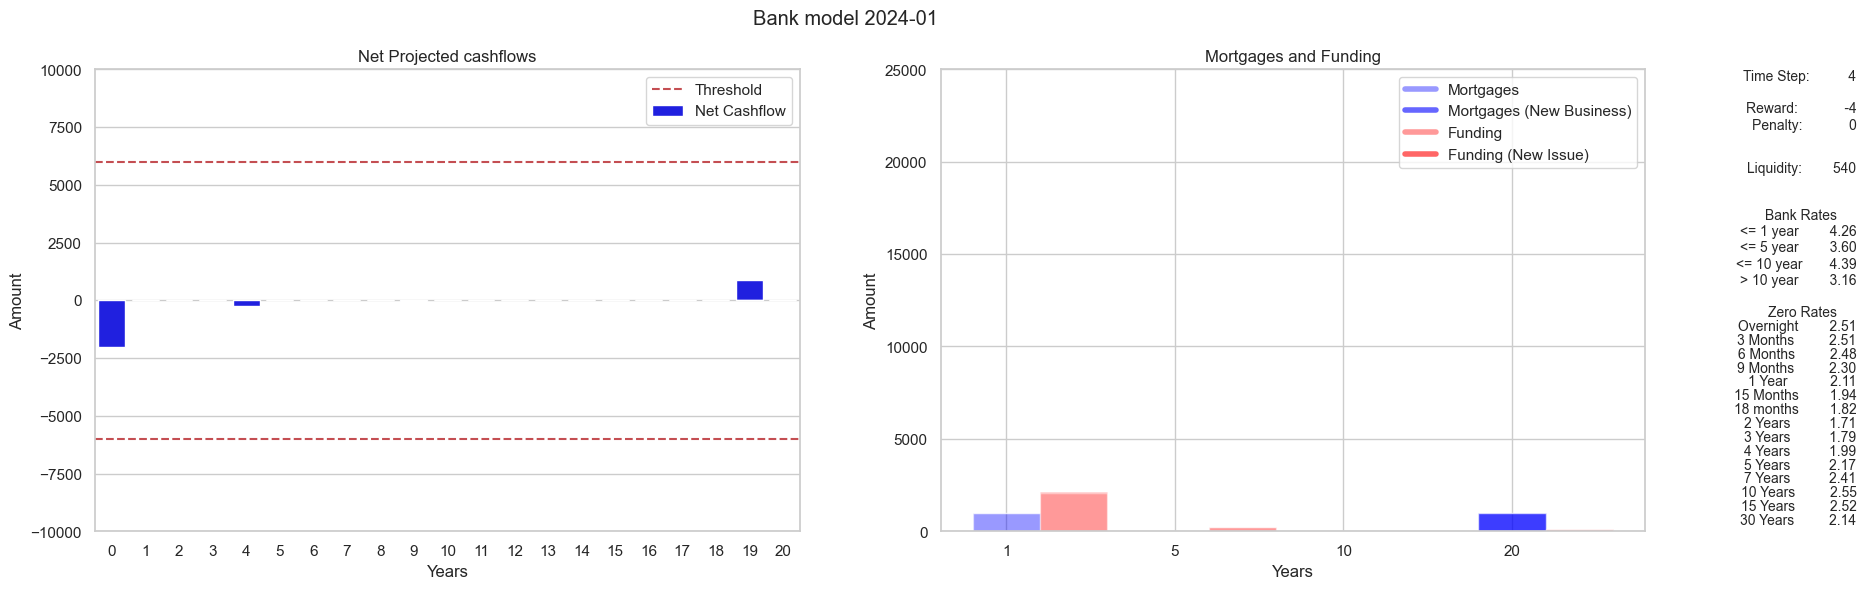

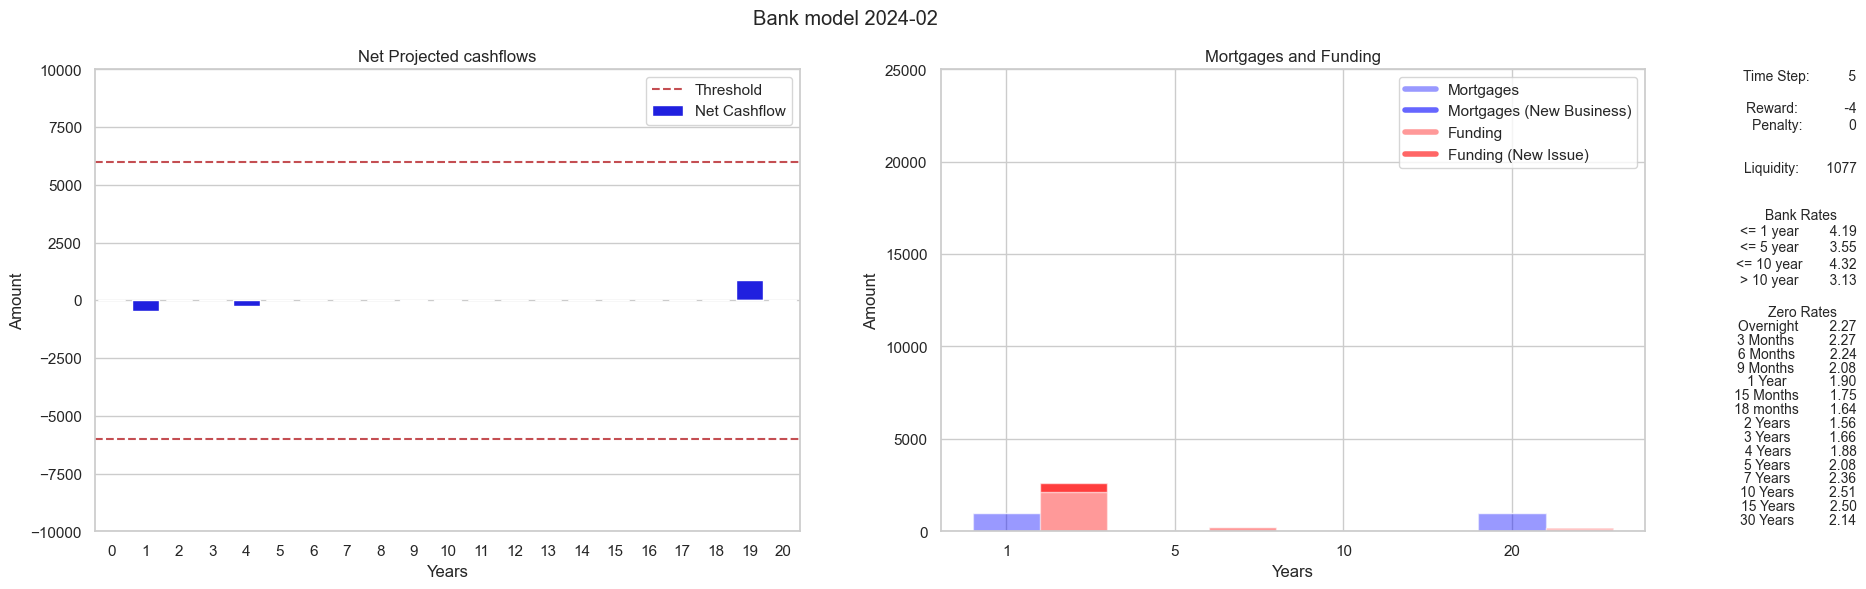

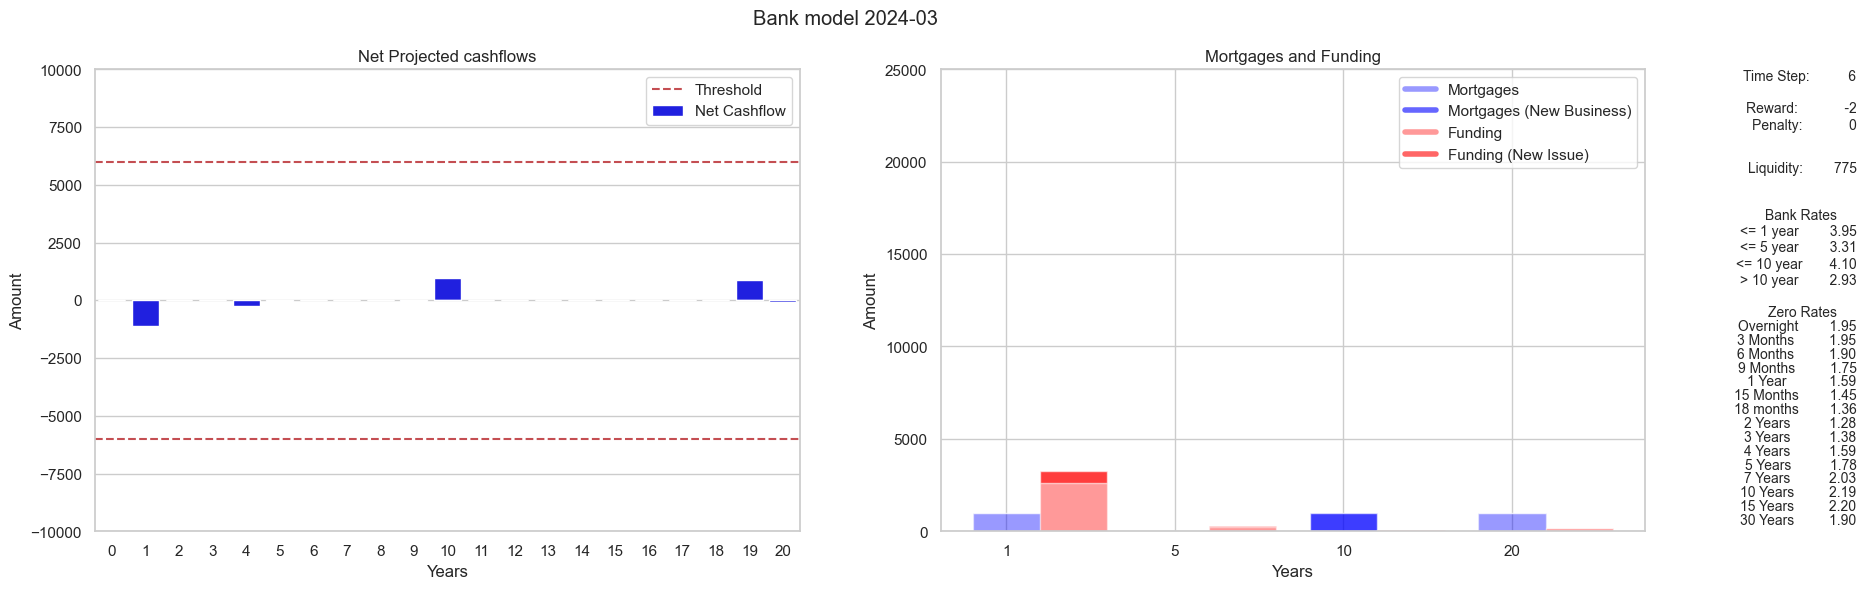

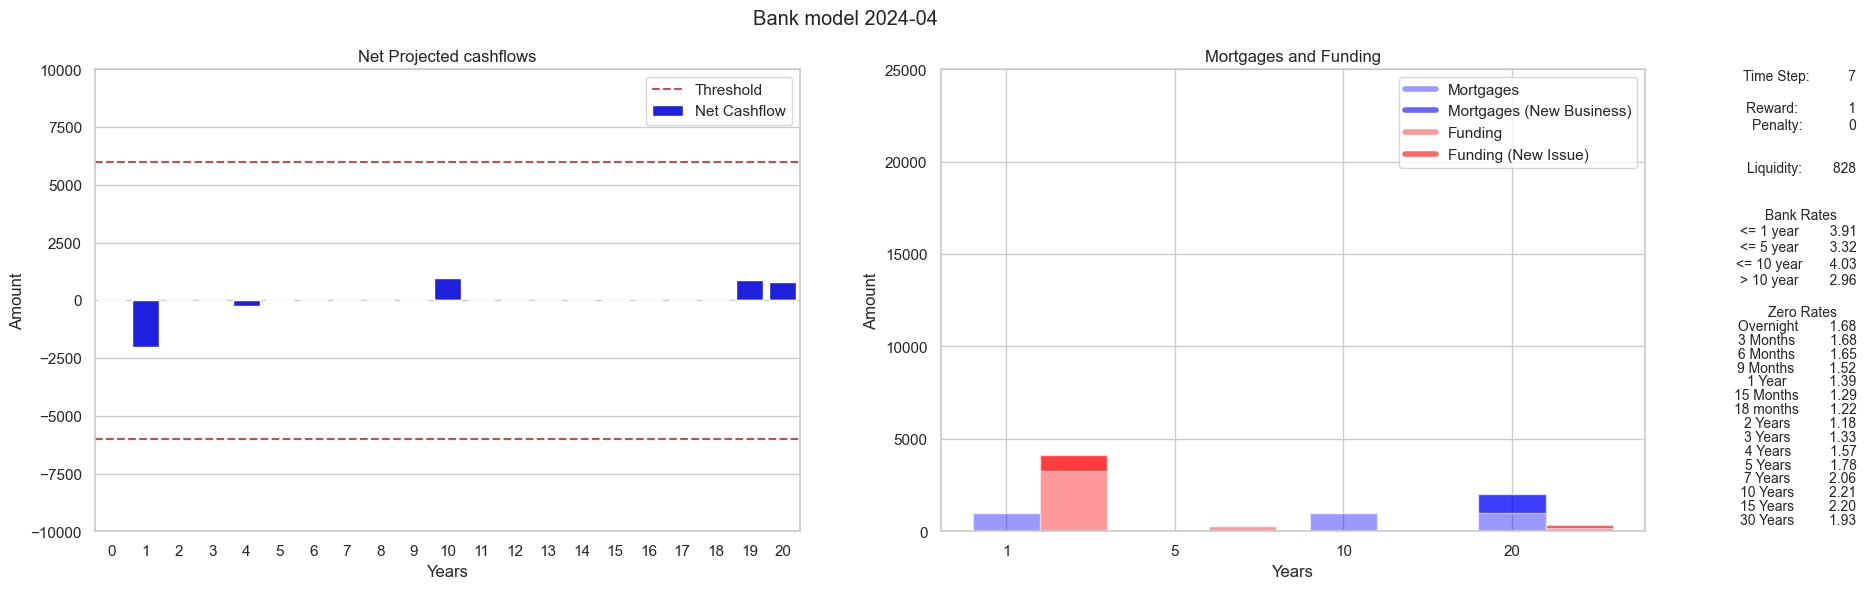

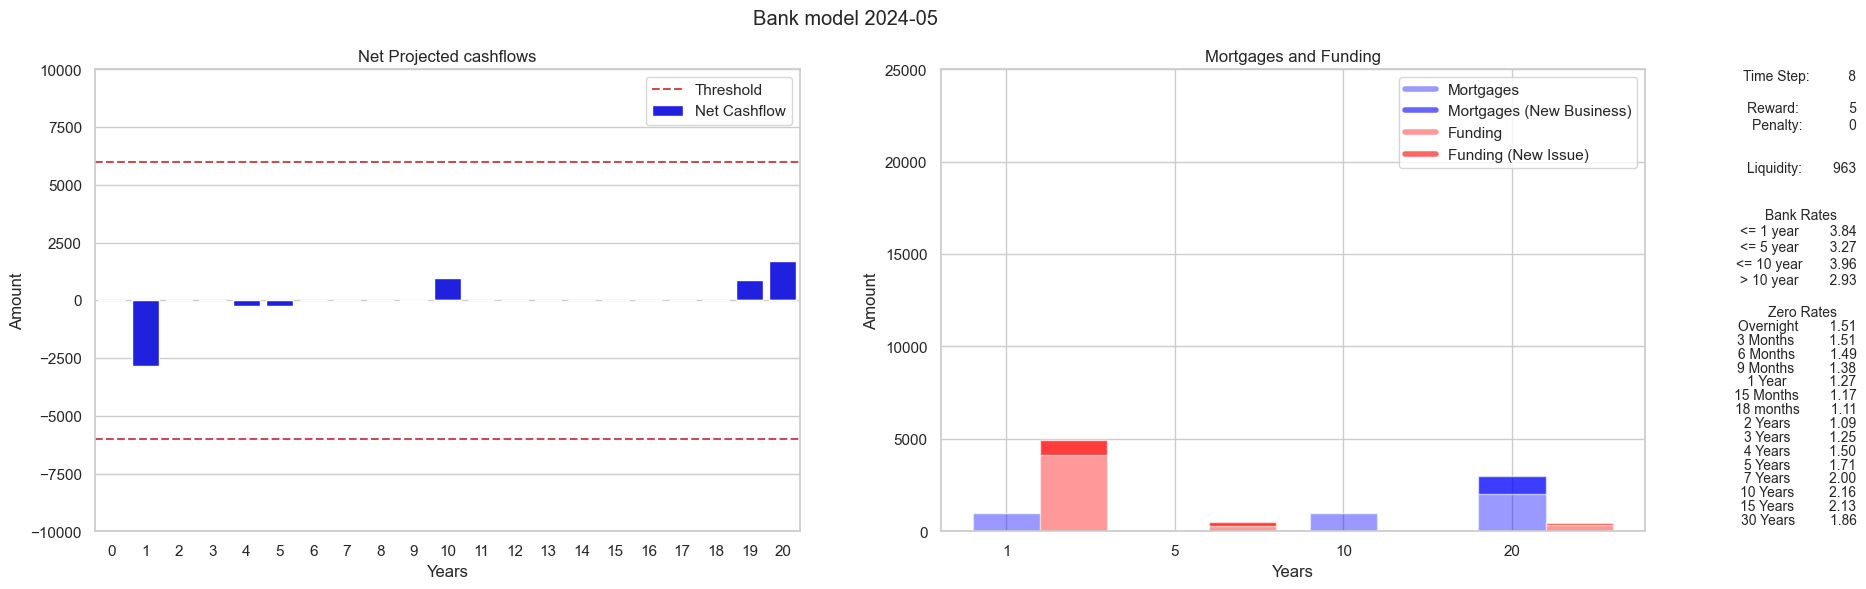

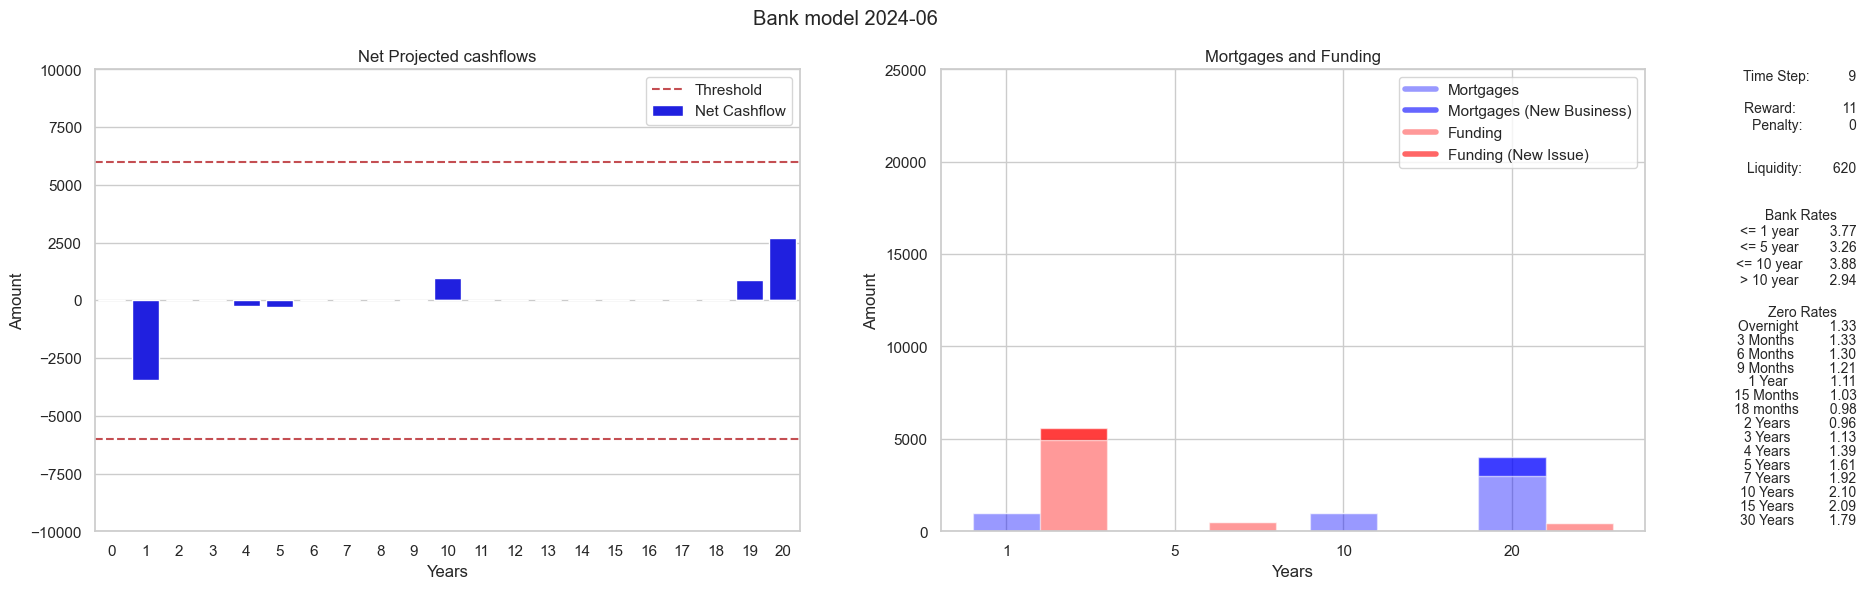

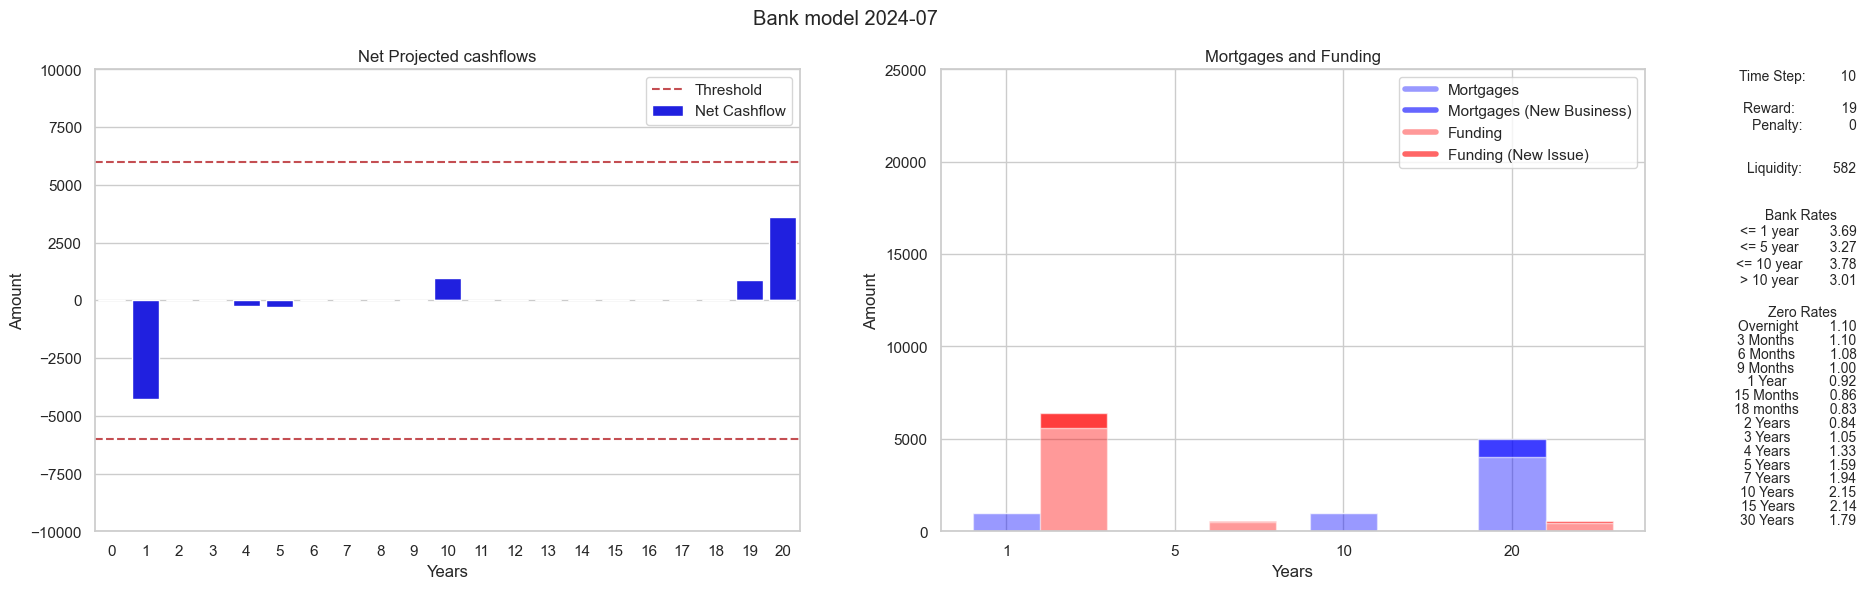

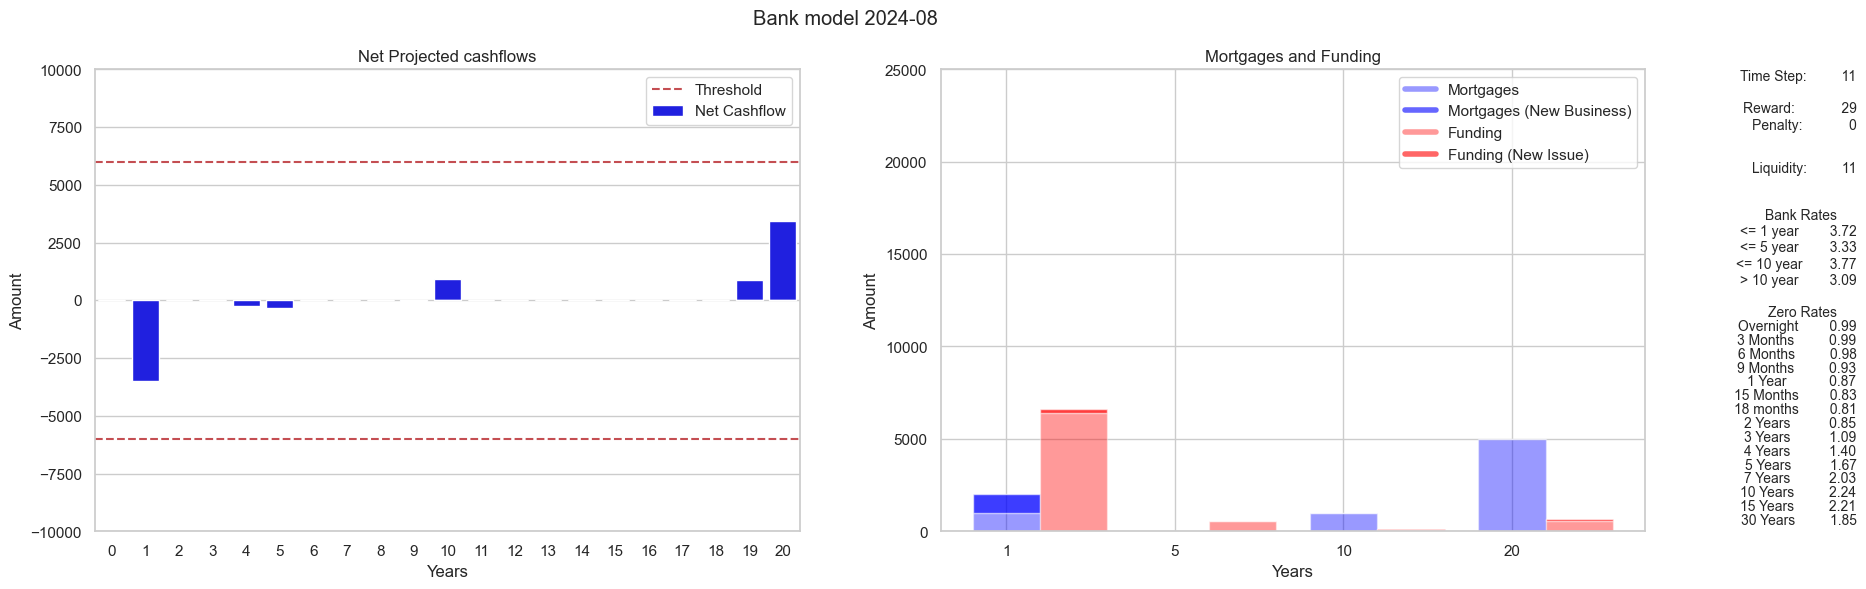

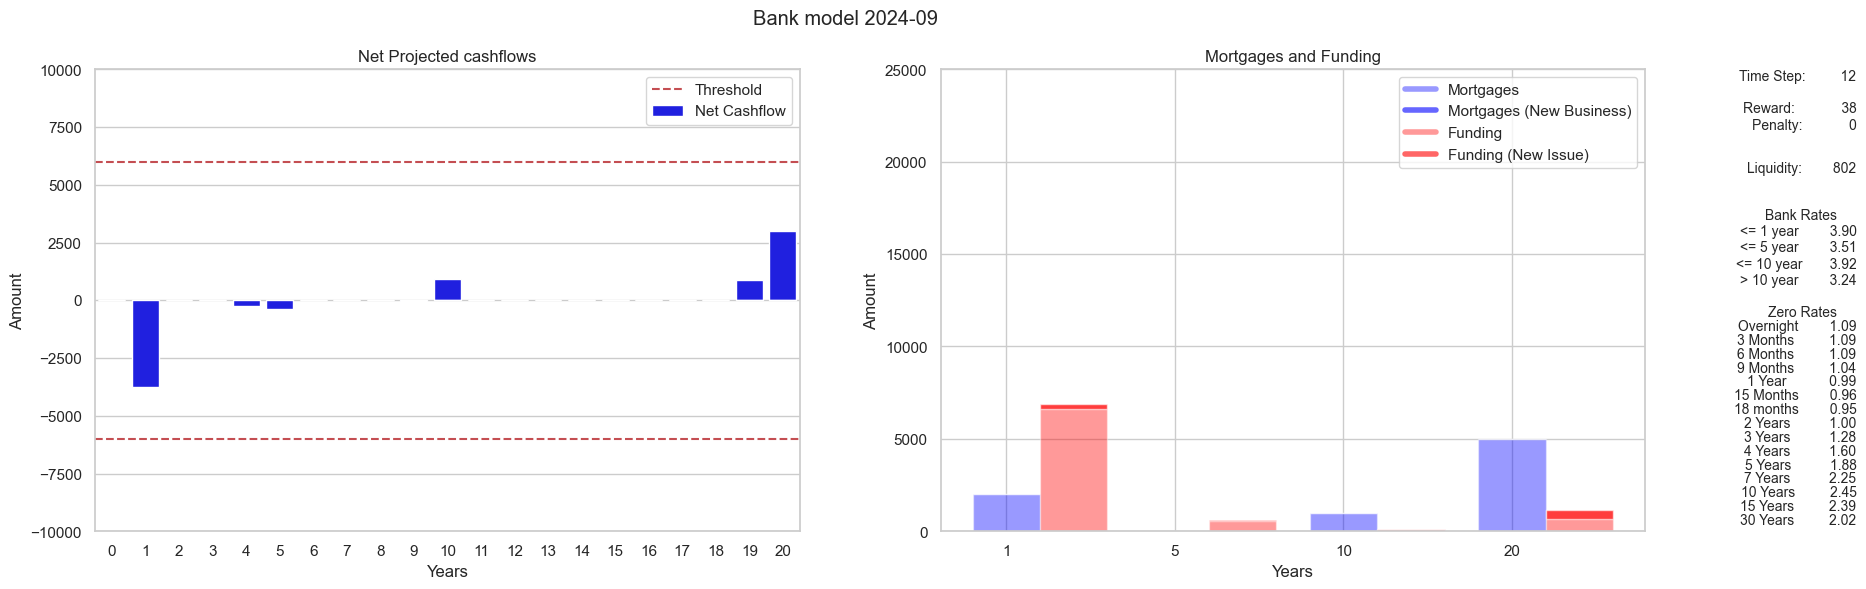

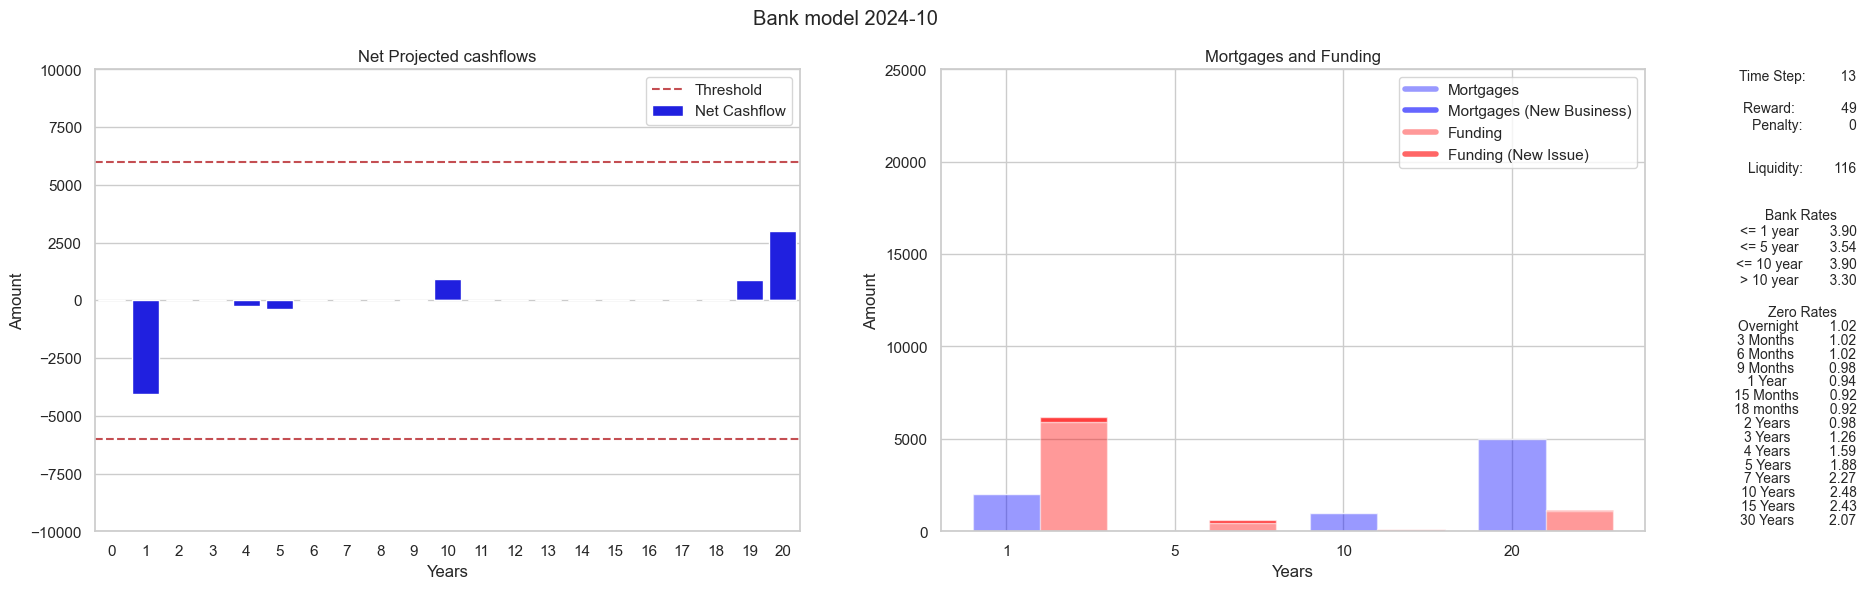

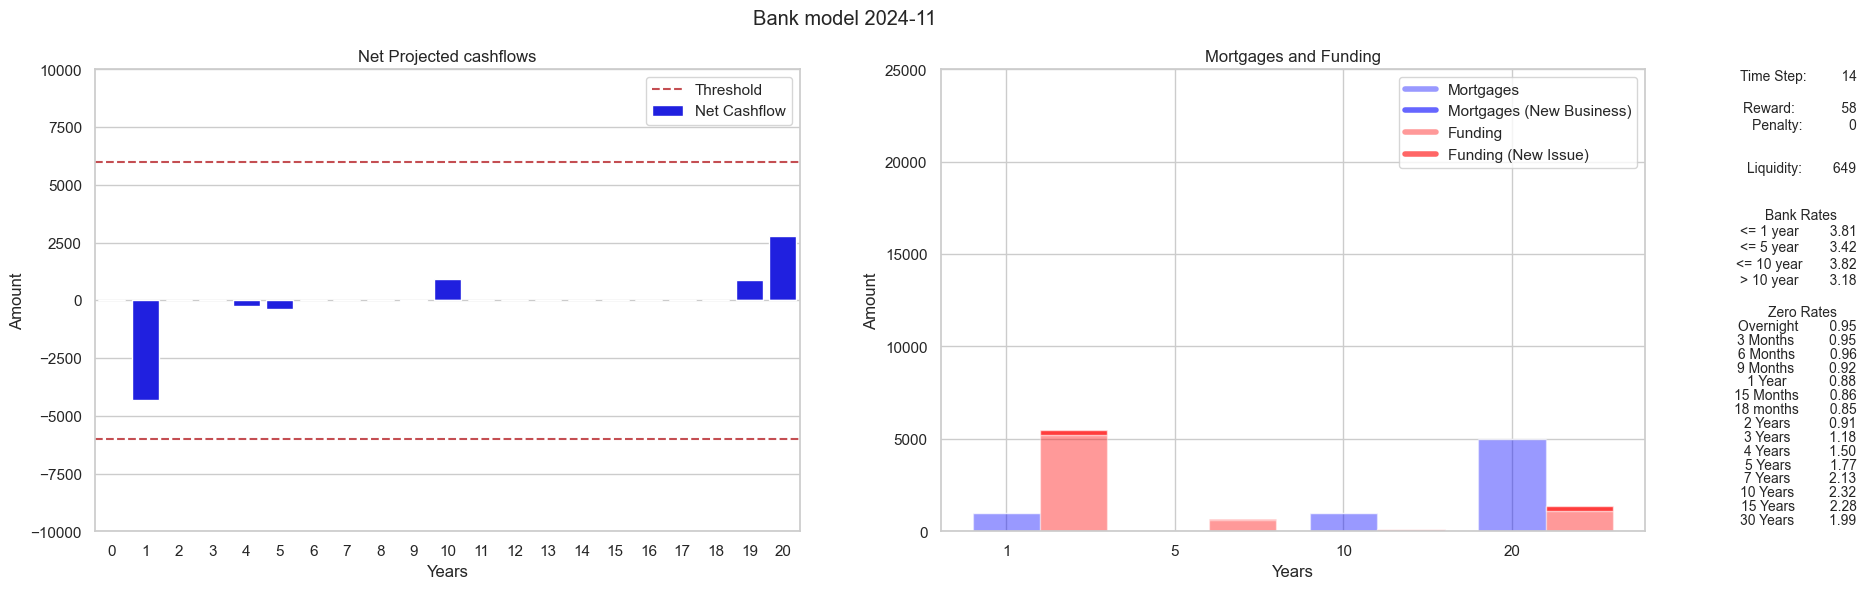

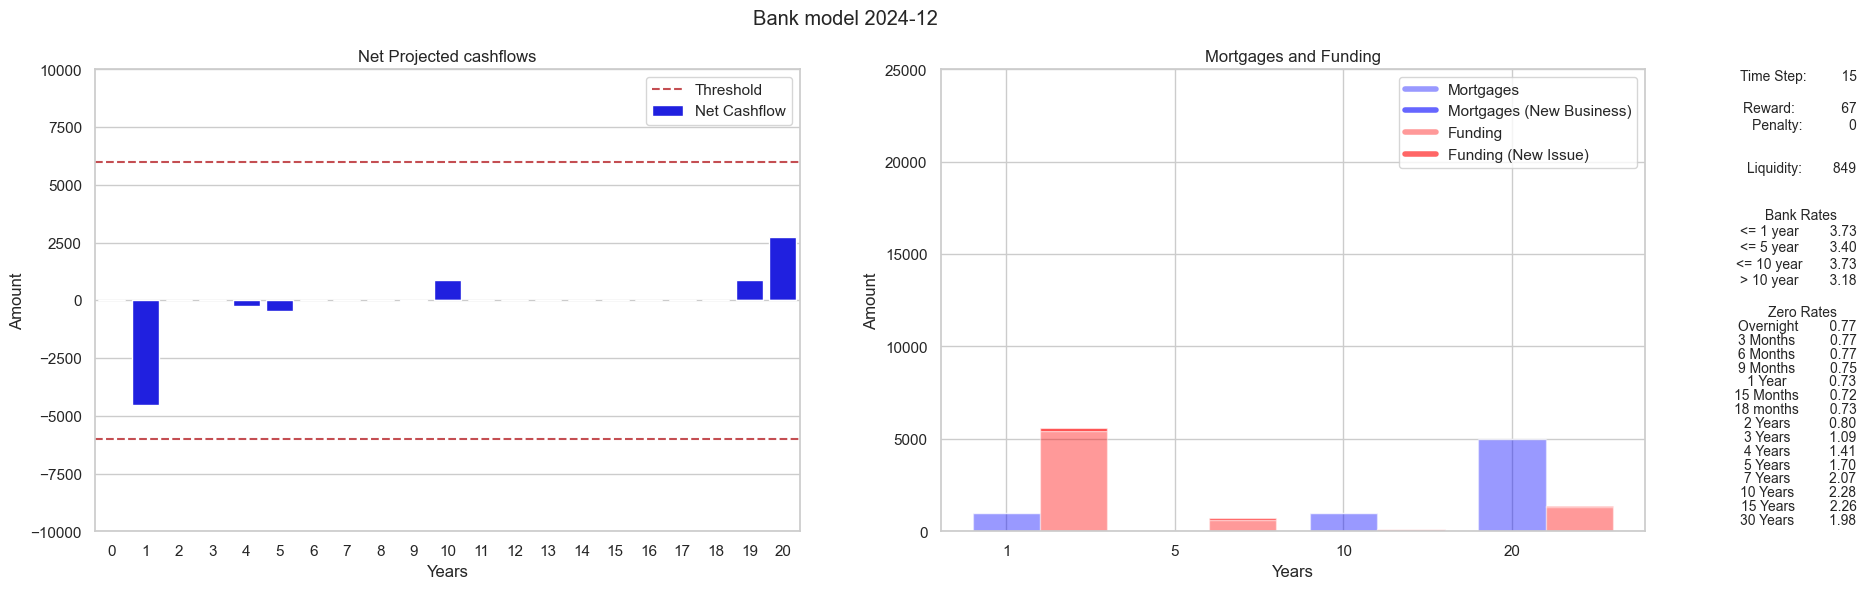

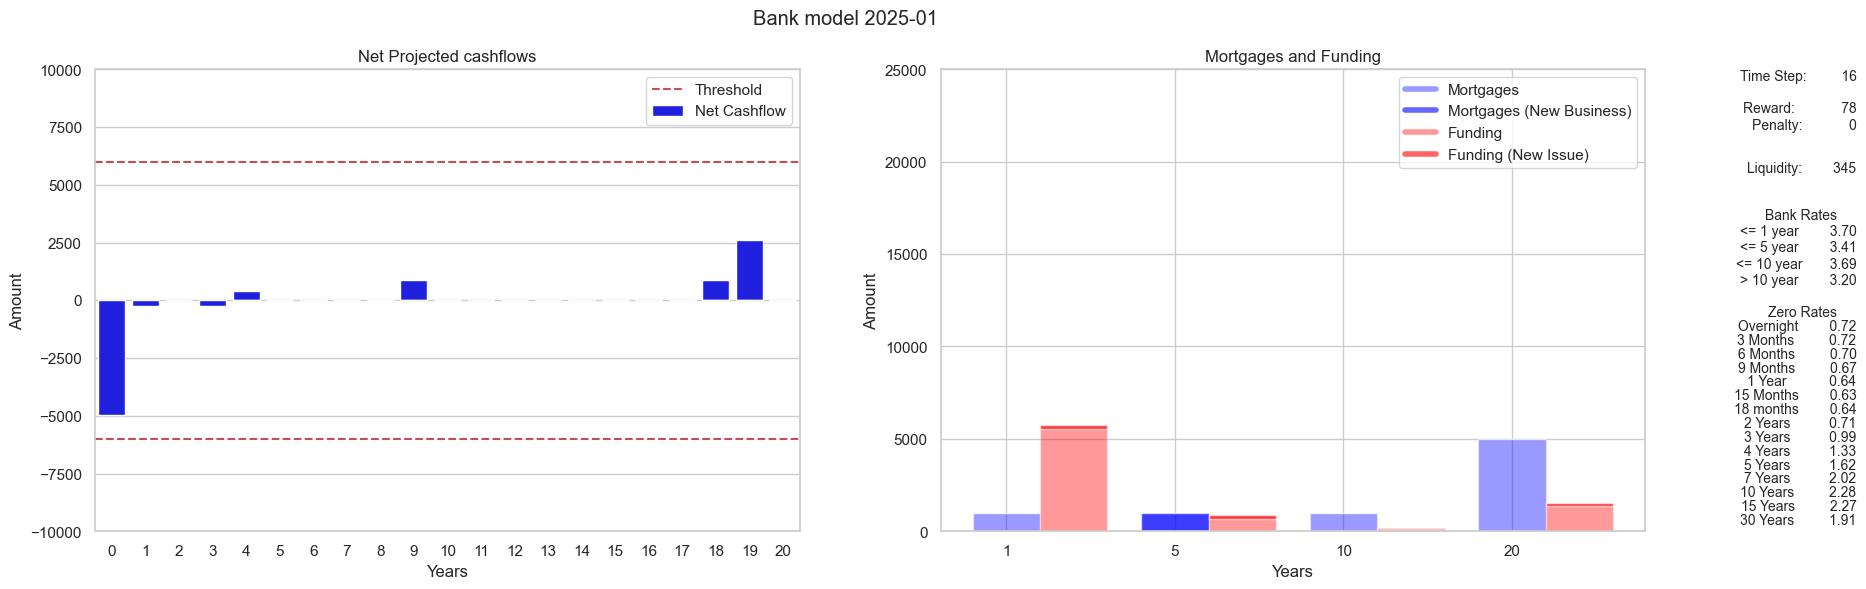

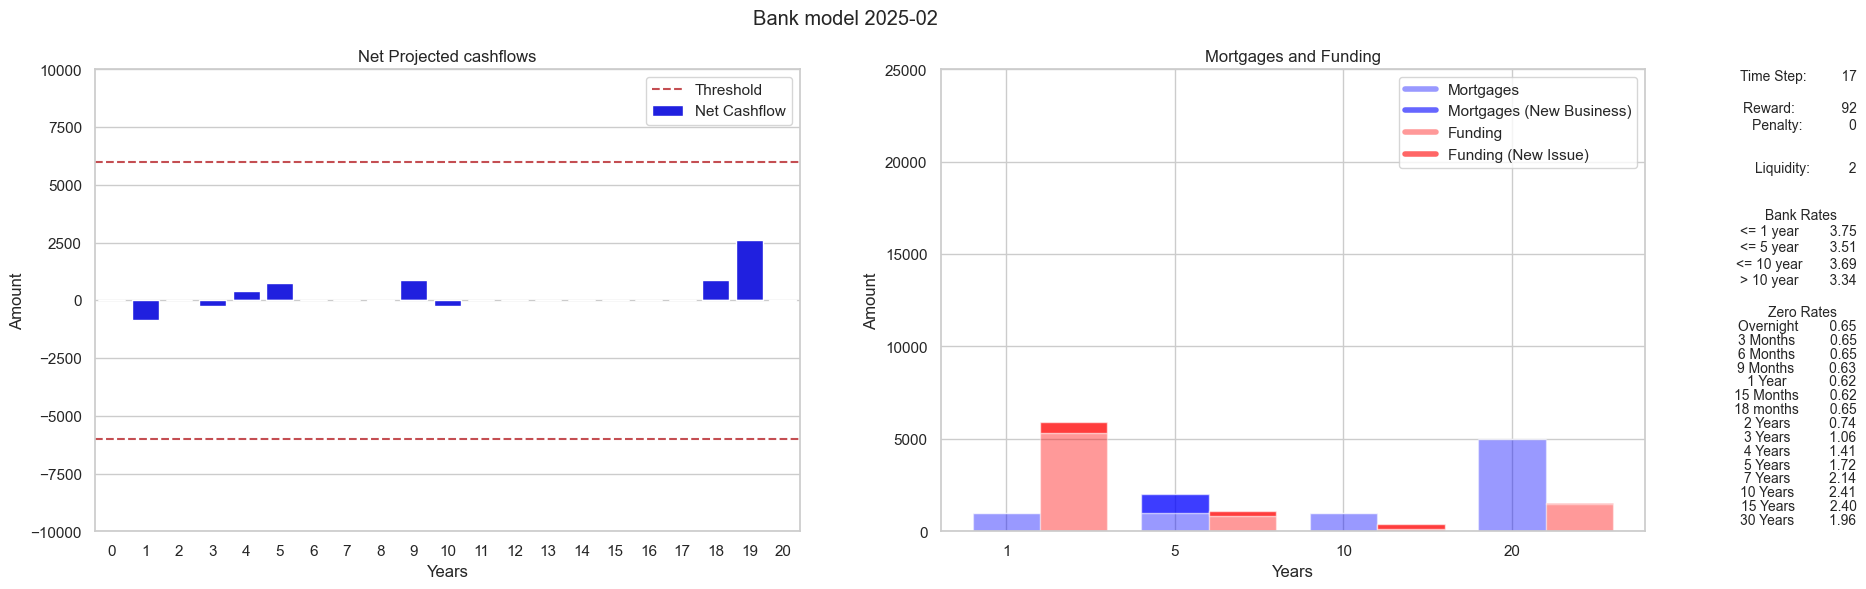

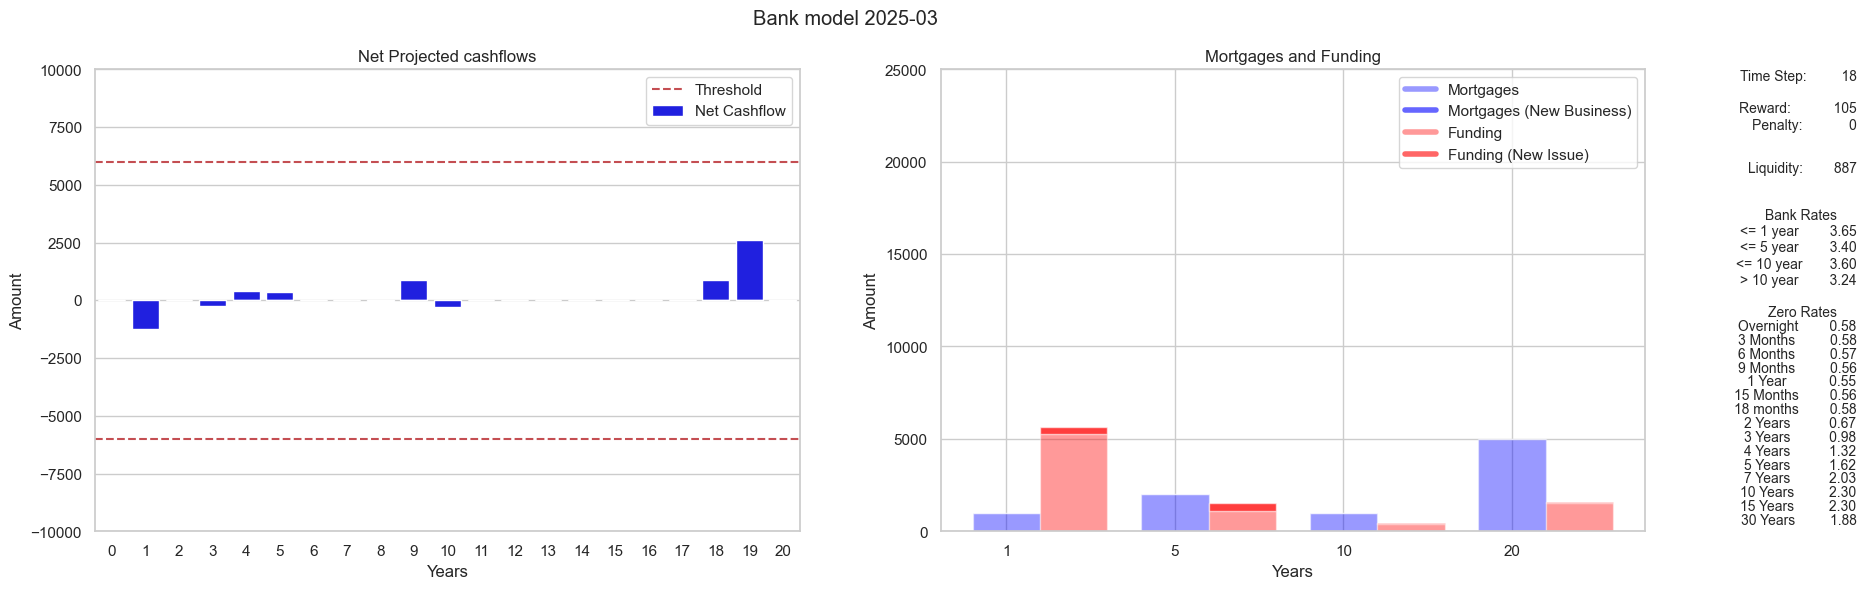

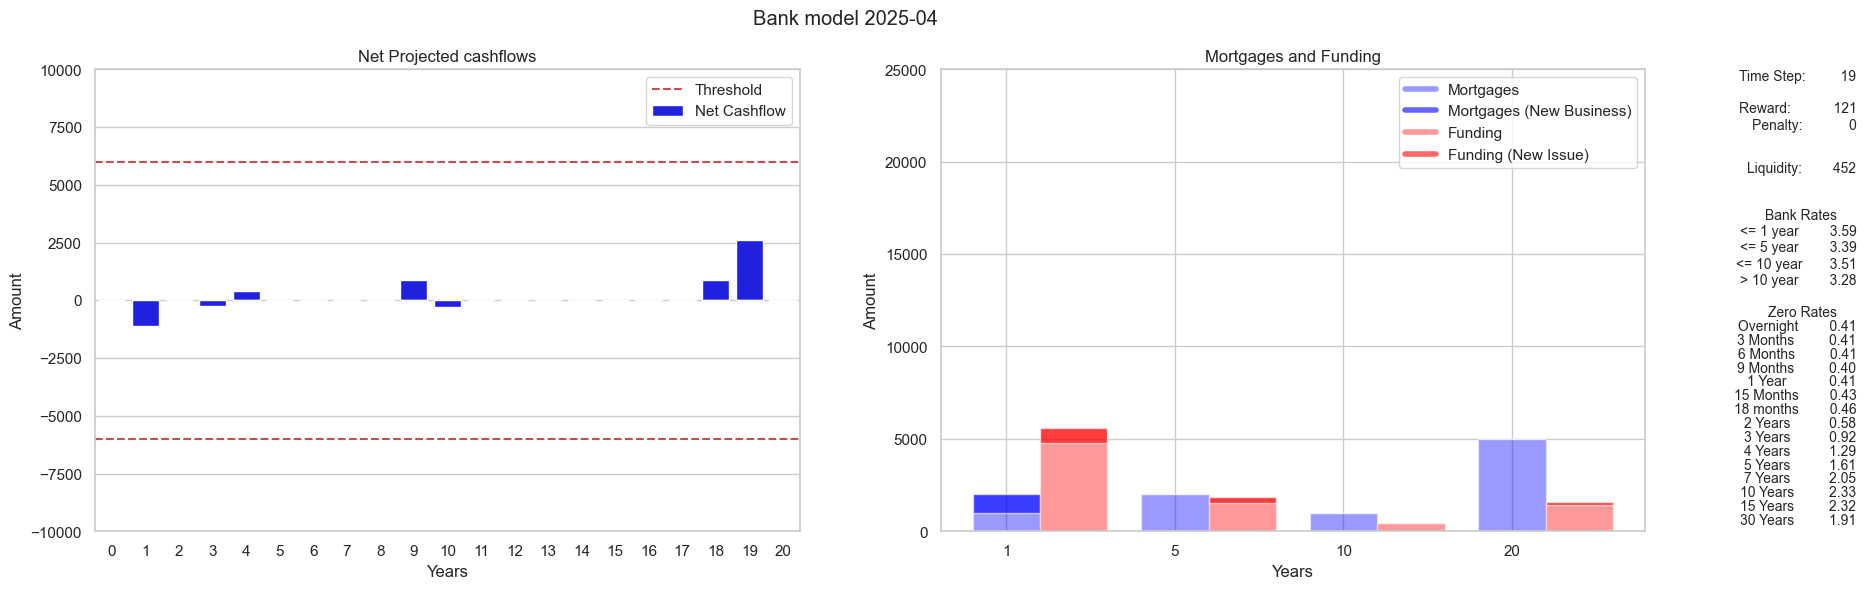

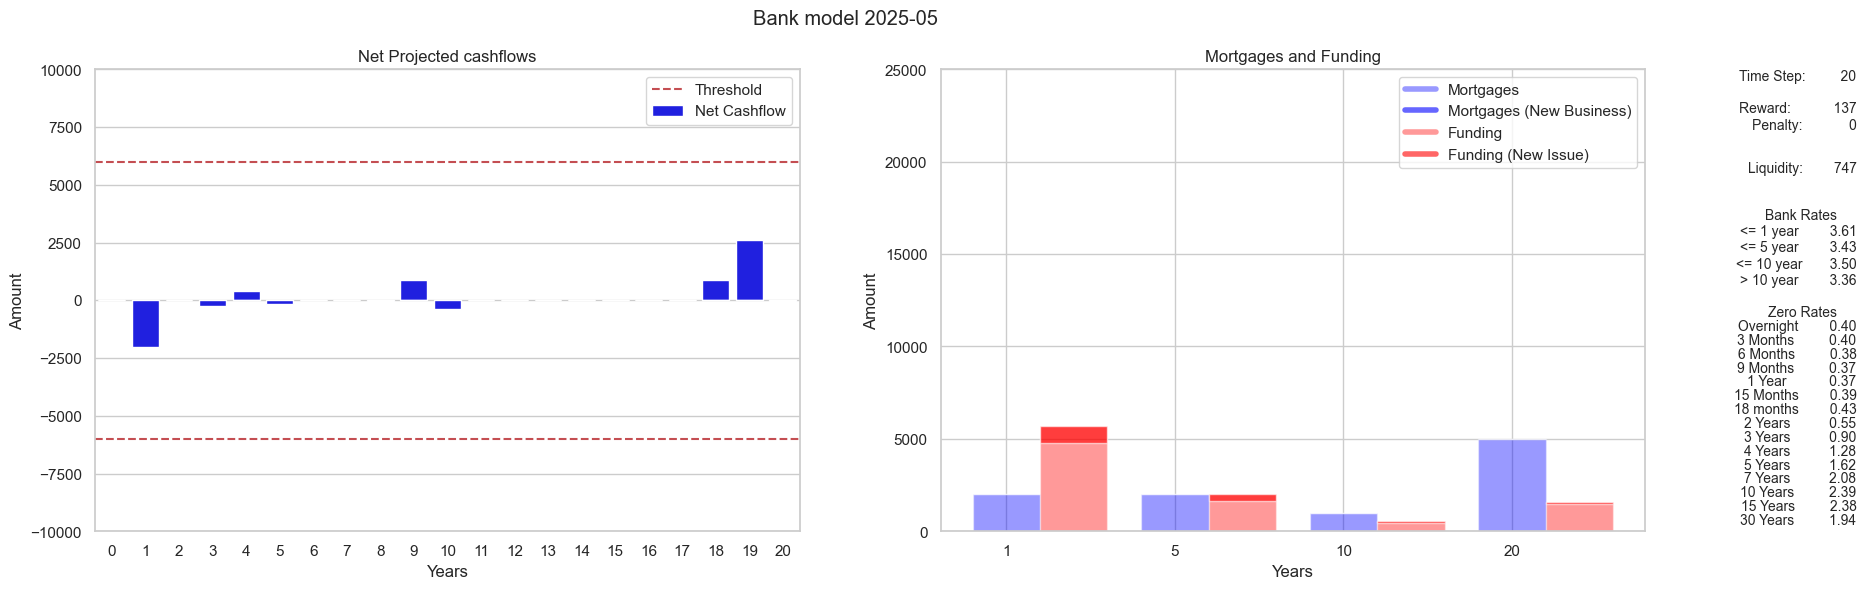

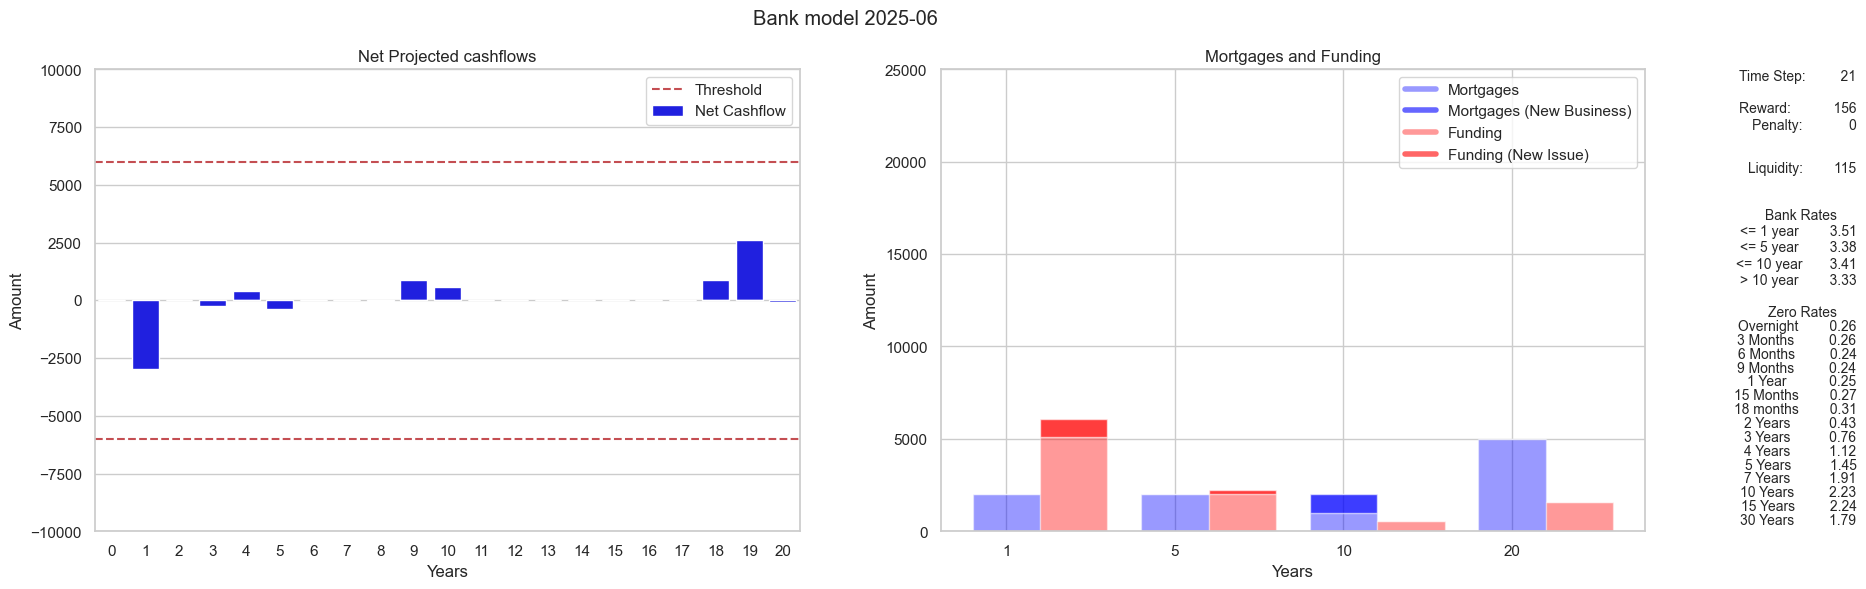

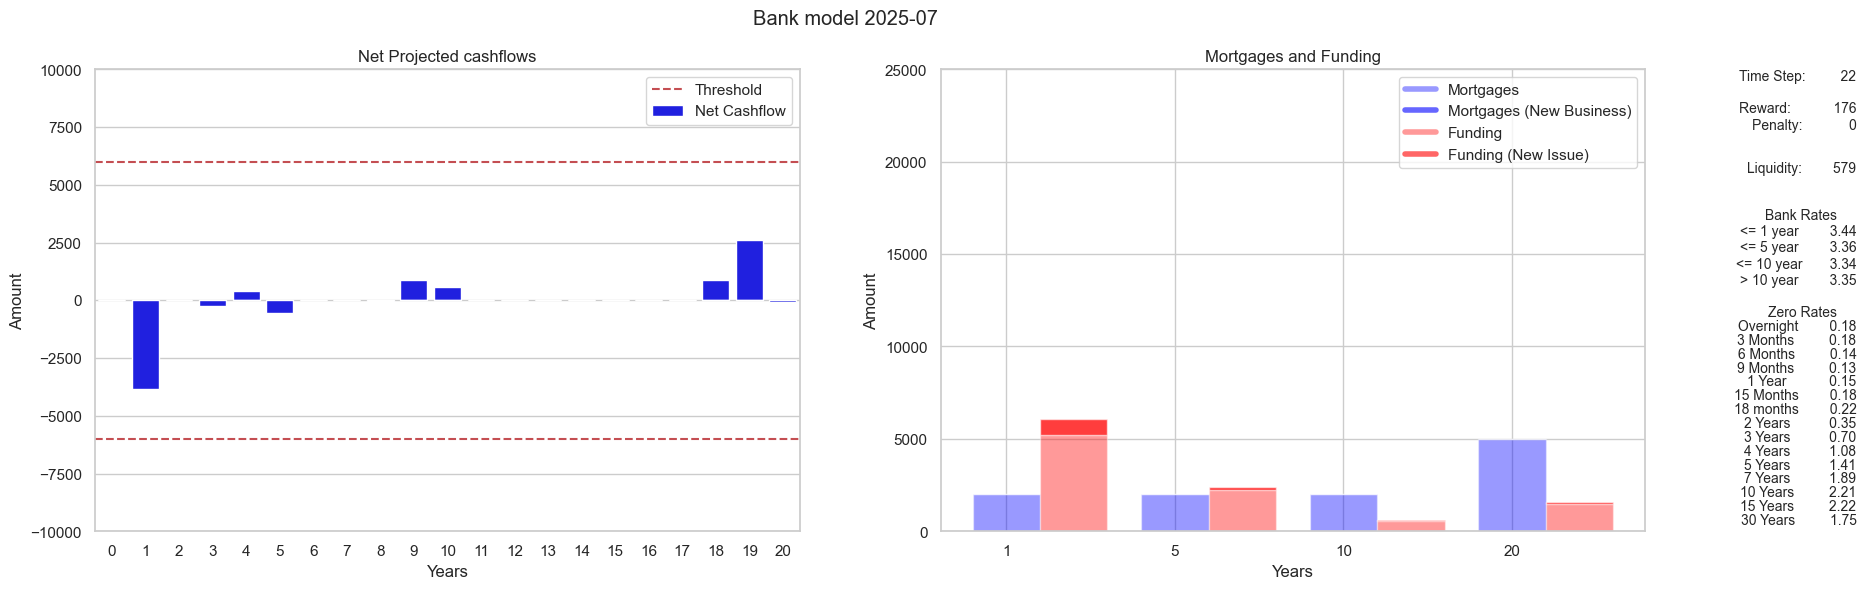

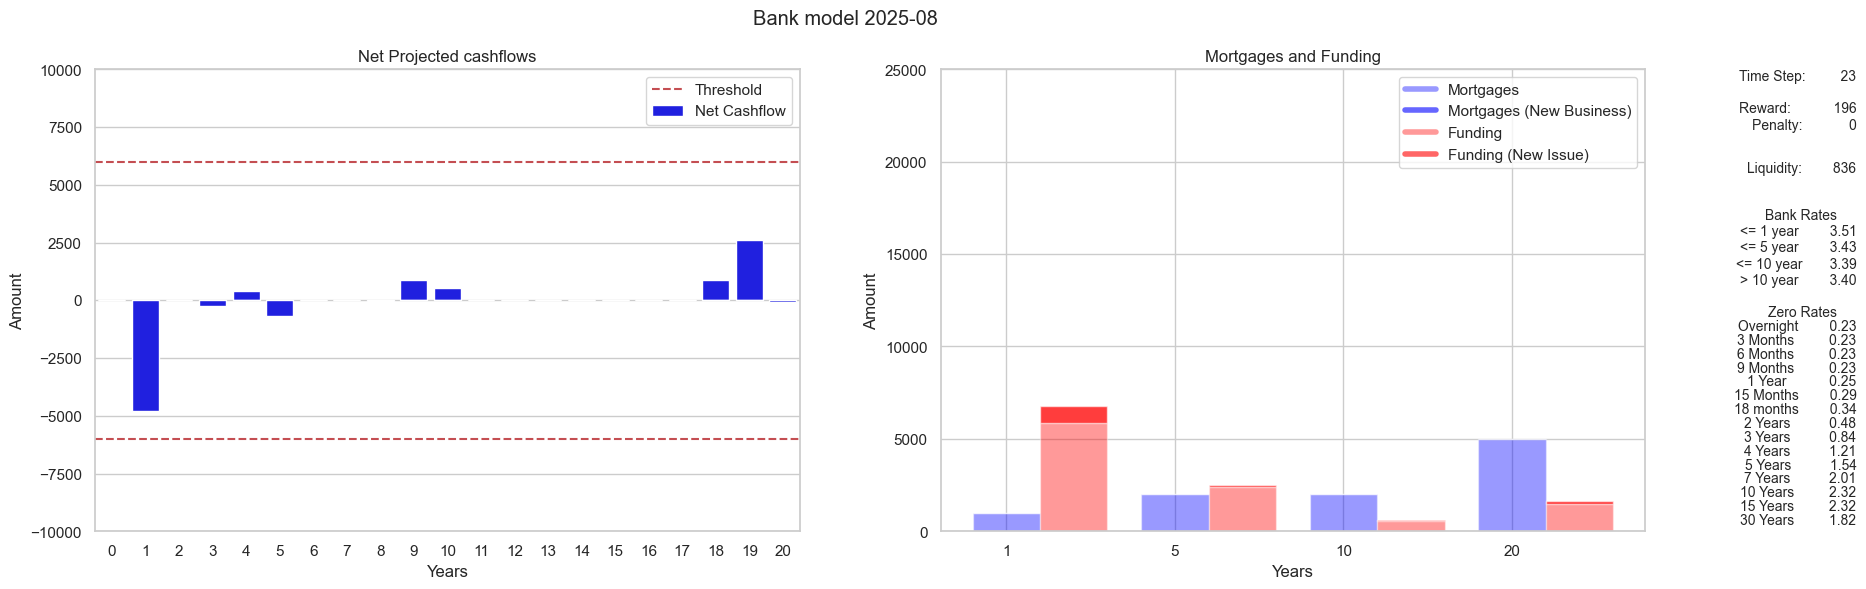

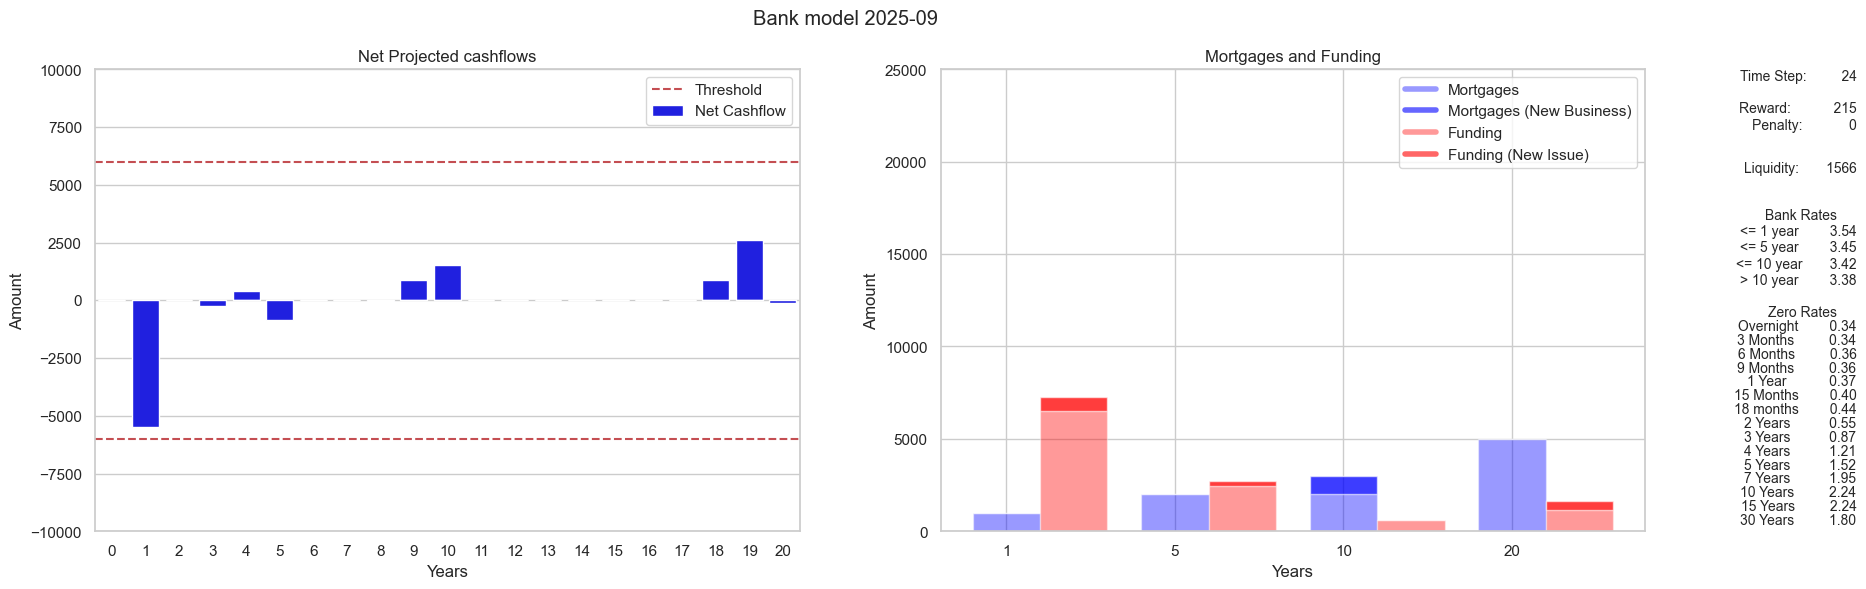

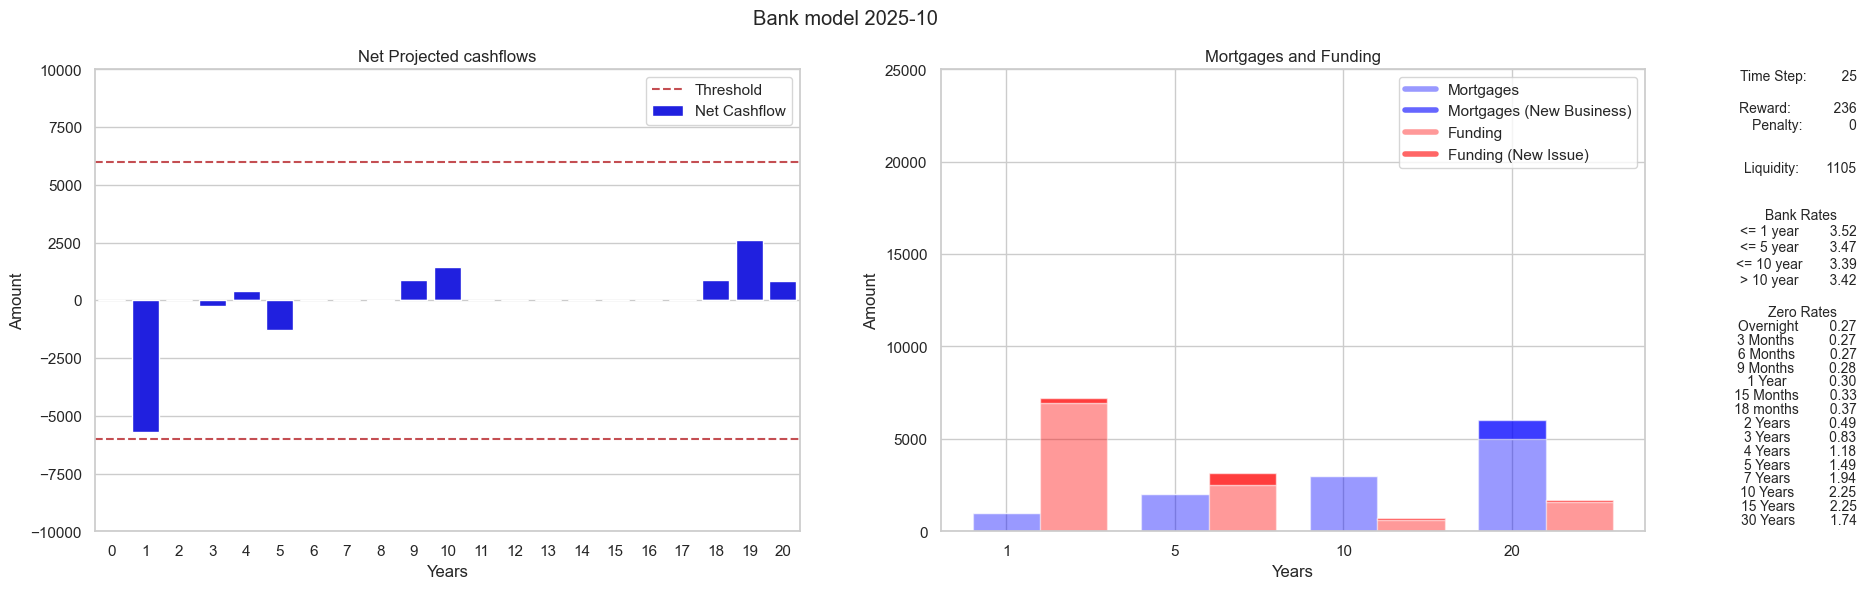

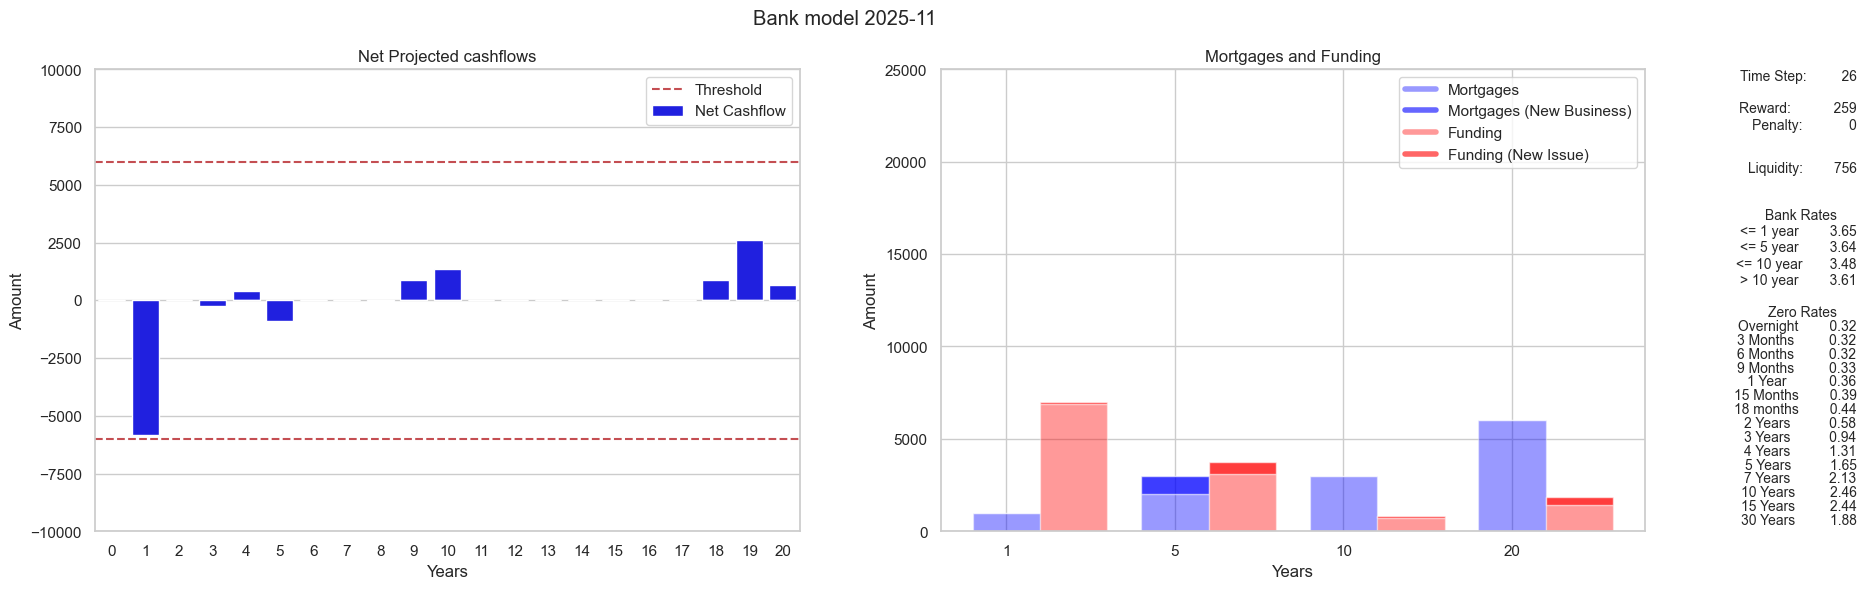

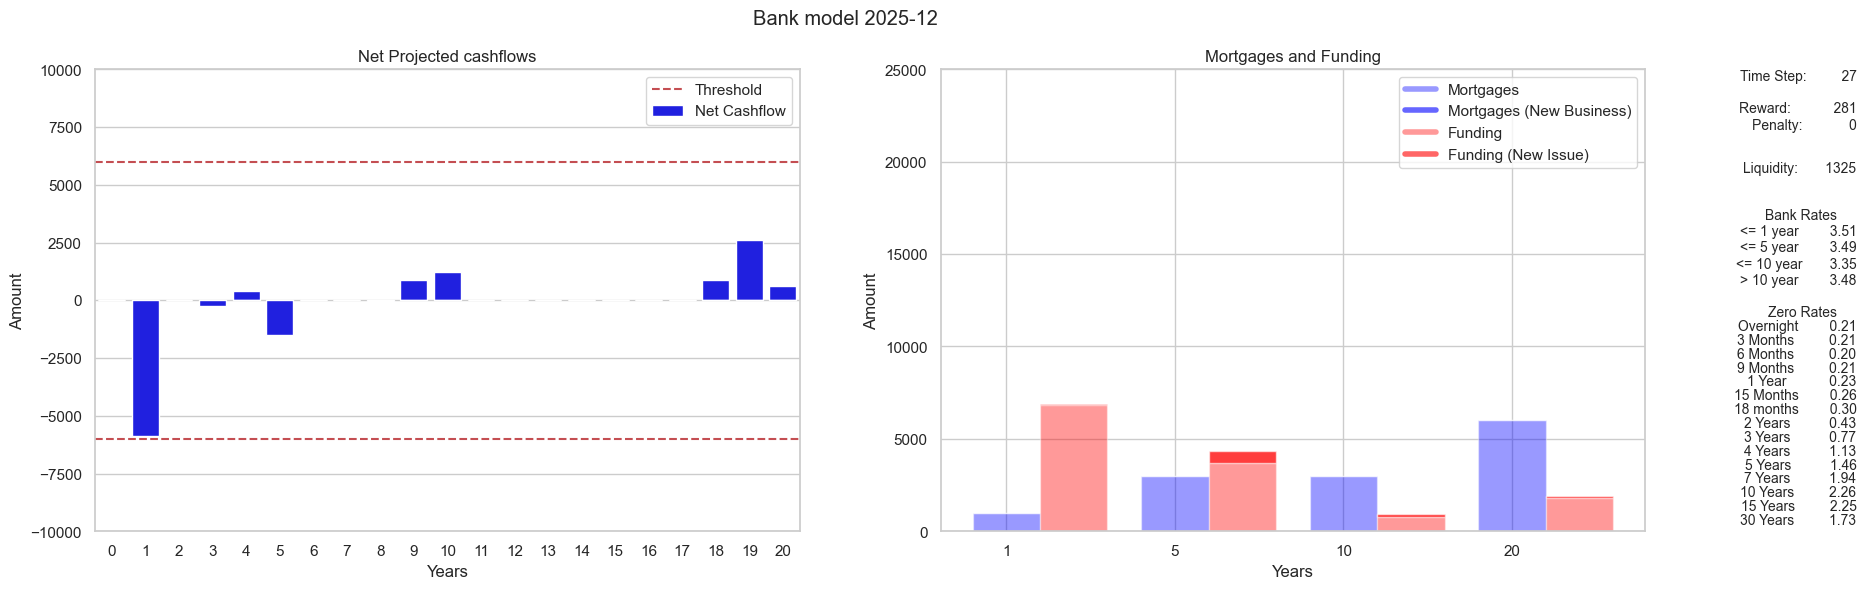

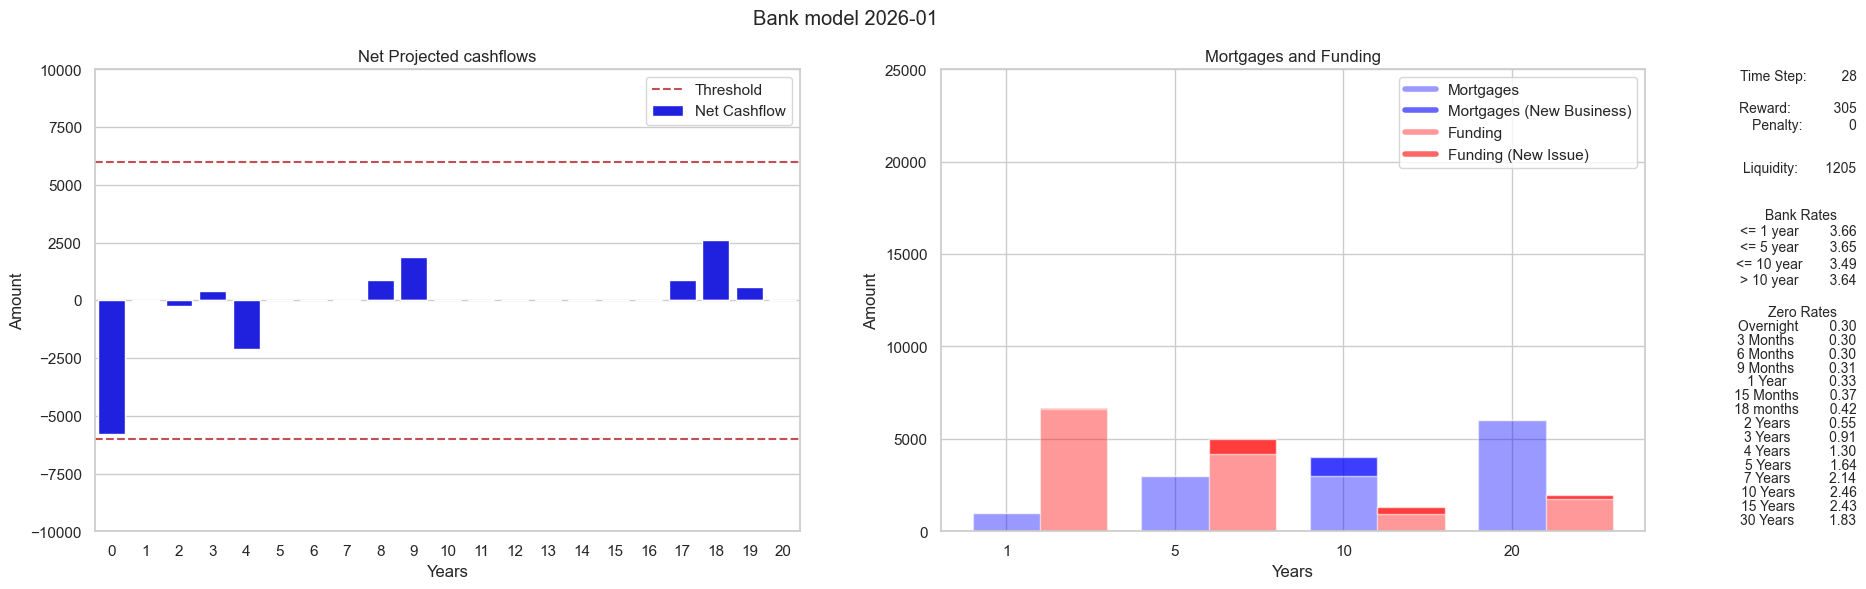

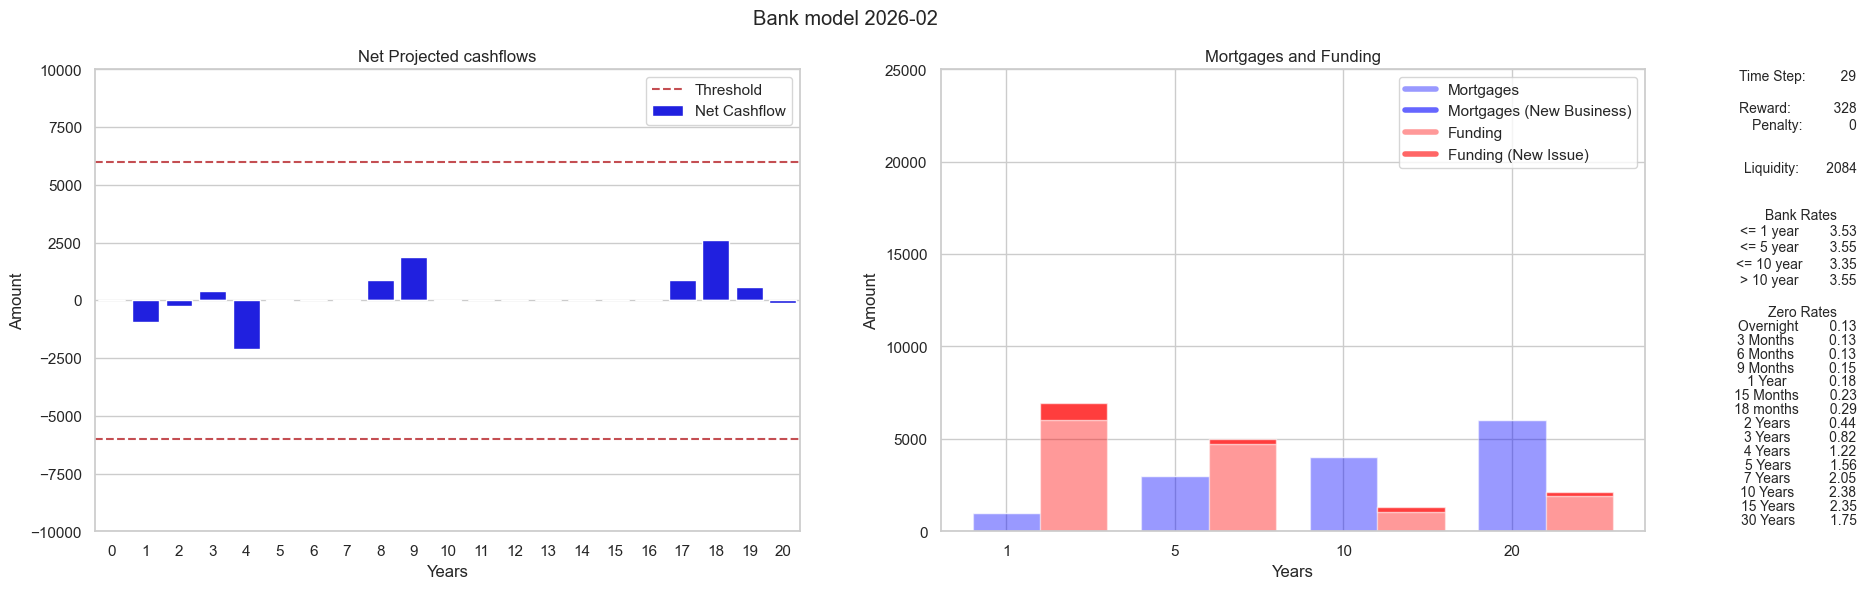

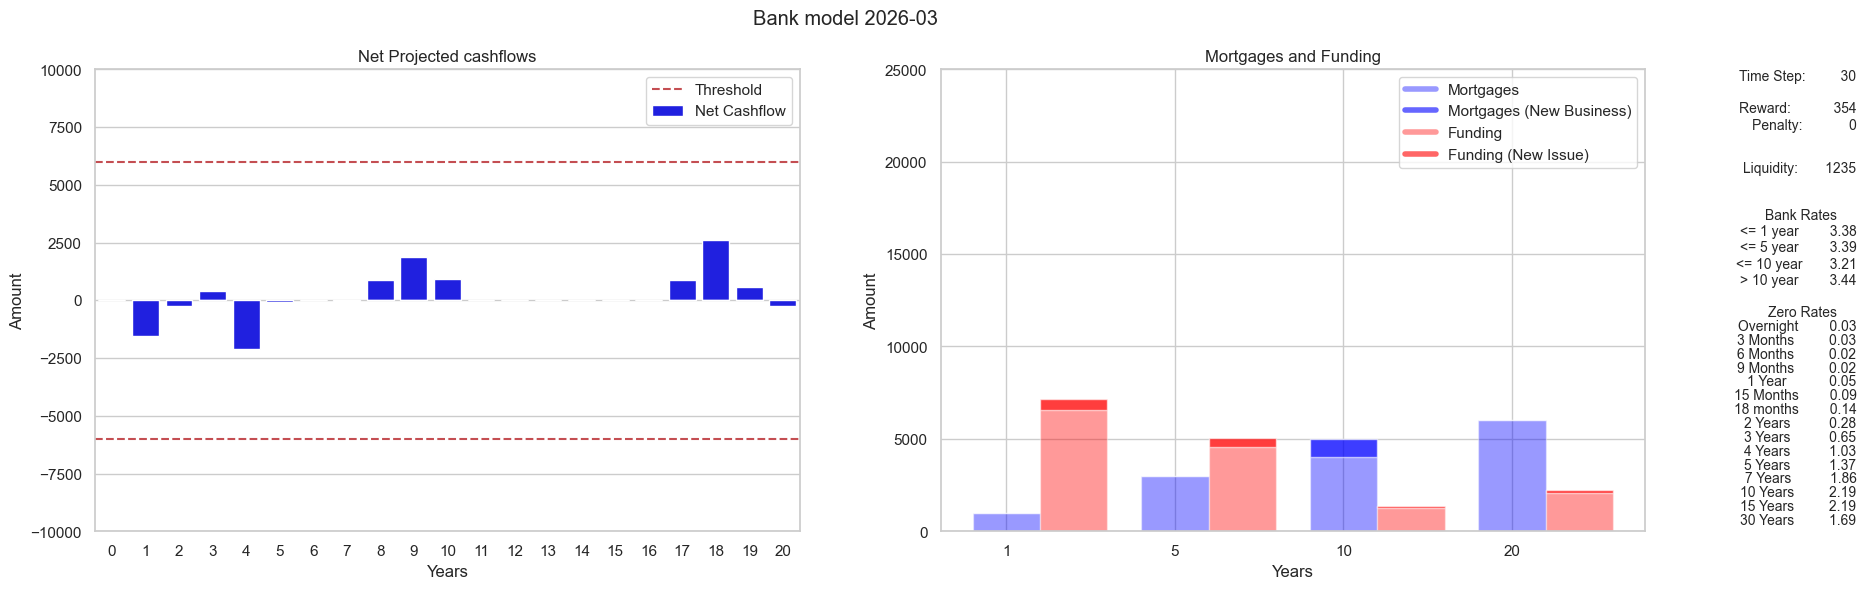

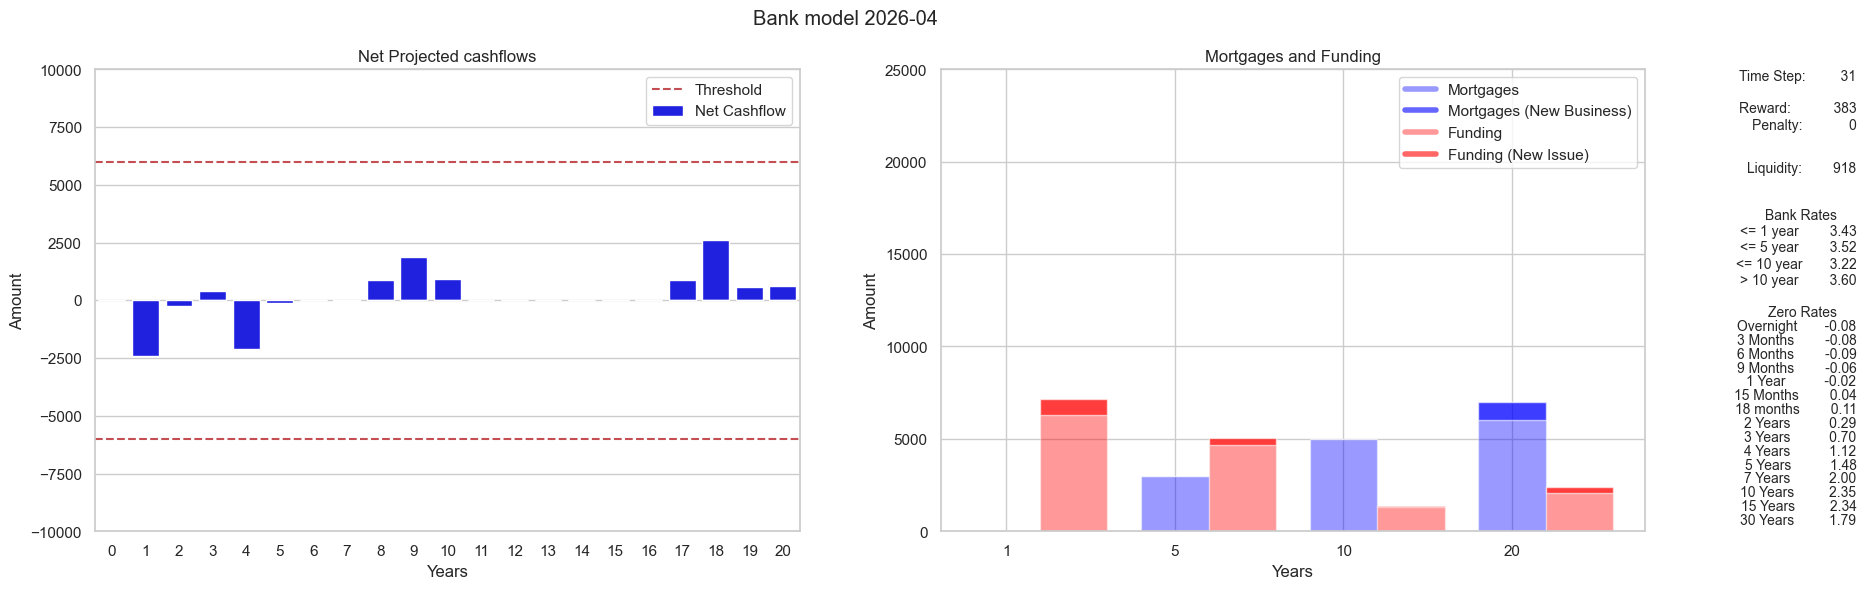

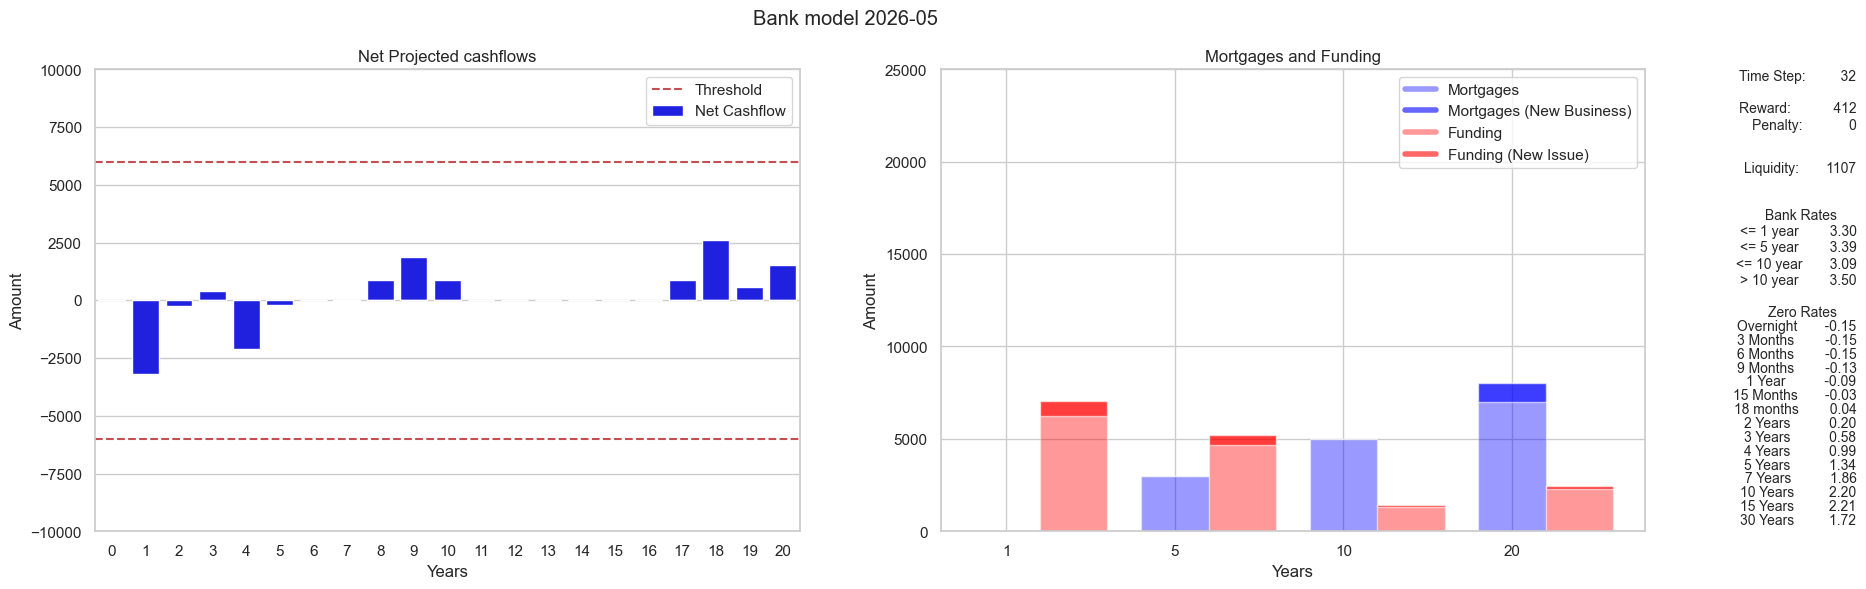

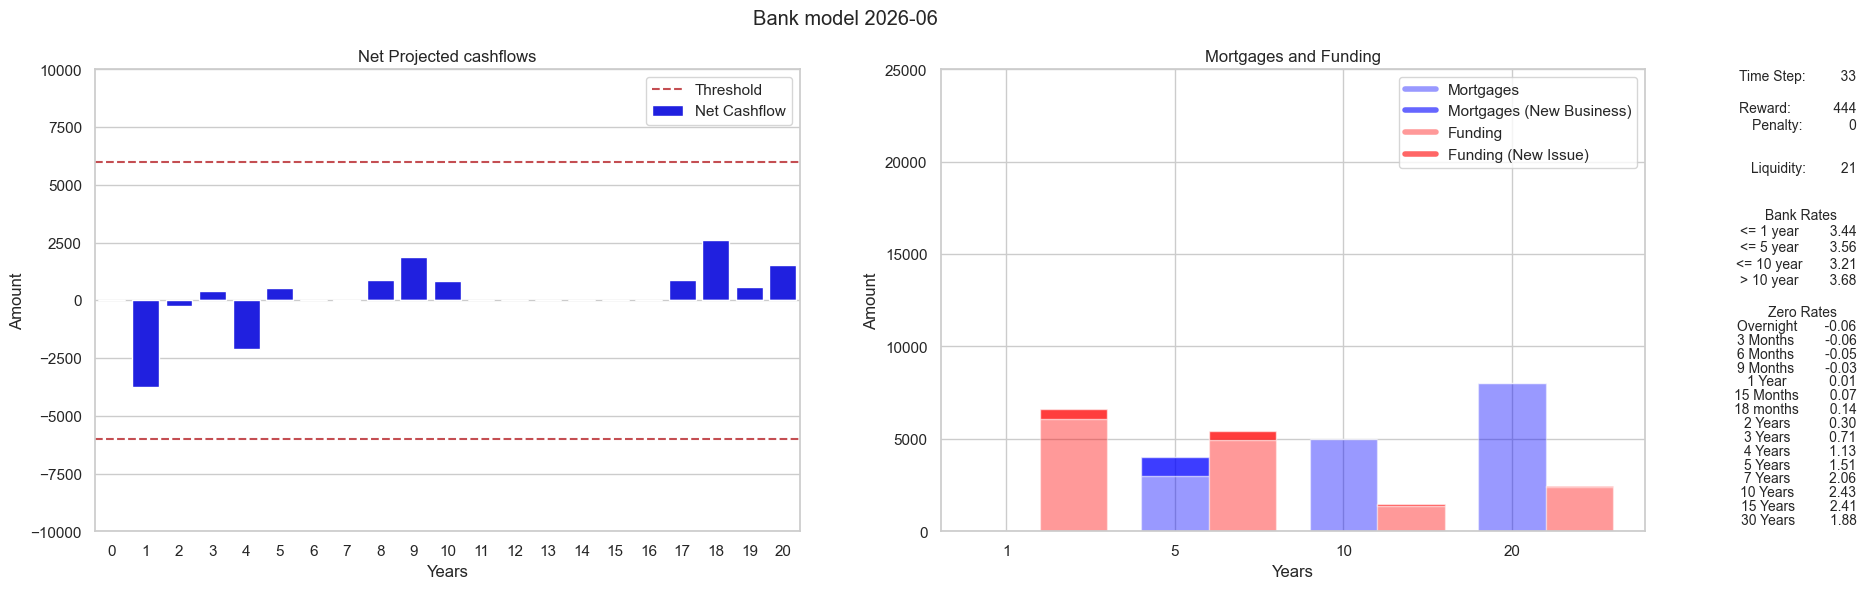

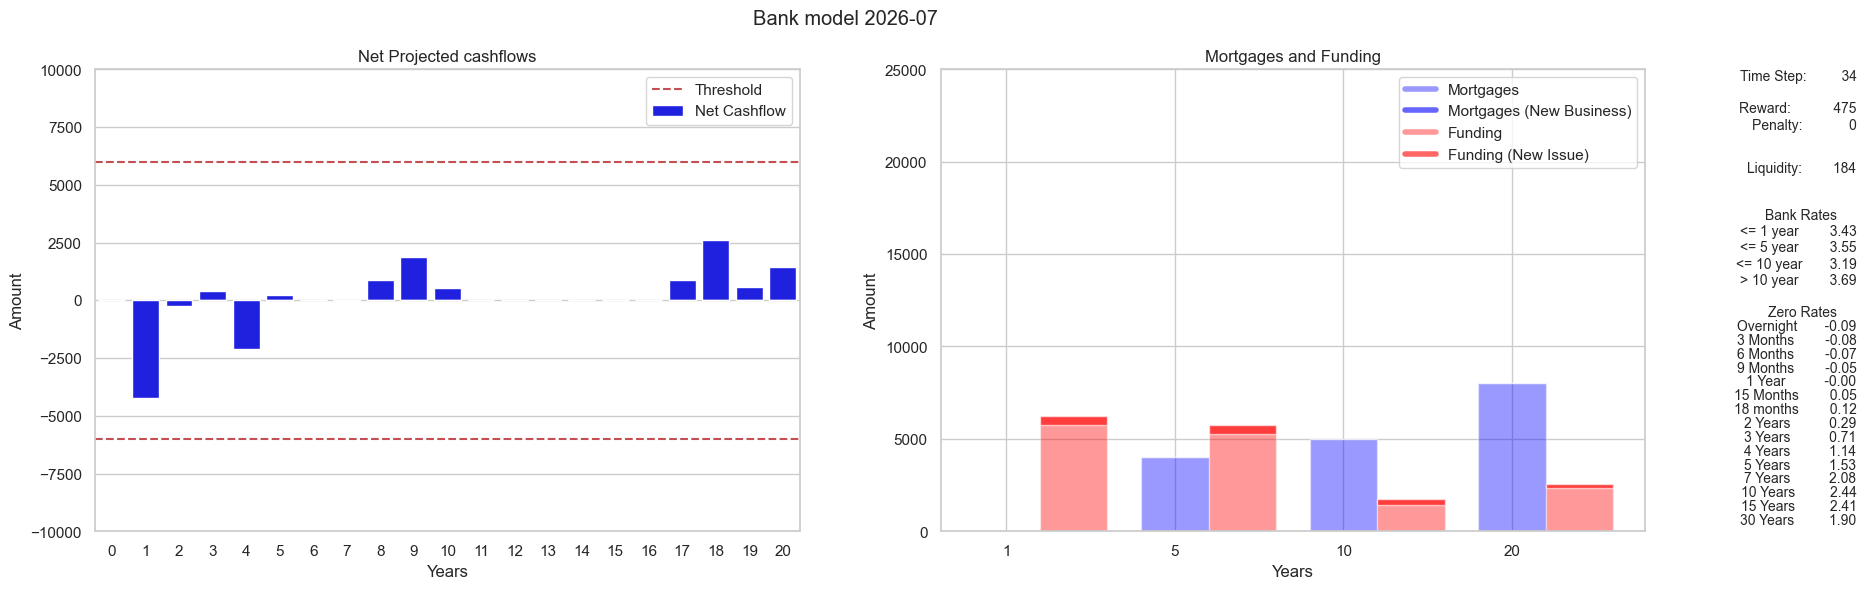

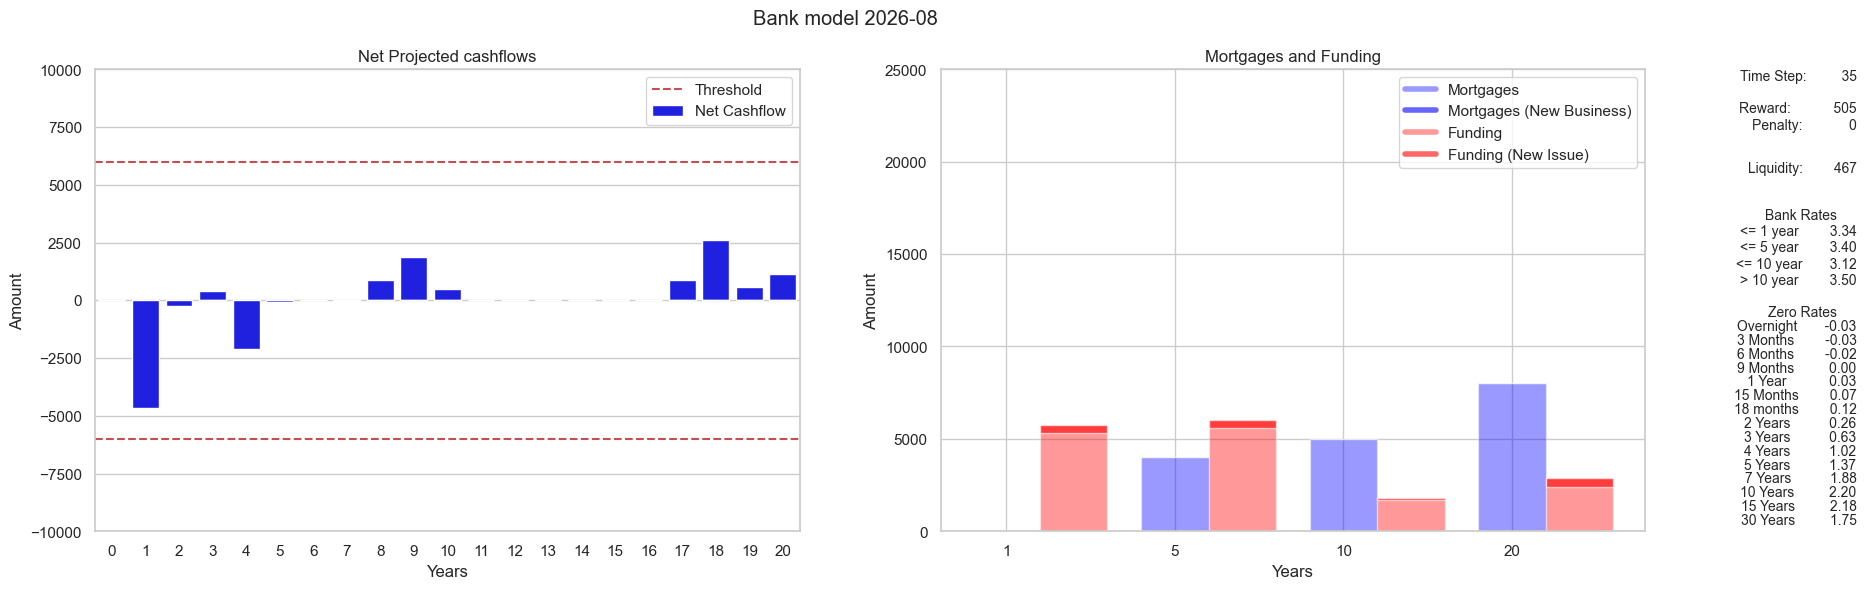

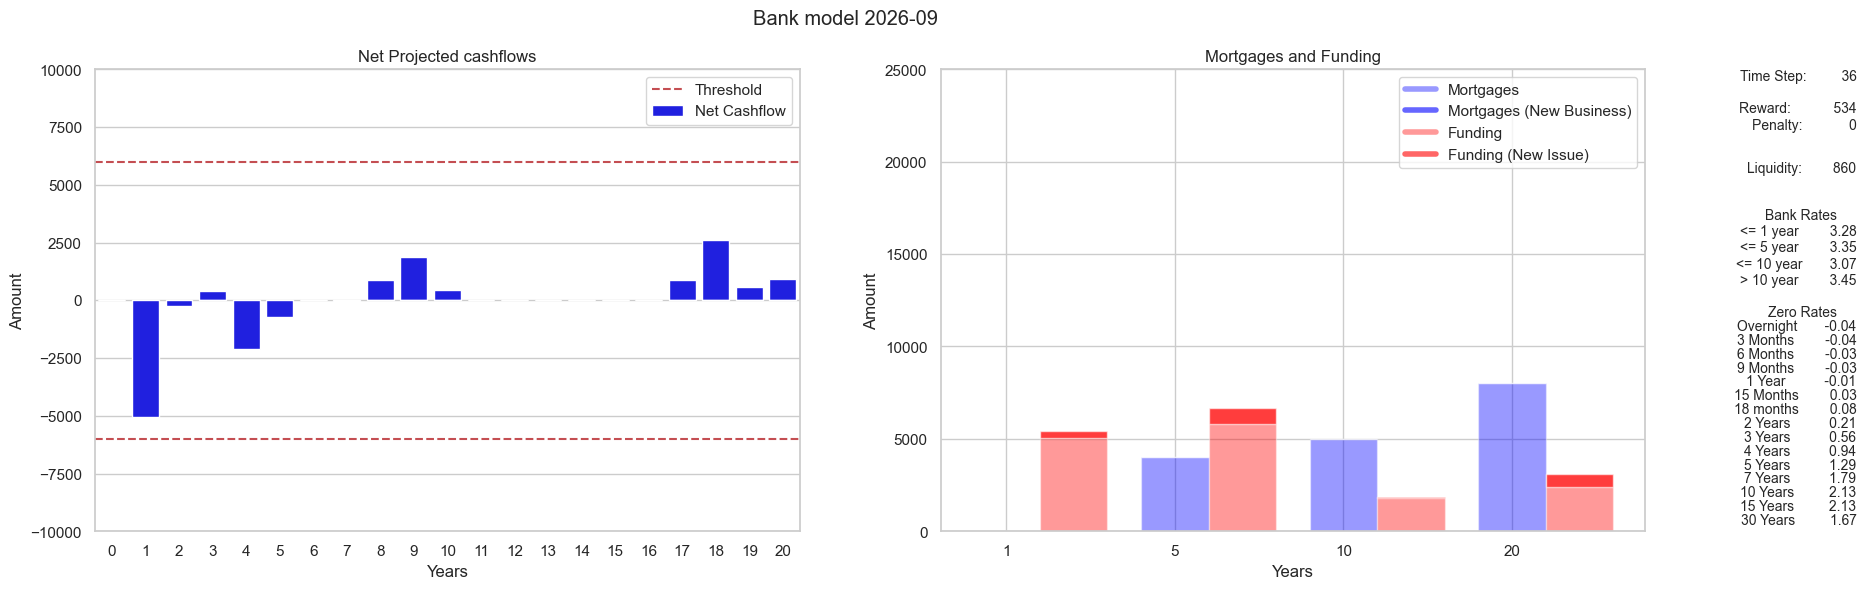

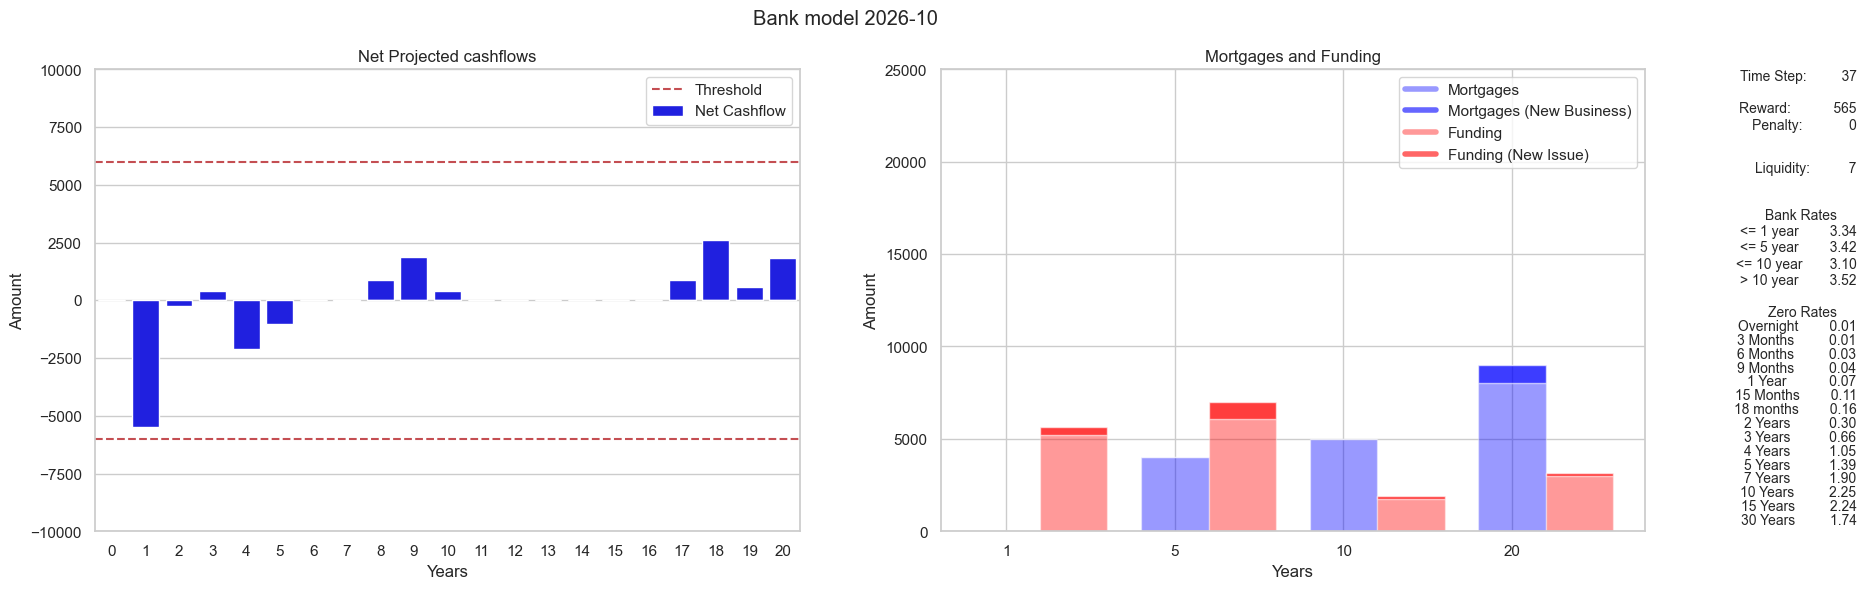

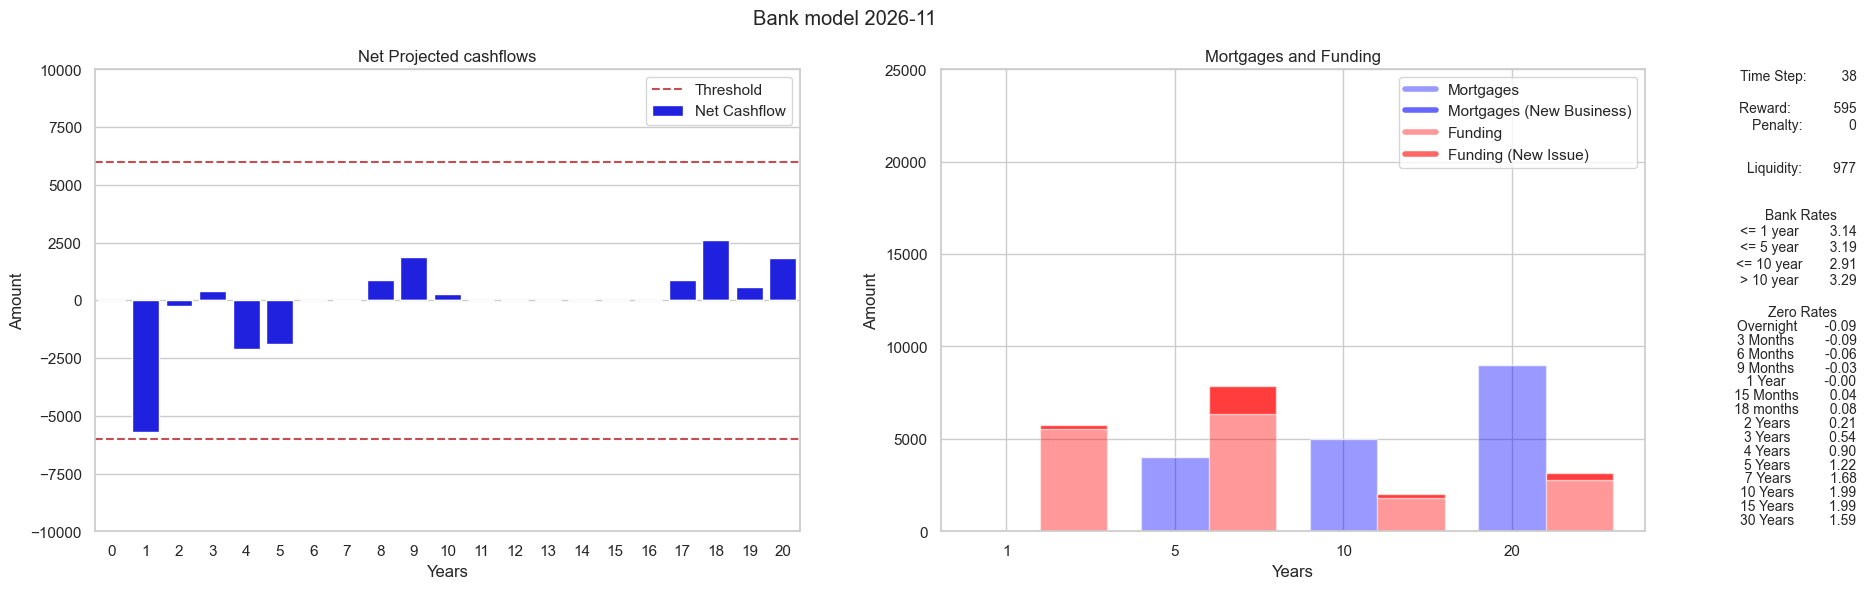

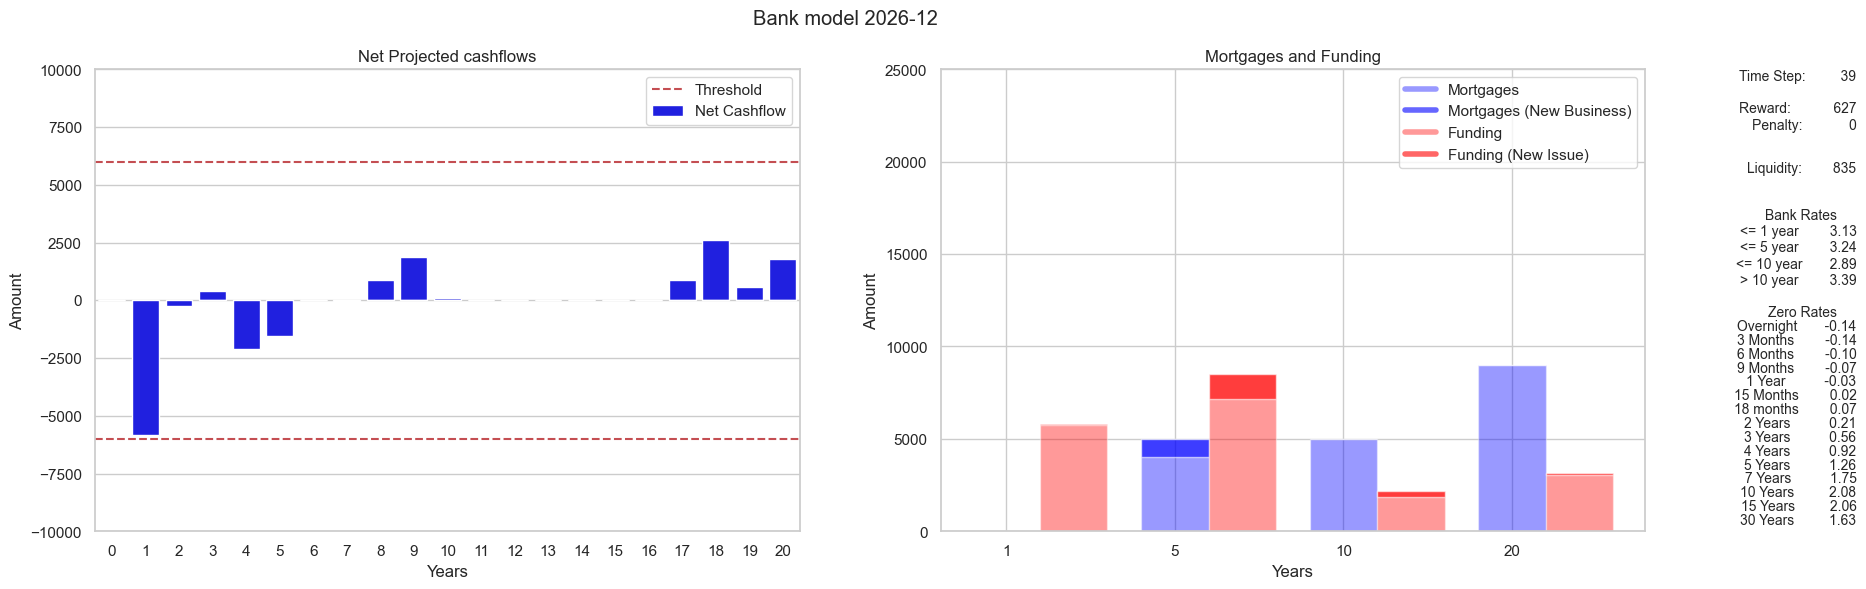

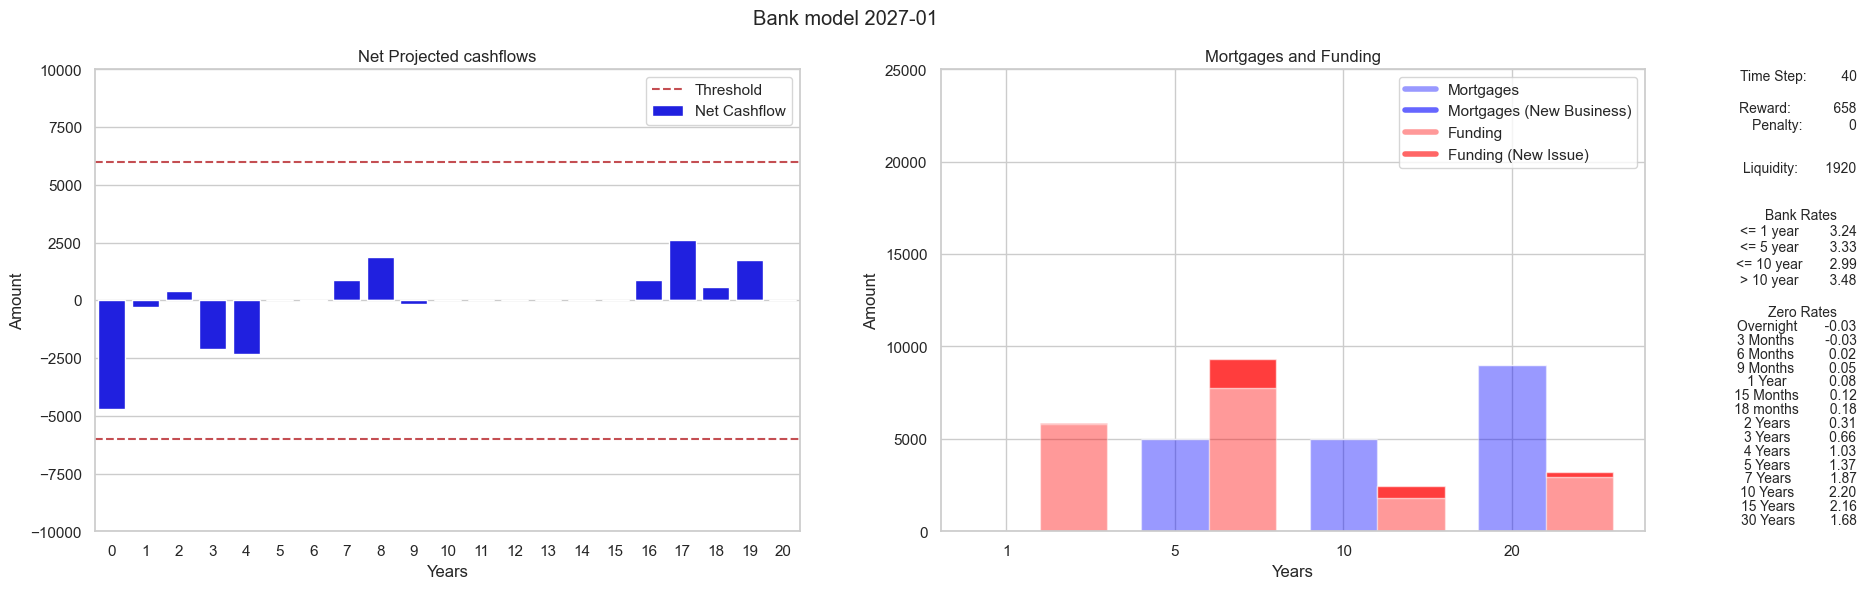

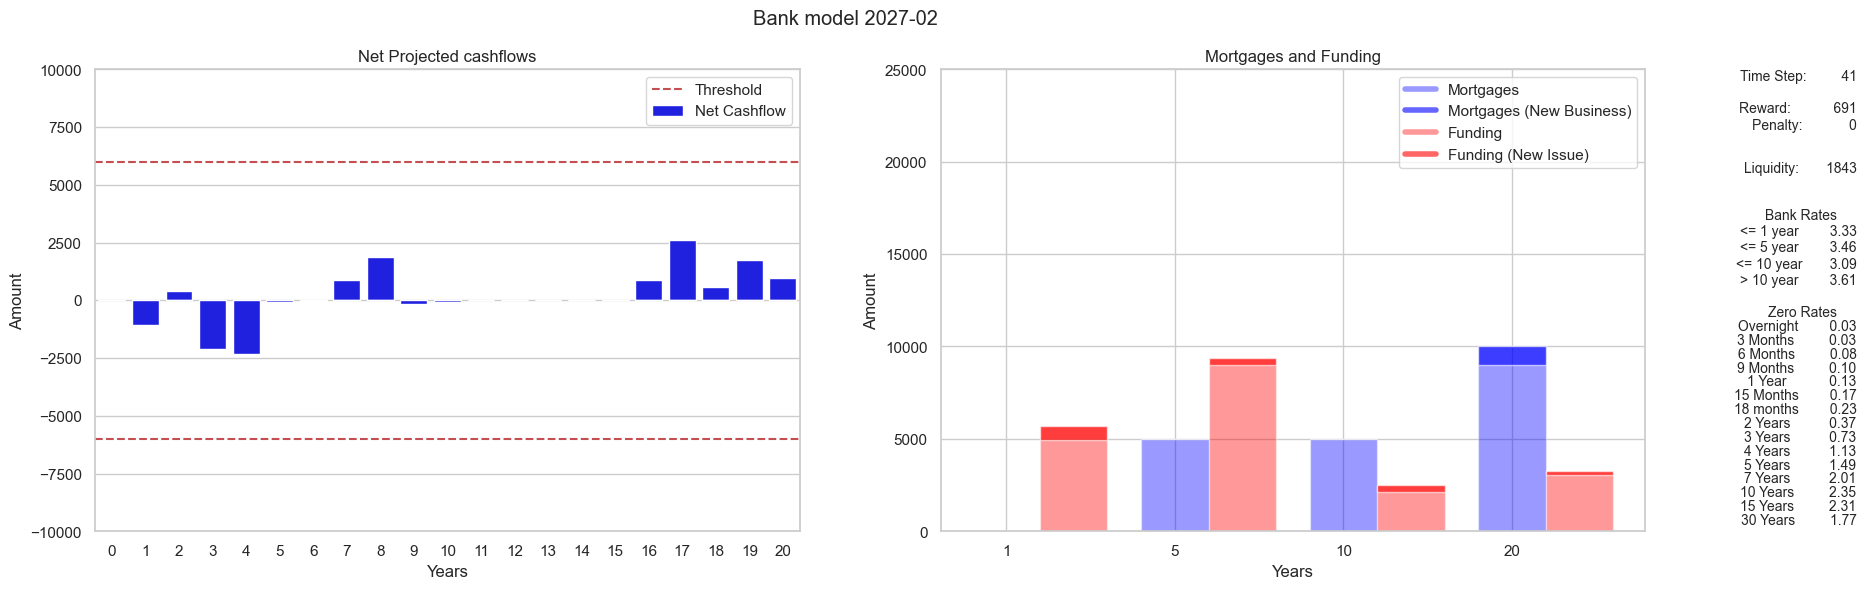

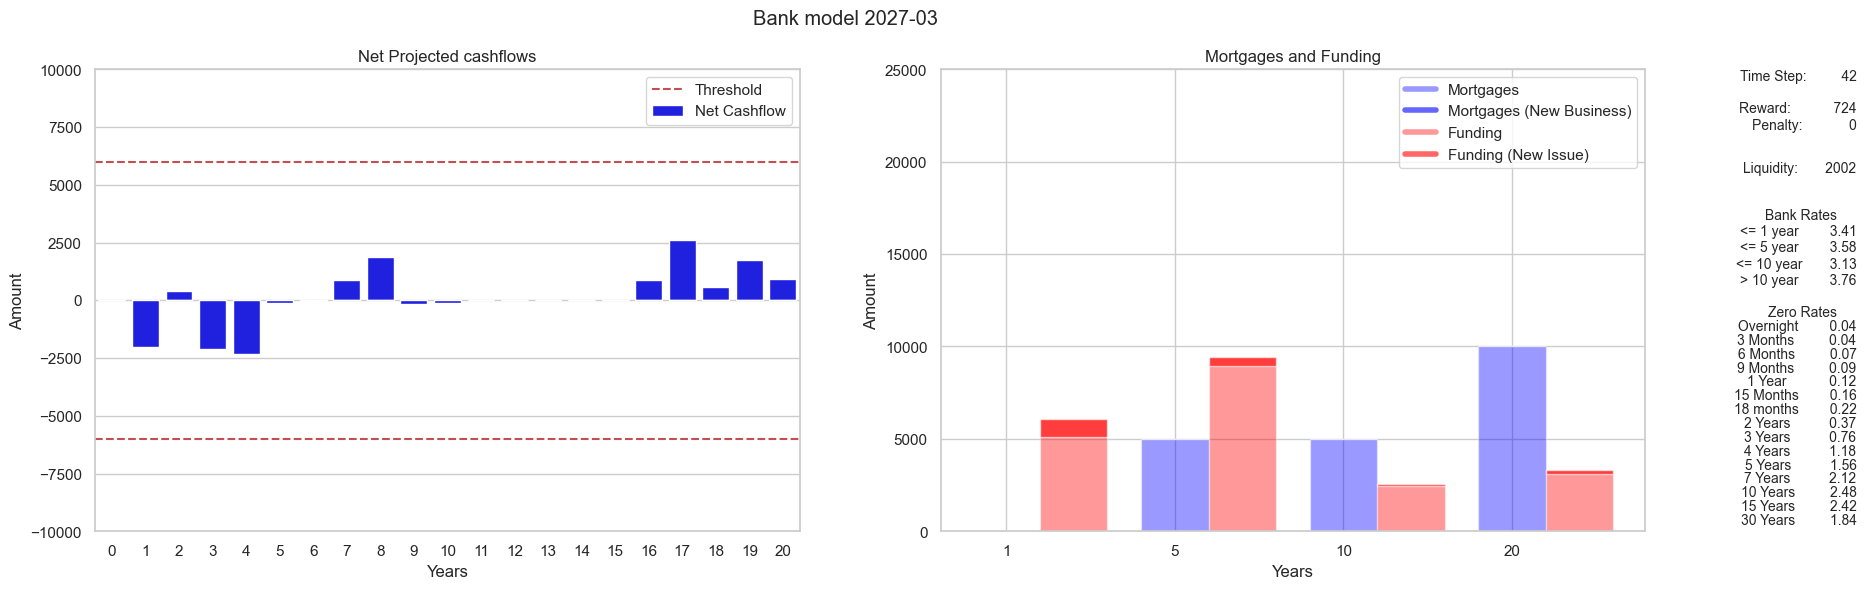

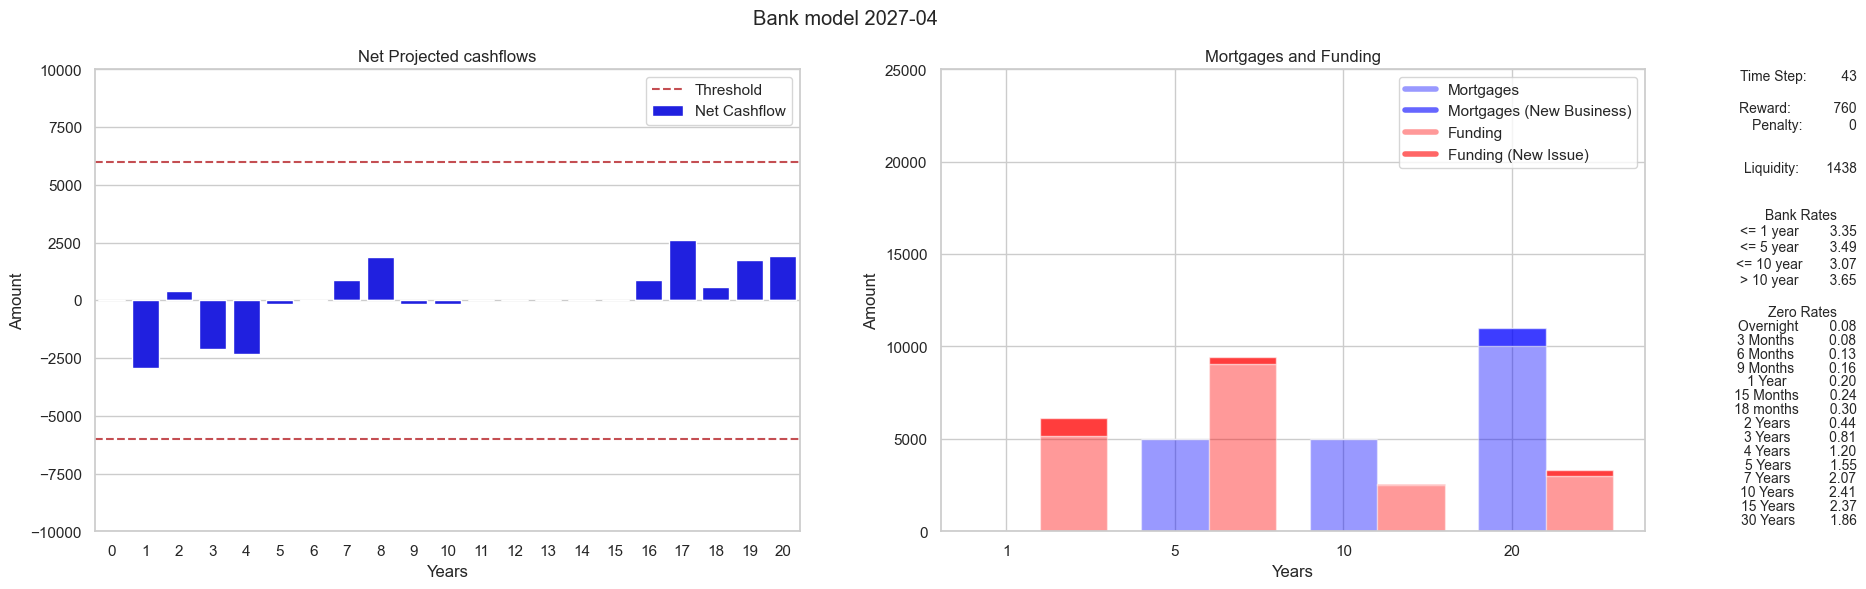

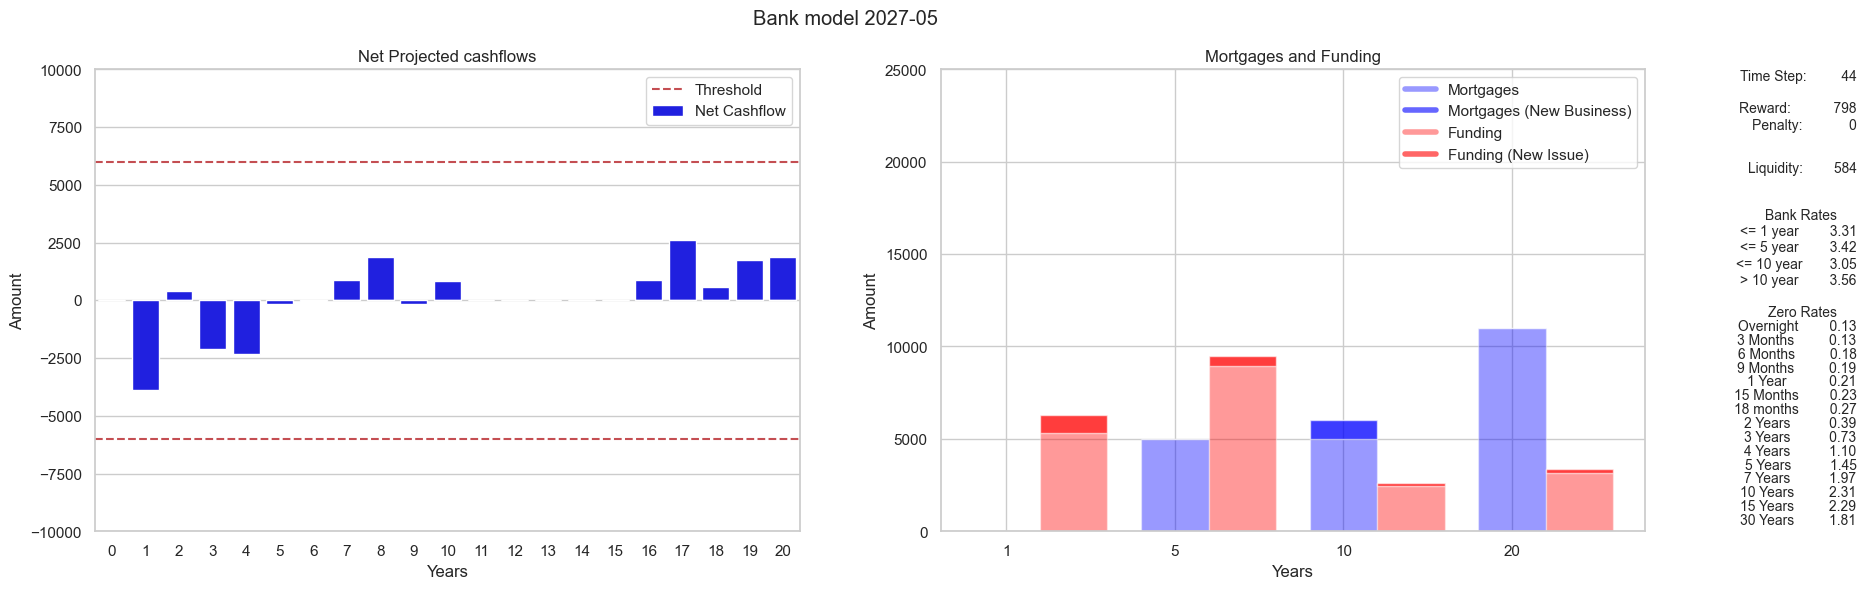

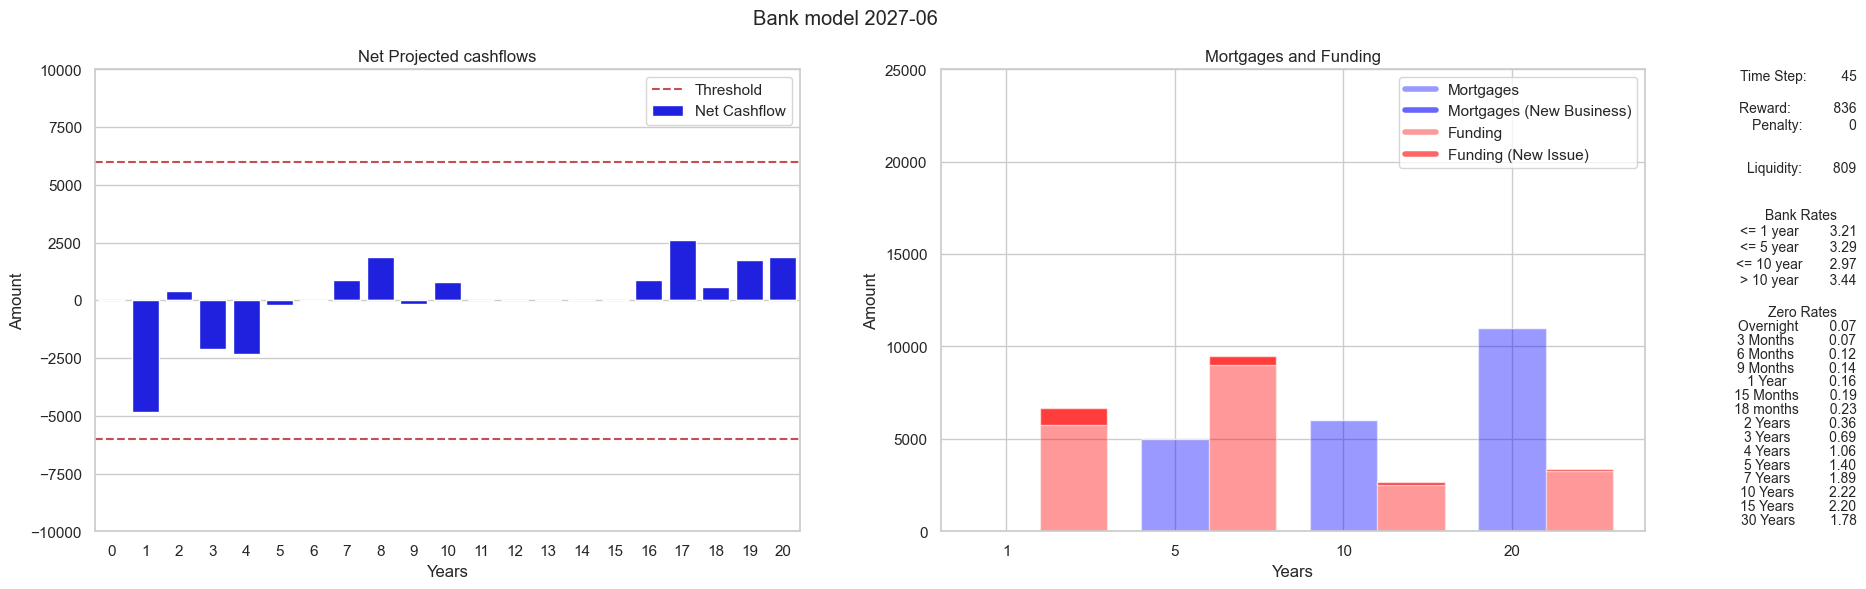

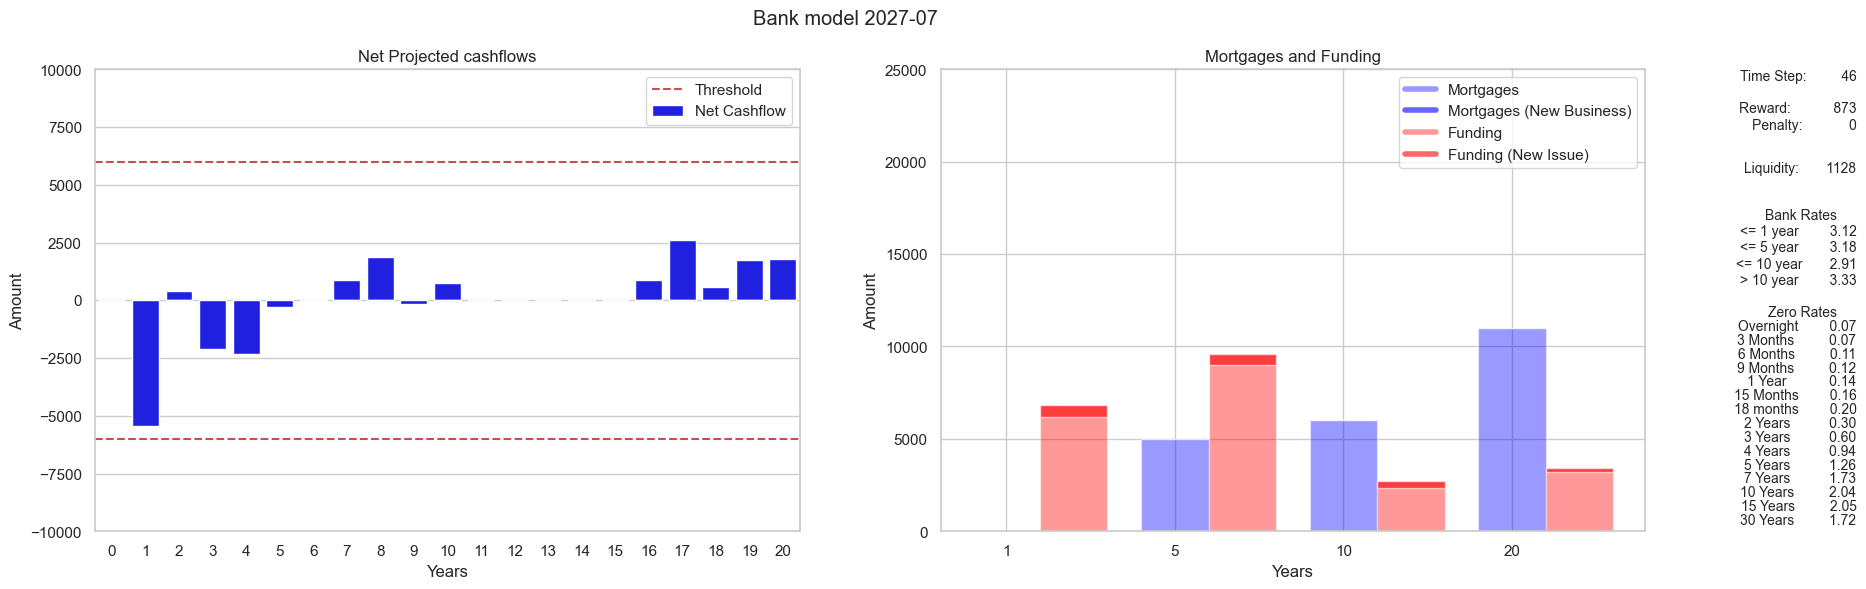

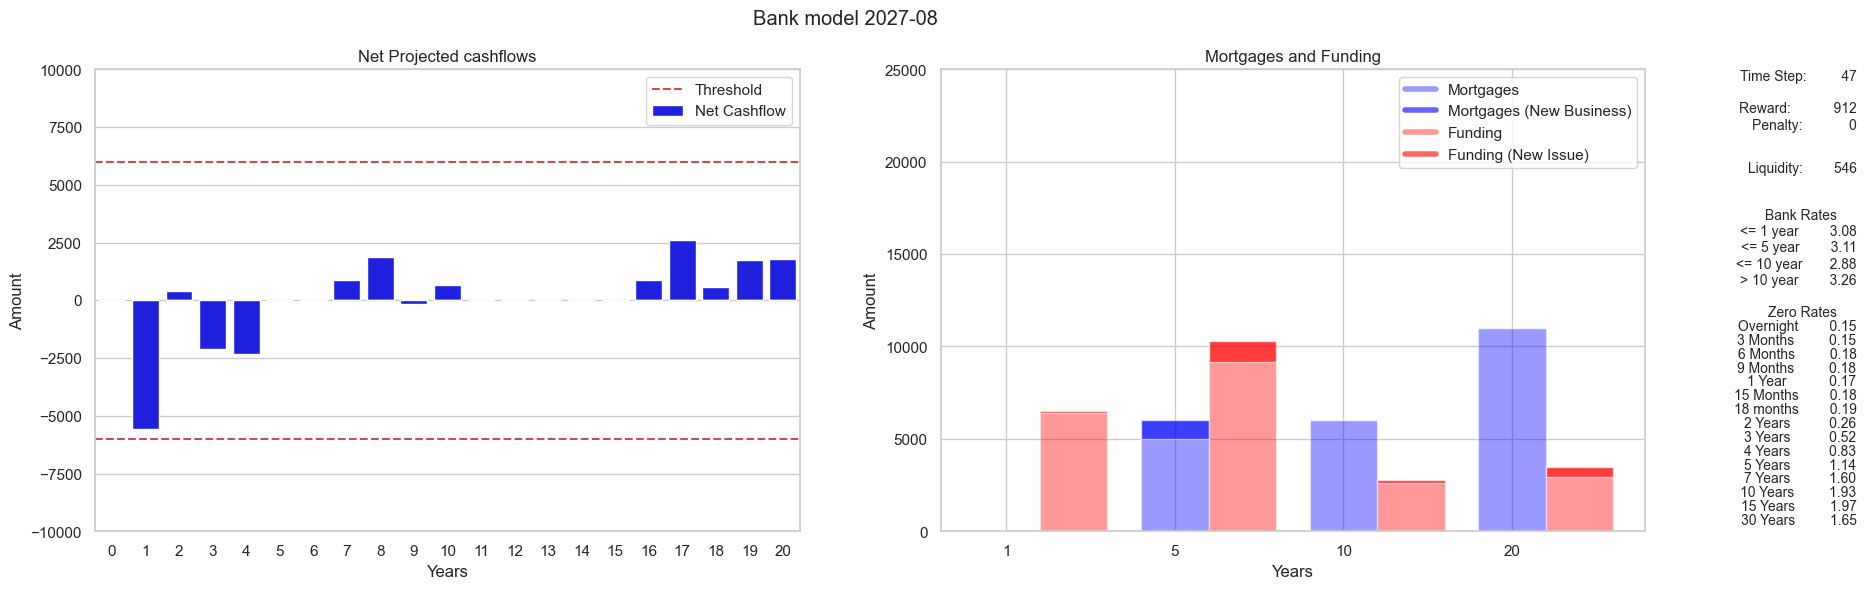

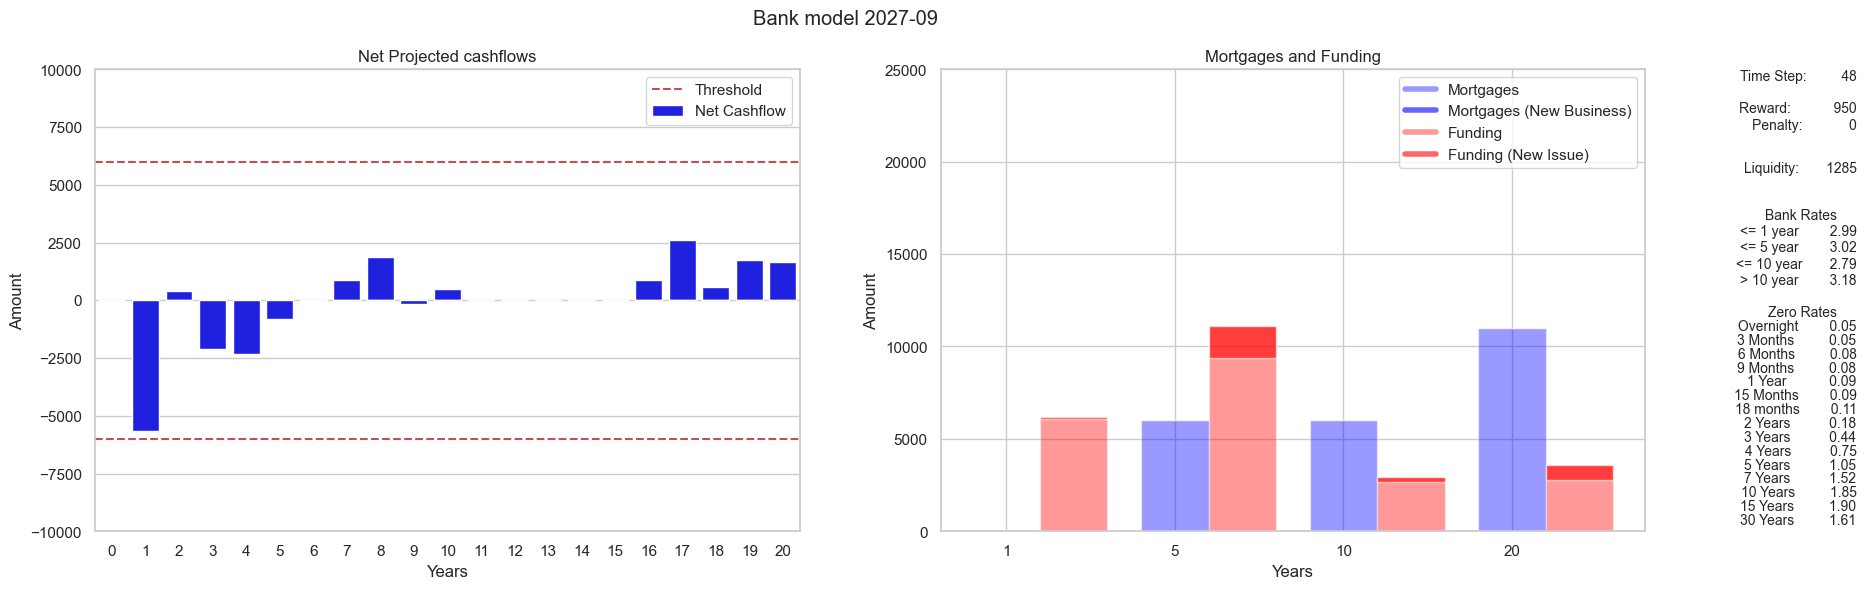

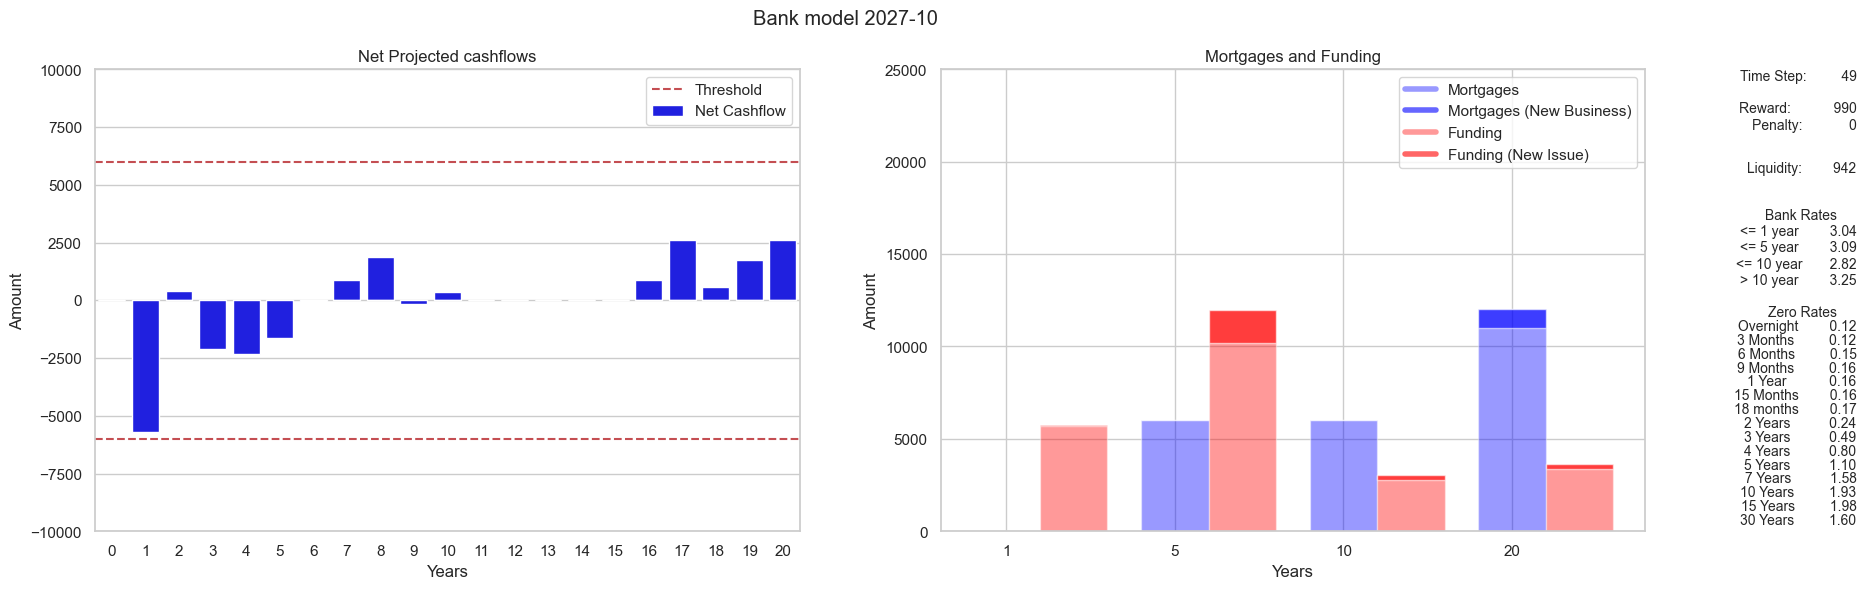

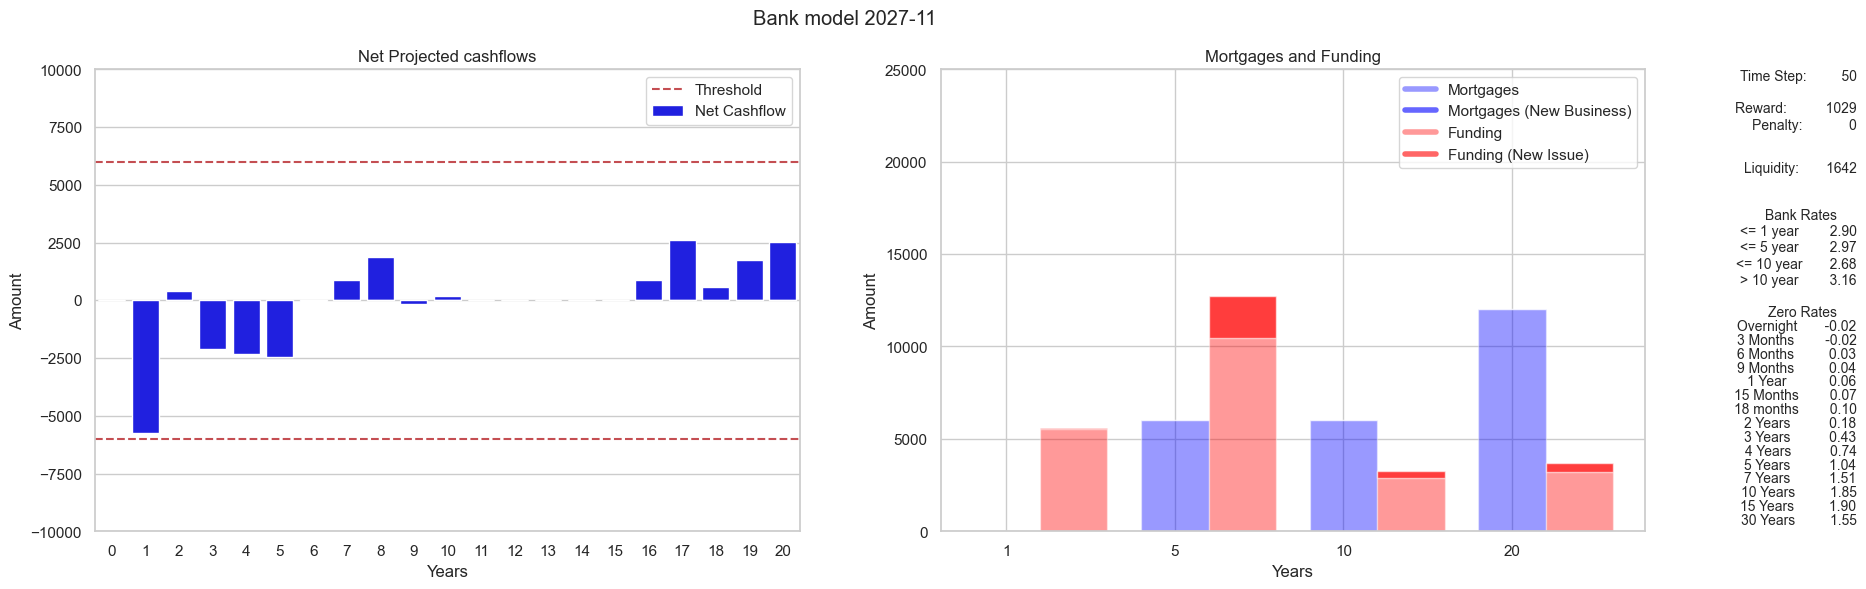

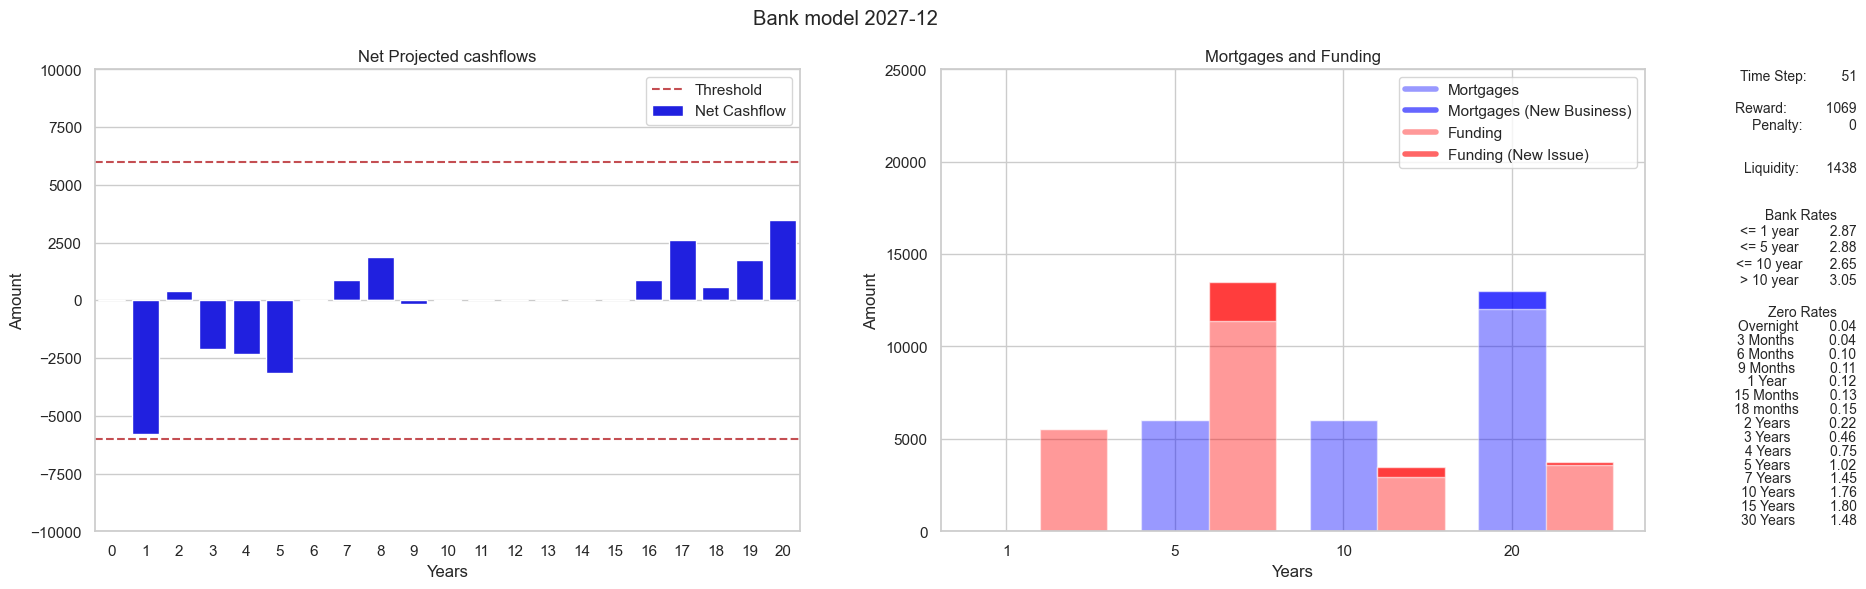

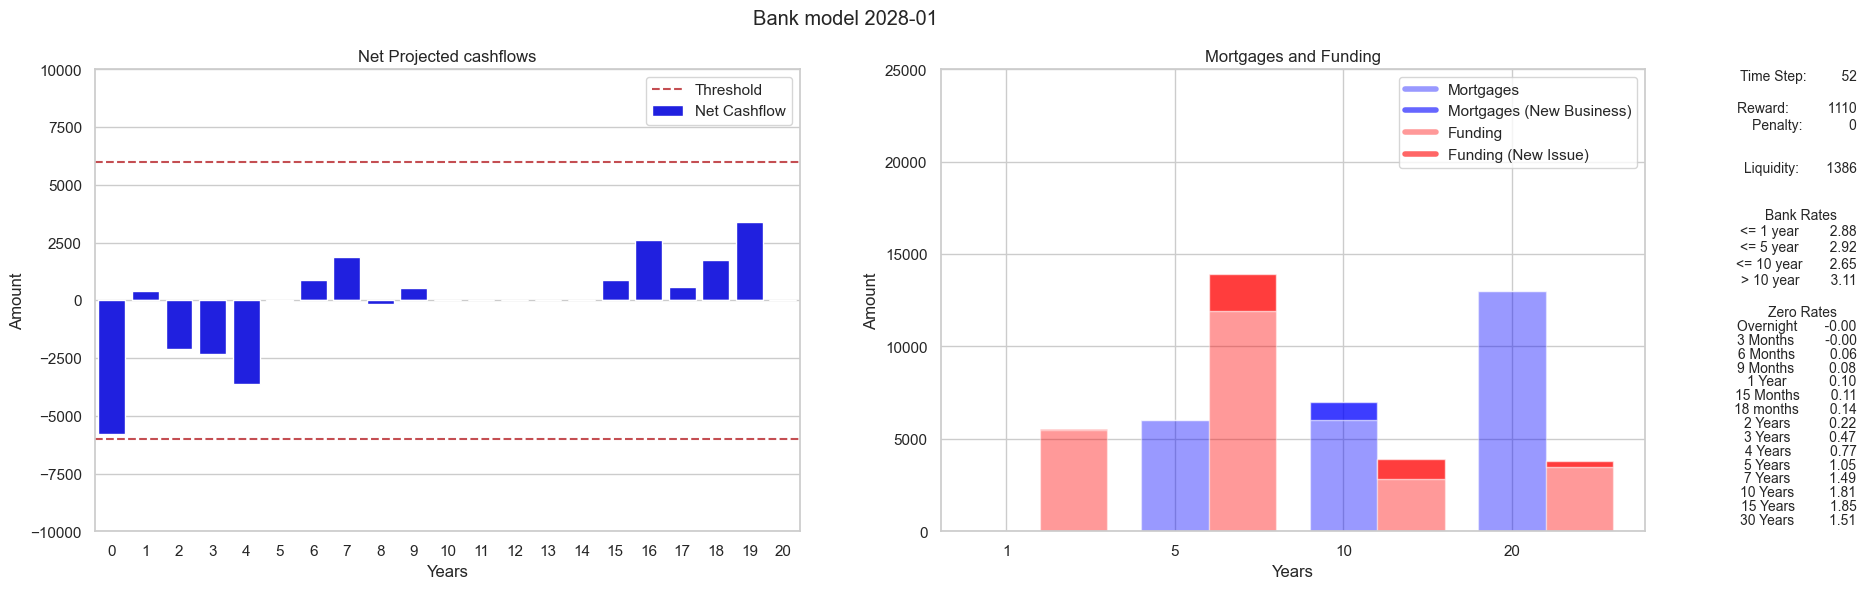

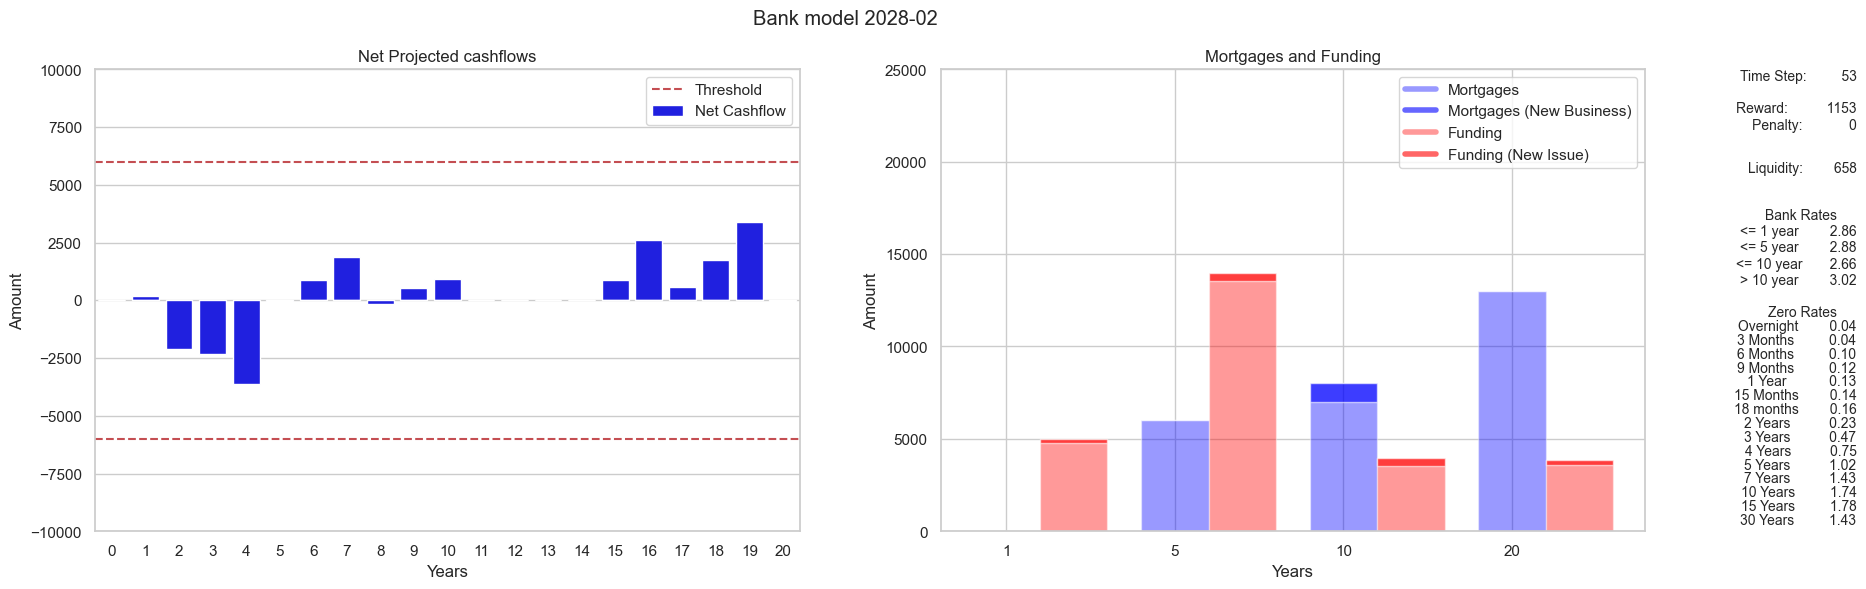

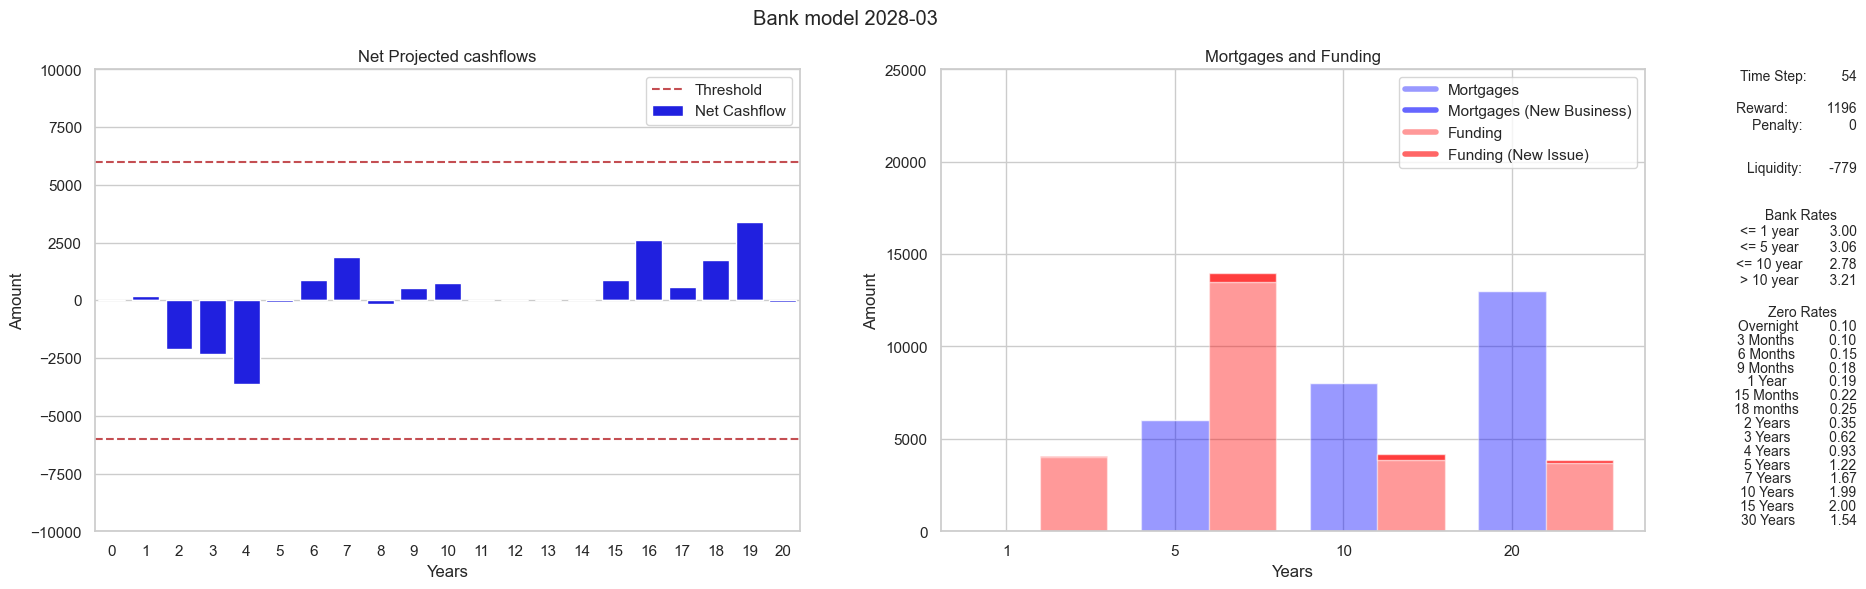

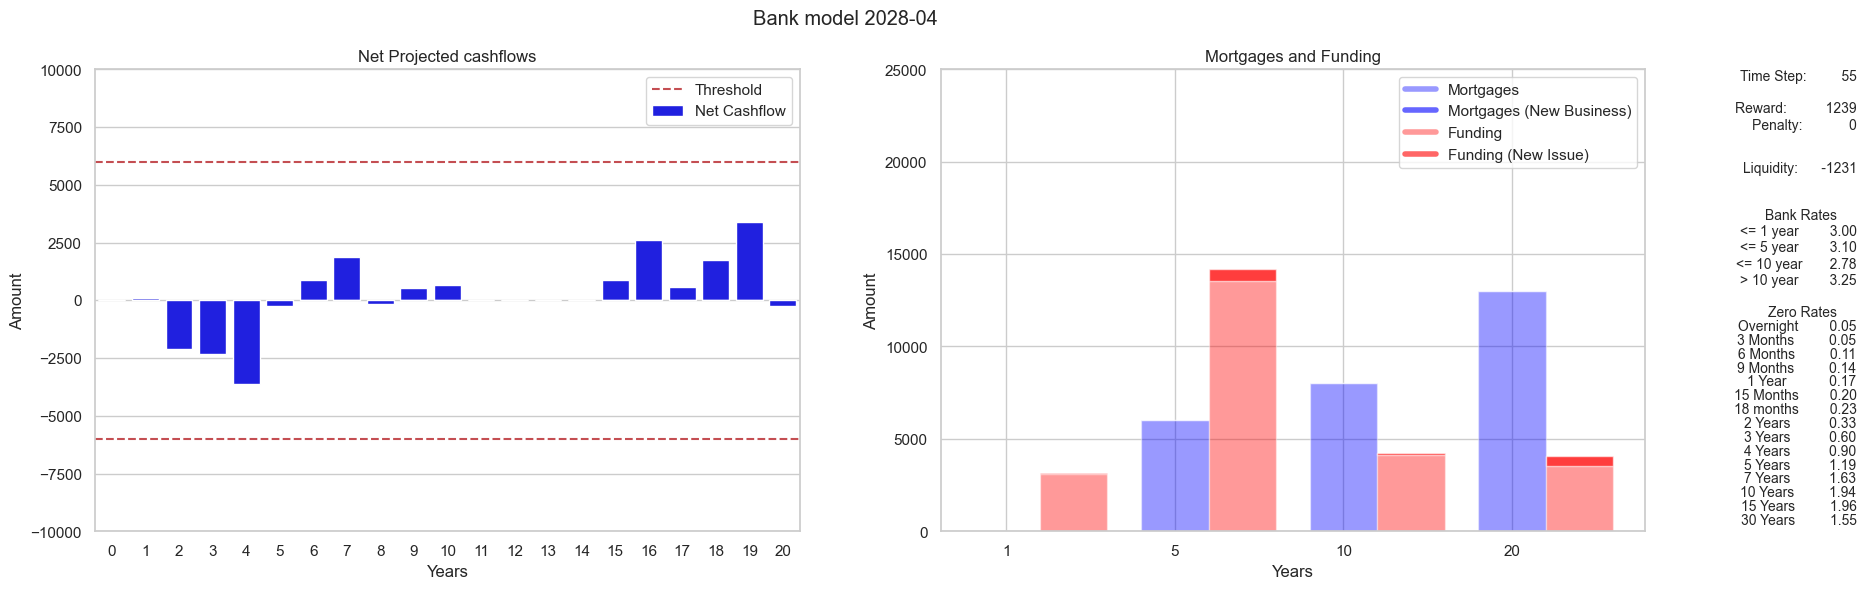

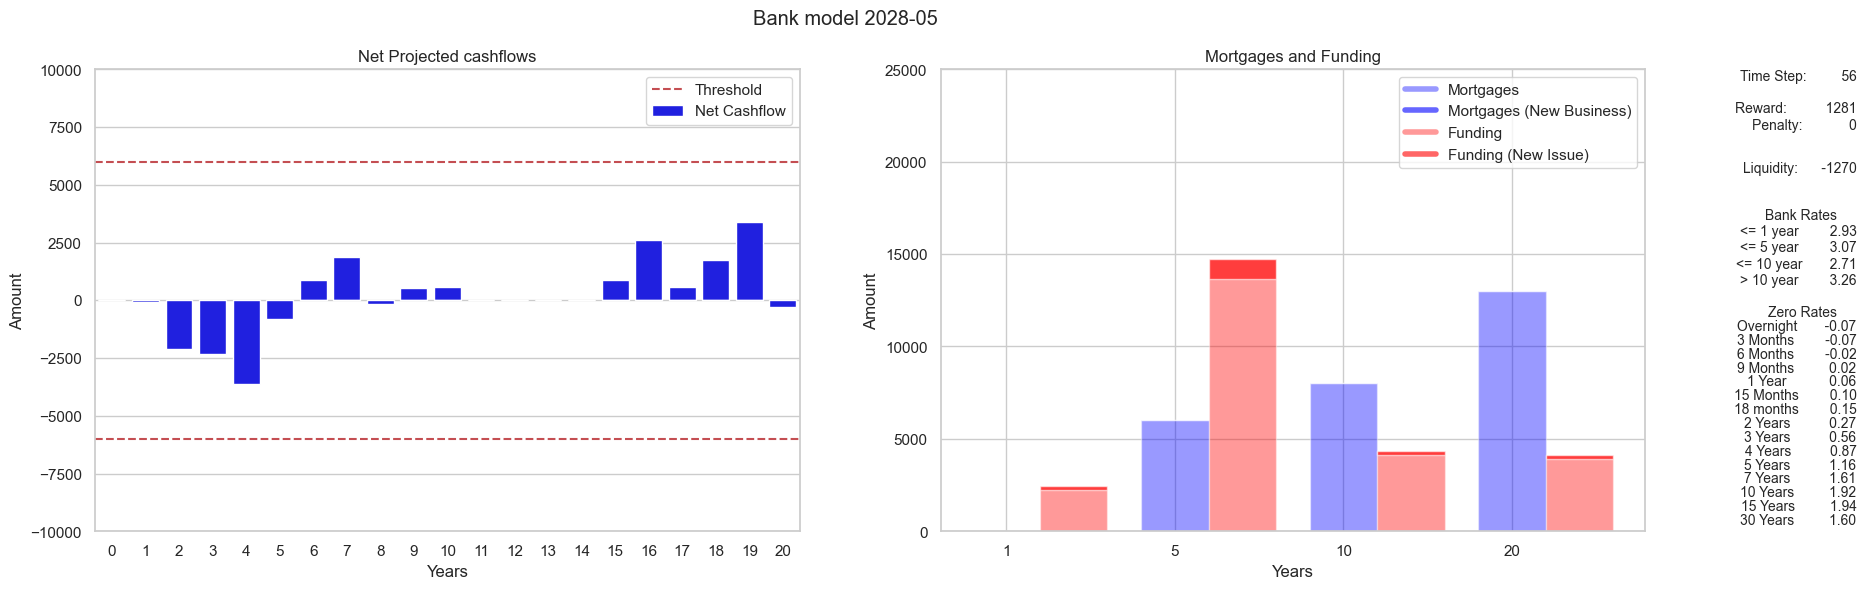

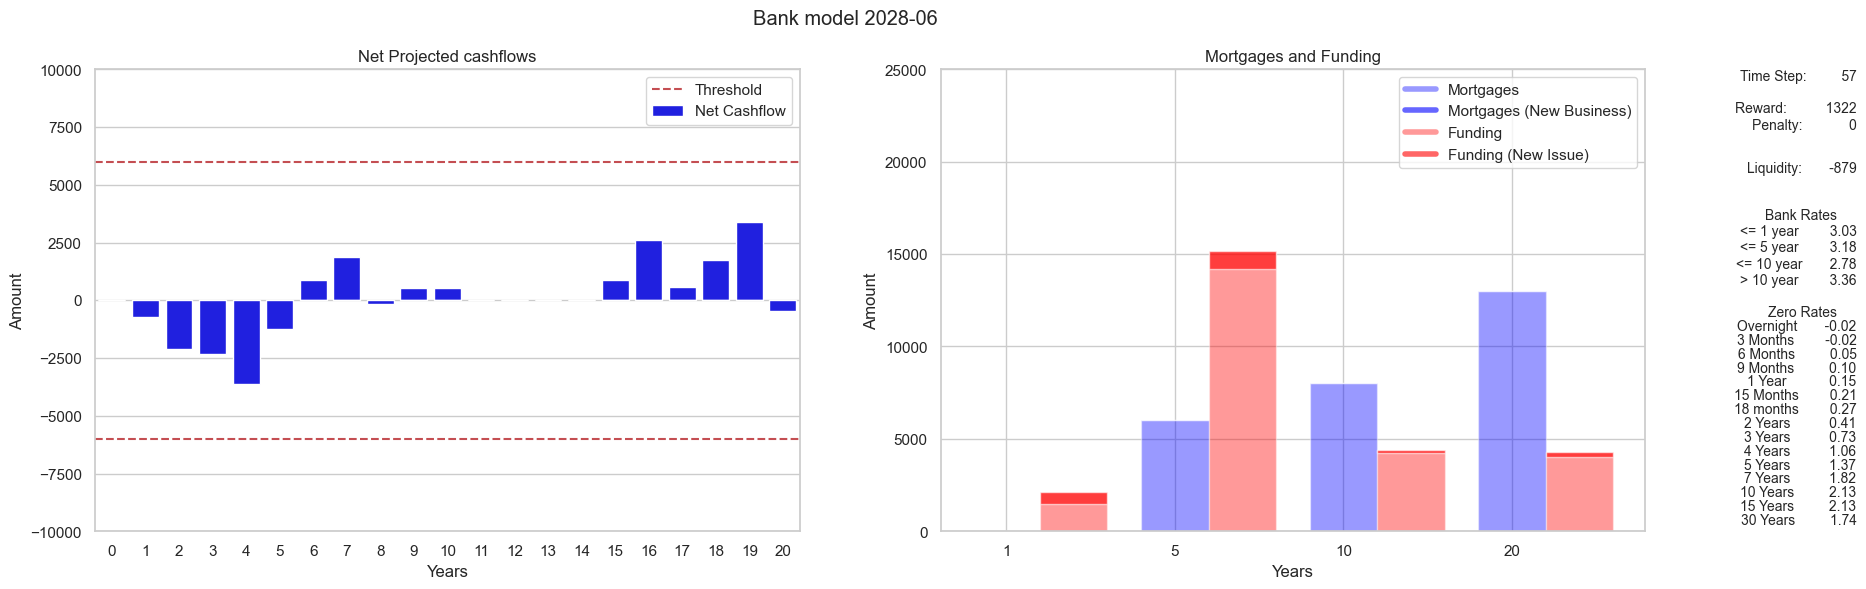

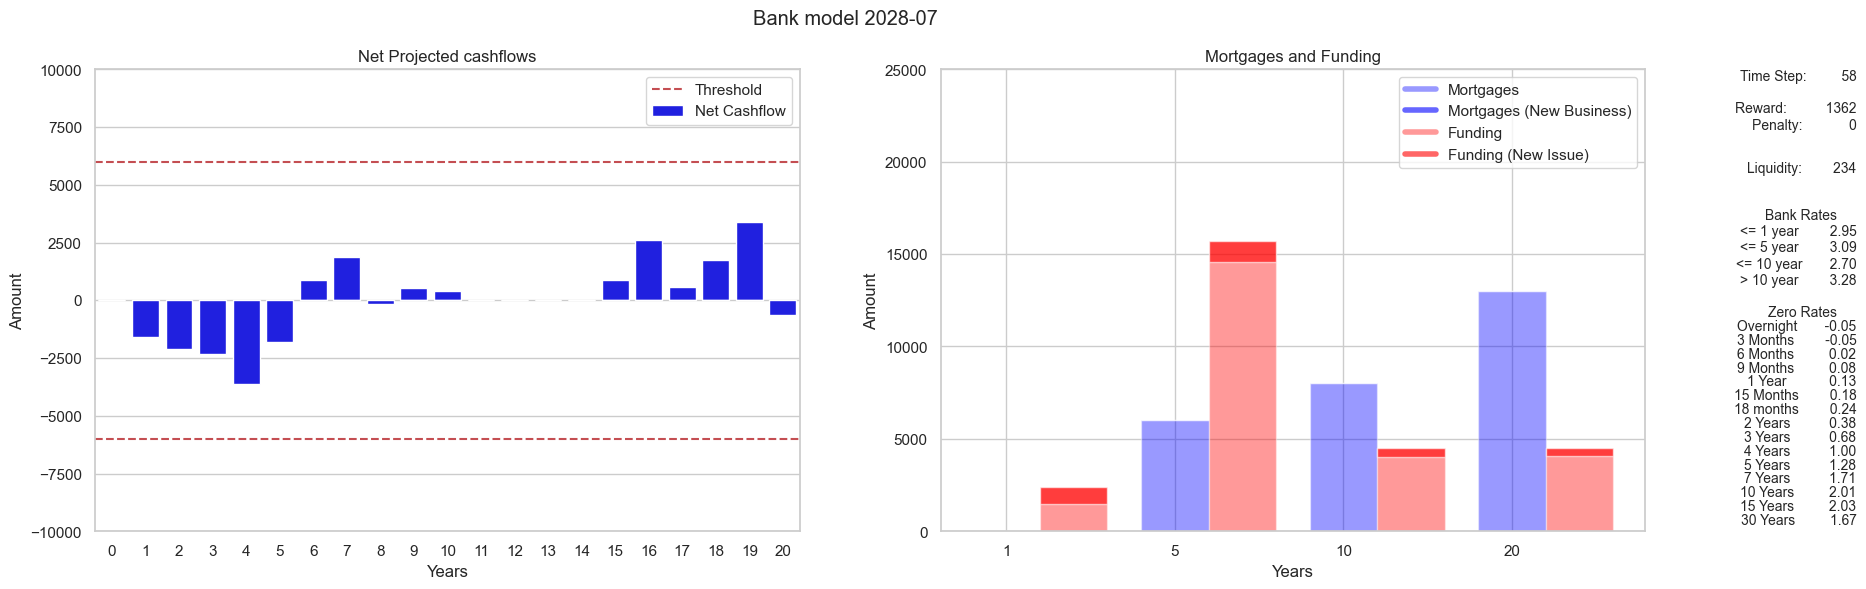

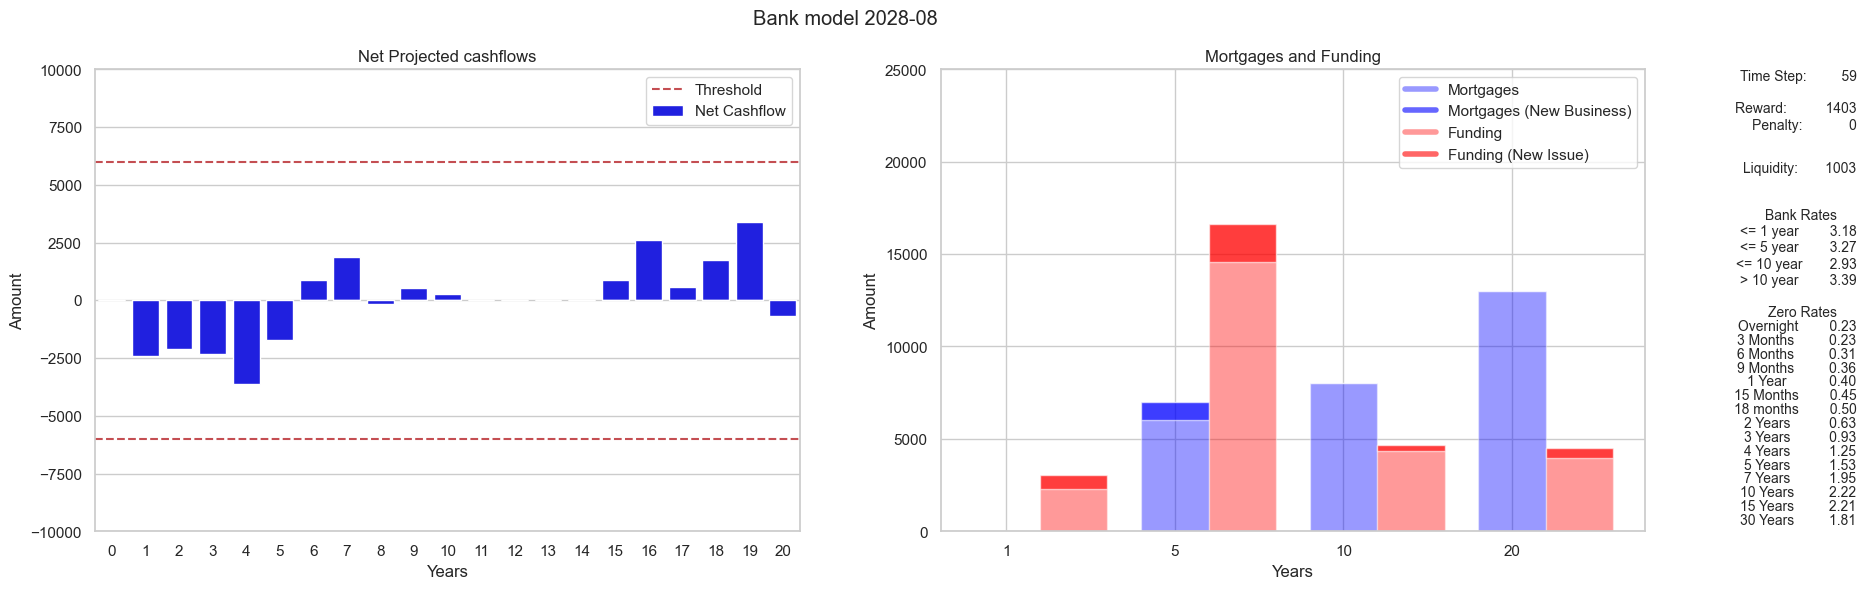

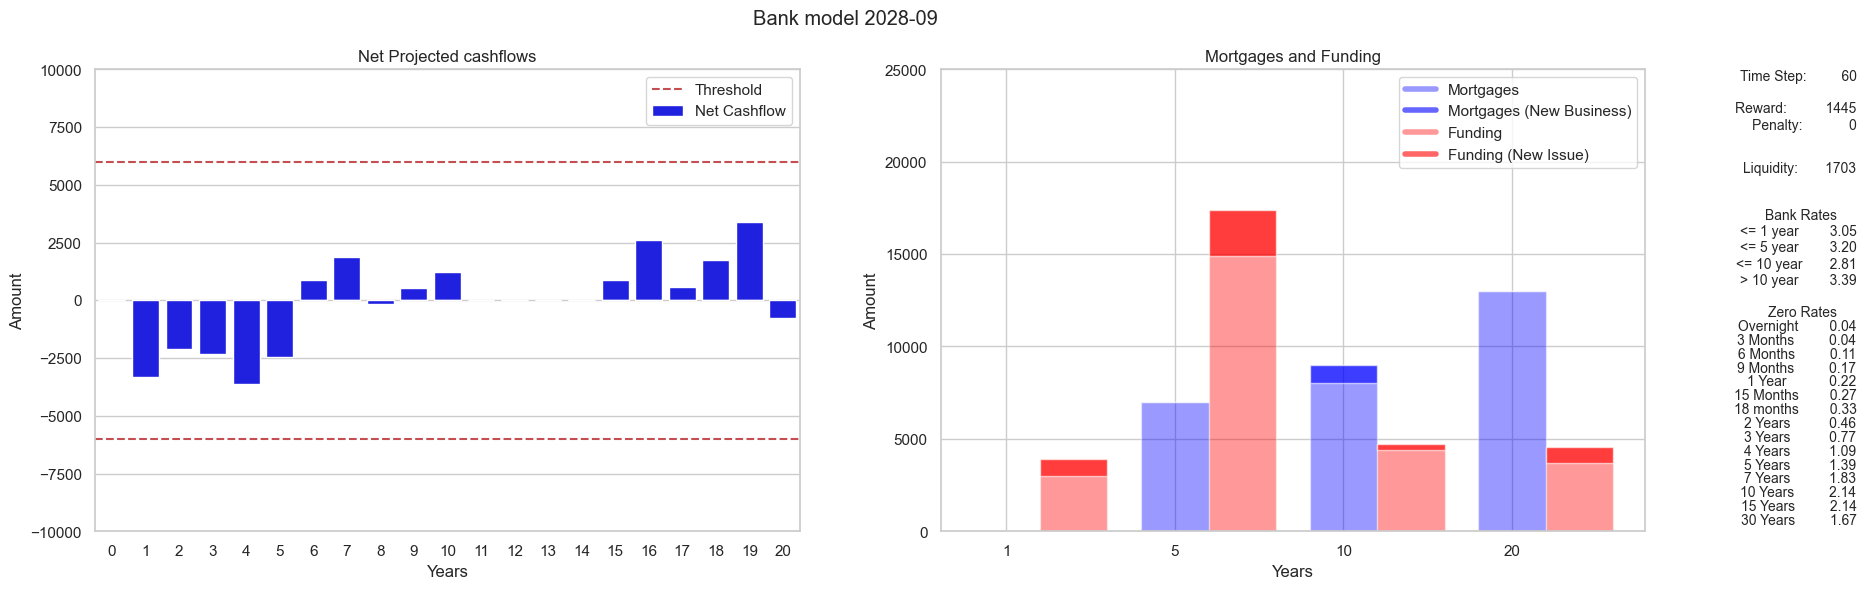

final score:  1445


timestep  reward  risk_penalty  liquidity_penalty    liquidity  nii  \
0          1      -2             0                  0  1231.976804   -2   
1          2      -1             0                  0  1278.145945   -1   
2          3      -1             0                  0  1420.501626   -1   
3          4       0             0                  0   540.073996    0   
4          5       0             0                  0  1076.944843    0   
5          6       2             0                  0   774.962547    2   
6          7       3             0                  0   828.317678    3   
7          8       4             0                  0   962.597578    4   
8          9       6             0                  0   619.671404    6   
9         10       8             0                  0   581.633045    8   
10        11      10             0                  0    11.177317   10   
11        12       9             0                  0   801.876684    9   
12        13      11             0                  0   115.573654   11   
13        14       9             0                  0   649.087420    9   
14        15       9             0                  0   849.357402    9   
15        16      11             0                  0   344.843095   11   
16        17      14             0                  0     2.110541   14   
17        18      13             0                  0   886.891677   13   
18        19      16             0                  0   452.313604   16   
19        20      16             0                  0   747.249861   16   
20        21      19             0                  0   114.910362   19   
21        22      20             0                  0   579.229826   20   
22        23      20             0                  0   835.974653   20   
23        24      19             0                  0  1565.510251   19   
24        25      21             0                  0  1104.905961   21   
25        26      23             0                  0   755.509057   23   
26        27      22             0                  0  1324.624745   22   
27        28      24             0                  0  1204.970414   24   
28        29      23             0                  0  2084.217992   23   
29        30      26             0                  0  1235.004924   26   
30        31      29             0                  0   917.524491   29   
31        32      29             0                  0  1106.591428   29   
32        33      32             0                  0    20.502114   32   
33        34      31             0                  0   184.124246   31   
34        35      30             0                  0   467.474484   30   
35        36      29             0                  0   859.650498   29   
36        37      31             0                  0     6.999784   31   
37        38      30             0                  0   977.215863   30   
38        39      32             0                  0   834.654456   32   
39        40      31             0                  0  1919.561519   31   
40        41      33             0                  0  1843.488368   33   
41        42      33             0                  0  2002.350307   33   
42        43      36             0                  0  1438.013041   36   
43        44      38             0                  0   583.952895   38   
44        45      38             0                  0   808.916341   38   
45        46      37             0                  0  1127.923558   37   
46        47      39             0                  0   546.429668   39   
47        48      38             0                  0  1285.096588   38   
48        49      40             0                  0   942.272278   40   
49        50      39             0                  0  1642.290276   39   
50        51      40             0                  0  1437.774624   40   
51        52      41             0                  0  1386.395916   41   
52        53      43         

In [38]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

def show_model(env, model) -> int:
    """Show the model in the environment"""
    # env.set_render_output(modelpath.stem)
    obs, info = env.reset()
    score = 0
    terminated = False
    truncated = False
    # env.set_render_output('A2C')

    while not terminated and not truncated:
        action, _state = model.predict(obs)
        obs, reward, terminated, truncated, info = env.step(action)
        score = score + reward
        # env.render()
        df = env.list_model()
        env.plot()
    env.close()
    return score, df

score, df = show_model(env, model)

warnings.filterwarnings("default")

print ('final score: ', score)
df.head(60)

In [ ]:
mean_reward, irq, es, rewards = evaluate_policy(model, env, n_eval_episodes=500)

In [ ]:
print(f"number of episodes = {len(rewards)}, mean_reward={mean_reward:.2f} Expected Shortfall={es:.2f} Interquartile Range={irq:.2f}")

number of episodes = 500, mean_reward=1428.09 Expected Shortfall=1025.00 Interquartile Range=210.50


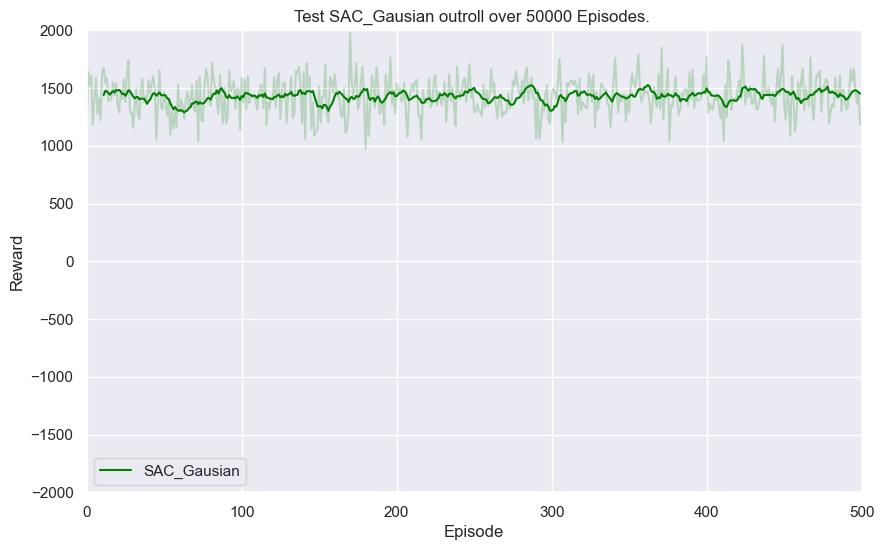

In [ ]:
visualize.plot_rewards(rewards, interpolate_line=False, rolling_line=True, ylim=(-2000,2000), color = 'Green',
                       label = model_name,
                       title = f"Test {model_name} outroll over {int(steps/60)} Episodes. ")